In [ ]:
# Run this cell.
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [ ]:
# Run this cell.
# When this cell run it will prompt to restart the session
# but dont restart the session immediately
# Let the cell run completely then restart the session.

import condacolab
import os

# --- FIX: Manually patch the path if Conda missed it ---
if "/usr/local/lib" not in os.environ.get("LD_LIBRARY_PATH", ""):
    print("🩹 Manually patching LD_LIBRARY_PATH...")
    os.environ["LD_LIBRARY_PATH"] = f"/usr/local/lib:{os.environ.get('LD_LIBRARY_PATH', '')}"

# Check environment again
condacolab.check()

# --- Unpin & Install Dependencies ---
print("🚀 Environment looks good! Starting installation...")
!rm -rf /usr/local/conda-meta/pinned

# 1. Install Python 3.7 & CUDA 10.0
!conda install python=3.7 cudatoolkit=10.0 cudnn=7.6 -c anaconda -y

# 2. Install TensorFlow 1.15 & DeepMind tools
import sys
!pip install tensorflow-gpu==1.15.0
!pip install dm-sonnet==1.36
!pip install tensorflow-probability==0.7.0
!pip install gast==0.2.2
!pip install protobuf==3.20.3

# 3. Final Check
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")
if tf.test.is_gpu_available():
    print("✅ SUCCESS: GPU is Online with TF 1.15!")
else:
    print("❌ ERROR: GPU not found.")

✨🍰✨ Everything looks OK!
🚀 Environment looks good! Starting installation...
Channels:
 - anaconda
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.0
    - cudnn=7.6
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py37h06a4308_0         421 KB  anaconda
    brotli-python-1.0.9        |   py37h6a678d5_7         353 KB  anaconda
    brotlipy-0.7.0             |py37h27cfd23_1003         350 KB  anaconda
    c-ares-1.34.5              |       hef5626c_0         206 KB  anaconda
    ca-certificates-2025.12.2  |       h06

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 665.3/665.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 92.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.4/981.4 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.8.0
    Uninstalling tensorflow-probability-0.8.0:
      Successfully uninstalled tensorflow-probability-0.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dm-sonnet 1.36 requires tensorflow-probability<0.9.0,>=0.8.0, but you have tensorflow-probability 0.7.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4


TensorFlow Version: 2.19.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
✅ SUCCESS: GPU is Online with TF 1.15!


In [ ]:
# Check if the internal Python 3.7 can load TensorFlow

# Untill this says success do not run cells below it.

!/usr/local/bin/python3.7 -c "import tensorflow as tf; print('✅ SUCCESS: TF Version is', tf.__version__)"

✅ SUCCESS: TF Version is 1.15.0


In [ ]:
# If the above cell says SUCCESS then run this cell.

import os
import shutil
# 3. Setup Repository
print("\n📂 Setting up DeepMind Repository...")
%cd /content
if os.path.exists("deepmind-research"):
    shutil.rmtree("deepmind-research")
!git clone https://github.com/deepmind/deepmind-research.git

# 4. Apply 'Size 8' Fix
print("\n🔧 Applying 'Size 8' fix to cloth_model.py...")
file_path = "/content/deepmind-research/meshgraphnets/cloth_model.py"
if os.path.exists(file_path):
    with open(file_path, "r") as f:
        content = f.read()
    new_content = content.replace("size=7, name='edge_normalizer')", "size=8, name='edge_normalizer')")
    with open(file_path, "w") as f:
        f.write(new_content)
    print("✅ Success: Patched size=7 to size=8.")
else:
    print("❌ Error: Repository not found.")


📂 Setting up DeepMind Repository...
/content
Cloning into 'deepmind-research'...
remote: Enumerating objects: 3078, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 3078 (delta 170), reused 39 (delta 39), pack-reused 2842 (from 3)
Receiving objects: 100% (3078/3078), 92.07 MiB | 26.57 MiB/s, done.
Resolving deltas: 100% (1598/1598), done.

🔧 Applying 'Size 8' fix to cloth_model.py...
✅ Success: Patched size=7 to size=8.


In [ ]:

#=============================================================================================================
#    Change the drive link if necessary. It should point to the folder that has tfrecord and meta.json.
#=============================================================================================================
#https://drive.google.com/drive/folders/1B8lbrowJgVwuqrvqmywVPZdIx9aCIY1b?usp=sharing
# Install the library (if not already installed)

!pip install -U -q gdown

# Download the folder
# The --folder flag tells gdown to download everything inside recursively
!gdown --folder "https://drive.google.com/drive/folders/1B8lbrowJgVwuqrvqmywVPZdIx9aCIY1b?usp=sharing"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 4.8 MB/s eta 0:00:00
Retrieving folder contents
Retrieving folder 1Wb918MSm8tu9DxEnI_3LOJcAHeiR35rZ .ipynb_checkpoints
Processing file 1DCSTzCb0iX2N4FAbS1pC67HeCXUsy0gv meta.json
Processing file 18TgB0KEpEkOHoDj21TrPeBj9yo3vx6Mx train_merged_25.tfrecord
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1DCSTzCb0iX2N4FAbS1pC67HeCXUsy0gv
To: /content/meshgraphnets_data_25_merged/meta.json
100% 743/743 [00:00<00:00, 2.93MB/s]
Downloading...
From: https://drive.google.com/uc?id=18TgB0KEpEkOHoDj21TrPeBj9yo3vx6Mx
To: /content/meshgraphnets_data_25_merged/train_merged_25.tfrecord
100% 84.0M/84.0M [00:00<00:00, 92.9MB/s]
Download completed


In [ ]:
#===============================================================================
# Jan 9
#===============================================================================

In [ ]:
!mv /content/pressnet_model.py /content/deepmind-research/meshgraphnets

In [ ]:
'''
Here is the final, complete script for pressnet_model.py.

It includes:

Masked Loss Function: It forces the AI to learn only from the metal sheet deformation (Node Type 0) and ignore the rigid tools, which improves convergence significantly.

Quasi-Static Physics: Uses simple displacement updates (no velocity/inertia).

Manual Graph Building: Contains the full _build_graph logic so you don't need to fix common.py.

Correct Features: Uses only Node Type (for nodes) and World Distance (for edges), matching the PressNet paper's plastic deformation logic.

📝 Final Script: pressnet_model.py
Run this block to overwrite your file with the definitive version.
'''





import os

target_dir = '/content/deepmind-research/meshgraphnets'
file_path = os.path.join(target_dir, 'pressnet_model.py')

file_content = """# Lint as: python3
\"\"\"Model for PressNet (Quasi-Static Formulation).\"\"\"

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt
import common
import core_model
import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  \"\"\"Model that predicts next position based on current state (Quasi-static).\"\"\"

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model

    # --- NORMALIZERS ---
    # 1. Output Normalizer: Scales the displacement predictions (mm -> standard units)
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')

    # 2. Edge Normalizer: Scales the geometric distances between nodes
    self._edge_normalizer = normalization.Normalizer(size=4, name='edge_normalizer')

    # Note: We do NOT use a Node Normalizer because inputs are just One-Hot types (0 or 1).

  def _build_graph(self, inputs, is_training):
    \"\"\"Manually builds the graph (EdgeSets). Matches PressNet plastic/contact logic.\"\"\"

    # 1. Get Coordinates and Indices
    world_pos = inputs['world_pos']
    senders = inputs['senders']
    receivers = inputs['receivers']

    # 2. Compute Relative Positions (World Space Only)
    # We do not use Mesh Space (Rest State) because metal deformation is plastic (permanent).
    sender_pos = tf.gather(world_pos, senders)
    receiver_pos = tf.gather(world_pos, receivers)

    relative_pos = sender_pos - receiver_pos
    edge_length = tf.norm(relative_pos, axis=-1, keepdims=True)

    # 3. Create Edge Features
    # Feature Vector: [dx, dy, dz, length]
    edge_features = tf.concat([relative_pos, edge_length], axis=-1)

    # 4. Normalize Edge Features
    edge_features = self._edge_normalizer(edge_features, is_training)

    # 5. Pack into EdgeSet
    edge_set = EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers)

    return [edge_set]

  def _update(self, inputs, predicted_displacement):
    \"\"\"Simple Quasi-Static Update: Next = Current + Displacement\"\"\"
    # PressNet assumes equilibrium at every step, so we just add the displacement.
    return inputs['world_pos'] + predicted_displacement

  def _build(self, inputs, is_training=False):
    \"\"\"Forward pass (Orchestrator). Used during Rollout/Evaluation.\"\"\"

    # 1. Node Features (Material Type Only)
    # Convert node type integer to One-Hot vector (Size 9)
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    # 2. Build Graph (Edges)
    edge_sets = self._build_graph(inputs, is_training)

    # 3. Run Neural Network (GNN)
    # Returns normalized prediction
    predicted_normalized = self._learned_model(
        node_features,
        edge_sets)

    # 4. Inverse Normalize
    # Convert back to physical units (Displacement in mm/m)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 5. Update Position
    # Returns the absolute final position for the next step
    return self._update(inputs, predicted_displacement)

  def loss(self, inputs):
    \"\"\"Calculates L2 loss on displacement with MASKING.\"\"\"

    # --- 1. Forward Pass Logic (Duplicated for Training) ---
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    edge_sets = self._build_graph(inputs, is_training=True)

    predicted_normalized = self._learned_model(
        node_features,
        edge_sets)

    # --- 2. Calculate Ground Truth ---
    current_pos = inputs['world_pos']
    target_pos = inputs['target|world_pos']
    target_displacement = target_pos - current_pos

    # --- 3. Update Statistics ---
    self._output_normalizer(target_displacement, is_training=True)

    # --- 4. Compute Loss with Masking ---
    target_normalized = self._output_normalizer(target_displacement)

    # Calculate Squared Error per node
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # MASKING: We only want to train on the METAL SHEET (Type 0 / NORMAL).
    # We ignore obstacles (Type 1) because their movement is rigid/known.
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    # Apply Mask: Select only errors where mask is True
    masked_error = tf.boolean_mask(error, loss_mask)

    # Take the Mean of the masked errors
    loss = tf.reduce_mean(masked_error)
    return loss
"""

with open(file_path, 'w') as f:
    f.write(file_content)

print(f"✅ FINAL COMPLETE SCRIPT WRITTEN: {file_path}")
print("   - Includes Loss Masking (Focuses learning on the metal).")
print("   - Includes Quasi-Static Update (Displacement only).")
print("   - Includes Manual Graph Building.")

✅ FINAL COMPLETE SCRIPT WRITTEN: /content/deepmind-research/meshgraphnets/pressnet_model.py
   - Includes Loss Masking (Focuses learning on the metal).
   - Includes Quasi-Static Update (Displacement only).
   - Includes Manual Graph Building.


In [ ]:
content = r'''
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model

    # --- NORMALIZERS ---
    # 1. Output Normalizer: Scales the displacement predictions (mm -> standard units)
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')

    # 2. Edge Normalizer: Scales the geometric distances between nodes
    self._edge_normalizer = normalization.Normalizer(size=4, name='edge_normalizer')

    # Note: We do NOT use a Node Normalizer because inputs are just One-Hot types (0 or 1).

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets). Matches PressNet plastic/contact logic."""

    # --- helper to find fields, supports nested dicts used by dataset ---
    def _find_in_inputs(name_candidates):
      for n in name_candidates:
        if n in inputs:
          return inputs[n]
      for v in inputs.values():
        if isinstance(v, dict):
          for n in name_candidates:
            if n in v:
              return v[n]
      return None

    # 1) get world positions (support 'world_pos' or fallback 'curr_pos')
    world_pos = _find_in_inputs(['world_pos', 'curr_pos'])
    if world_pos is None:
      raise KeyError("Could not find 'world_pos' or 'curr_pos' in inputs. Keys: {}".format(list(inputs.keys())))

    # 2) resolve edges: prefer explicit senders/receivers, else build from cells
    senders = _find_in_inputs(['senders'])
    receivers = _find_in_inputs(['receivers'])
    if senders is None or receivers is None:
      cells = _find_in_inputs(['cells'])
      if cells is None:
        raise KeyError("Could not find 'senders'/'receivers' or 'cells' in inputs. Keys: {}".format(list(inputs.keys())))

      # If cells is RaggedTensor, flatten to values first; otherwise use directly.
      if isinstance(cells, tf.RaggedTensor):
        cells_flat = cells.values
      else:
        cells_flat = cells

      # Use the repo helper (same approach as cloth_model) to build edges from triangles.
      senders, receivers = common.triangles_to_edges(cells_flat)

    # Ensure integer dtype for gather
    senders = tf.cast(senders, tf.int32)
    receivers = tf.cast(receivers, tf.int32)

    # 3) compute relative positions (world space)
    sender_pos = tf.gather(world_pos, senders)
    receiver_pos = tf.gather(world_pos, receivers)
    relative_pos = sender_pos - receiver_pos
    edge_length = tf.norm(relative_pos, axis=-1, keepdims=True)

    # 4) create edge features: [dx, dy, dz, length]
    edge_features = tf.concat([relative_pos, edge_length], axis=-1)
    edge_features = self._edge_normalizer(edge_features, is_training)

    # 5) pack into EdgeSet and return
    edge_set = core_model.EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers)
    return [edge_set]

  def _update(self, inputs, predicted_displacement):
    """Simple Quasi-Static Update: Next = Current + Displacement"""
    # PressNet assumes equilibrium at every step, so we just add the displacement.
    return inputs['world_pos'] + predicted_displacement

  def _build(self, inputs, is_training=False):
    """Forward pass (Orchestrator). Used during Rollout/Evaluation."""

    # 1. Node Features (Material Type Only)
    # Convert node type integer to One-Hot vector (Size 9)
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    # 2. Build Graph (Edges)
    edge_sets = self._build_graph(inputs, is_training)

    # Build the repo-style graph container and call the learned model.
    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)

    # 3. Run Neural Network (GNN)
    # Returns normalized prediction
    predicted_normalized = self._learned_model(graph)

    # 4. Inverse Normalize
    # Convert back to physical units (Displacement in mm/m)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 5. Update Position
    # Returns the absolute final position for the next step
    return self._update(inputs, predicted_displacement)

  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""

    # --- 1. Forward Pass Logic (Duplicated for Training) ---
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets) #Added later.

    predicted_normalized = self._learned_model(graph)

    # --- 2. Calculate Ground Truth ---
    current_pos = inputs['world_pos']
    target_pos = inputs['target|world_pos']
    target_displacement = target_pos - current_pos

    # --- 3. Update Statistics ---
    self._output_normalizer(target_displacement, accumulate=True)


    # --- 4. Compute Loss with Masking ---
    # use current stats to normalize, but DON'T accumulate again
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)


    # Calculate Squared Error per node
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # MASKING: We only want to train on the METAL SHEET (Type 0 / NORMAL).
    # We ignore obstacles (Type 1) because their movement is rigid/known.
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    # Apply Mask: Select only errors where mask is True
    masked_error = tf.boolean_mask(error, loss_mask)

    # Take the Mean of the masked errors
    loss = tf.reduce_mean(masked_error)
    return loss
'''
path = '/content/deepmind-research/meshgraphnets/pressnet_model.py'
with open(path, 'w') as f:
    f.write(content)
print("Wrote", path)


Wrote /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
#===============================================================================
#    Pressnet Dataset.py
#===============================================================================

In [ ]:
'''
Here is the updated pressnet_dataset.py.
I have modified the add_targets function to:Set add_history=False:
It no longer creates the prev|world_pos feature, as PressNet (Quasi-Static) doesn't need it.
Optimize Slicing: Since we don't need the 3-frame window for acceleration (Previous, Current, Next),
I changed the slicing to use 2 frames (Current, Next).
This allows you to use the very first step of your simulation ($t_0 \to t_1$),
which the previous code threw away.📝 Final Script: pressnet_dataset.pyRun
this block to create the file:

'''





import os

target_dir = '/content/deepmind-research/meshgraphnets'
file_path = os.path.join(target_dir, 'pressnet_dataset.py')

file_content = """# Lint as: python3
\"\"\"Utility functions for reading the datasets (PressNet Version).\"\"\"

import functools
import json
import os
import tensorflow.compat.v1 as tf
from meshgraphnets.common import NodeType

def _parse(proto, meta):
  \"\"\"Parses a trajectory from tf.Example.\"\"\"
  feature_lists = {k: tf.io.VarLenFeature(tf.string)
                   for k in meta['field_names']}
  features = tf.io.parse_single_example(proto, feature_lists)
  out = {}
  for key, field in meta['features'].items():
    data = tf.io.decode_raw(features[key].values, getattr(tf, field['dtype']))
    data = tf.reshape(data, field['shape'])
    if field['type'] == 'static':
      data = tf.tile(data, [meta['trajectory_length'], 1, 1])
    elif field['type'] == 'dynamic_varlen':
      length = tf.io.decode_raw(features['length_'+key].values, tf.int32)
      length = tf.reshape(length, [-1])
      data = tf.RaggedTensor.from_row_lengths(data, row_lengths=length)
    elif field['type'] != 'dynamic':
      raise ValueError('invalid data format')
    out[key] = data
  return out

def load_dataset(path, split):
  \"\"\"Load dataset.\"\"\"
  with open(os.path.join(path, 'meta.json'), 'r') as fp:
    meta = json.loads(fp.read())
  ds = tf.data.TFRecordDataset(os.path.join(path, split+'.tfrecord'))
  ds = ds.map(functools.partial(_parse, meta=meta), num_parallel_calls=8)
  ds = ds.prefetch(1)
  return ds

def add_targets(ds, fields, add_history=False):
  \"\"\"Adds target fields to dataframe. History is DISABLED for PressNet.\"\"\"
  def fn(trajectory):
    out = {}
    for key, val in trajectory.items():
      # --- PRESSNET LOGIC ---
      # We take [:-1] as current and [1:] as target.
      # This captures the very first step (0->1) which Cloth model skipped.
      out[key] = val[:-1]

      if key in fields:
        out['target|'+key] = val[1:]
        # 'prev|' logic is completely removed.

    return out
  return ds.map(fn, num_parallel_calls=8)

def split_and_preprocess(ds, noise_field, noise_scale, noise_gamma):
  \"\"\"Splits trajectories into frames, and adds training noise.\"\"\"
  def add_noise(frame):
    noise = tf.random.normal(tf.shape(frame[noise_field]),
                             stddev=noise_scale, dtype=tf.float32)
    # Don't apply noise to boundary nodes
    mask = tf.equal(frame['node_type'], NodeType.NORMAL)[:, 0]
    noise = tf.where(mask, noise, tf.zeros_like(noise))

    frame[noise_field] += noise
    frame['target|'+noise_field] += (1.0 - noise_gamma) * noise
    return frame

  ds = ds.flat_map(tf.data.Dataset.from_tensor_slices)
  ds = ds.map(add_noise, num_parallel_calls=8)
  ds = ds.shuffle(10000)
  ds = ds.repeat(None)
  return ds.prefetch(10)

def batch_dataset(ds, batch_size):
  \"\"\"Batches input datasets.\"\"\"
  shapes = ds.output_shapes
  types = ds.output_types

  def renumber(buffer, frame):
    nodes, cells = buffer
    new_nodes, new_cells = frame
    return nodes + new_nodes, tf.concat([cells, new_cells+nodes], axis=0)

  def batch_accumulate(ds_window):
    out = {}
    for key, ds_val in ds_window.items():
      initial = tf.zeros((0, shapes[key][1]), dtype=types[key])
      if key == 'cells':
        num_nodes = ds_window['node_type'].map(lambda x: tf.shape(x)[0])
        cells = tf.data.Dataset.zip((num_nodes, ds_val))
        initial = (tf.constant(0, tf.int32), initial)
        _, out[key] = cells.reduce(initial, renumber)
      else:
        merge = lambda prev, cur: tf.concat([prev, cur], axis=0)
        out[key] = ds_val.reduce(initial, merge)
    return out

  if batch_size > 1:
    ds = ds.window(batch_size, drop_remainder=True)
    ds = ds.map(batch_accumulate, num_parallel_calls=8)
  return ds
"""

with open(file_path, 'w') as f:
    f.write(file_content)

print(f"✅ Updated: {file_path}")
print("   - add_history logic removed.")
print("   - Slicing optimized for Quasi-Static (uses all frames).")

✅ Updated: /content/deepmind-research/meshgraphnets/pressnet_dataset.py
   - add_history logic removed.
   - Slicing optimized for Quasi-Static (uses all frames).


In [ ]:
#===============================================================================
#   pressnet_run_model.py
#===============================================================================

In [ ]:
import os

# Define the target directory and new filename
target_dir = '/content/deepmind-research/meshgraphnets'
file_path = os.path.join(target_dir, 'pressnet_run_model.py')

# The content exactly as you provided, preserving all PressNet logic
file_content = """# Lint as: python3
\"\"\"Runs the learner/evaluator for PressNet.\"\"\"

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf
from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model
# --- CHANGE 1: Import PressNet modules ---
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_dataset as dataset # <--- forcing use of pressnet_dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
# --- CHANGE 2: Add 'pressnet' to valid models ---
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')

# --- CHANGE 3: Define Parameters for PressNet ---
PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,  #changed from cfd_model.CfdModel to cfd_model.Model
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,  #changed from cloth_model.ClothModel to cloth_model.Model
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,         # Standard noise to prevent drift
        'gamma': 0.1,           # Correction factor
        'field': 'world_pos',   # We add noise to positions
        'history': False,       # <--- CRITICAL: No history for Quasi-Static
        'size': 3,              # Predict 3D Displacement (dx, dy, dz)
        'core_model': pressnet_model.PressNetModel,
        'evaluator': cloth_eval # We reuse cloth_eval for rollouts as the data structure is similar
    }
}

def learner(model, params):
  \"\"\"Runs training loop.\"\"\"
  # Load dataset using pressnet_dataset logic
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')

  # Add noise and batching
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])
  inputs = tf.data.make_one_shot_iterator(dataset.batch_dataset(ds, 2)).get_next()

  # Initialize Model
  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  # Learning Rate Schedule (Standard DeepMind setup)
  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # Run Training
  hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]  # Added later
  with tf.train.MonitoredTrainingSession(
      checkpoint_dir=FLAGS.checkpoint_dir,
      hooks=hooks,                                    # Added later
      save_checkpoint_secs=180,
      save_summaries_steps=100) as sess:

    logging.info('🚀 Training Started...')
    losses = []  # <<< ADD THIS
    while not sess.should_stop():
      _, step, loss = sess.run([train_op, global_step, loss_op])
      losses.append(loss)  # <<< ADD THIS

      if step % 100 == 0:
        logging.info('Step %d: Loss = %.6f', step, loss)

  if step % 500 == 0 and step > 0:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 4))
    plt.plot(losses)
    plt.yscale('log')
    plt.title('PressNet Training Loss')
    plt.show()



def evaluator(model, params):
  \"\"\"Runs evaluation rollouts.\"\"\"
  # Reuse cloth_eval logic but with our model
  # Note: This expects standard mesh inputs.
  # NOTE: 'inputs' is not defined in this scope in the original snippet,
  # assuming evaluator handles loading internally or global inputs are expected.
  params['evaluator'].evaluate(model, params)

def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  # Build the core GNN model (Encoder -> Processor -> Decoder)
  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  # Wrap it in our Physics Model (PressNetModel)
  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)

if __name__ == '__main__':
  app.run(main)
"""

# Write the file
with open(file_path, 'w') as f:
    f.write(file_content)

print(f"✅ Created: {file_path}")
print("   - You can now run this specific script using the command below.")

✅ Created: /content/deepmind-research/meshgraphnets/pressnet_run_model.py
   - You can now run this specific script using the command below.


In [ ]:
# Jan 10 iteration.
import os

# Define the target directory and new filename
target_dir = '/content/deepmind-research/meshgraphnets'
file_path = os.path.join(target_dir, 'pressnet_run_model.py')

# The content exactly as you provided, preserving all PressNet logic
file_content = """# Lint as: python3
\"\"\"Runs the learner/evaluator for PressNet.\"\"\"

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf
from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model
# --- CHANGE 1: Import PressNet modules ---
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_dataset as dataset # <--- forcing use of pressnet_dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
# --- CHANGE 2: Add 'pressnet' to valid models ---
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')

# --- CHANGE 3: Define Parameters for PressNet ---
PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,  #changed from cfd_model.CfdModel to cfd_model.Model
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,  #changed from cloth_model.ClothModel to cloth_model.Model
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,         # Standard noise to prevent drift
        'gamma': 0.1,           # Correction factor
        'field': 'world_pos',   # We add noise to positions
        'history': False,       # <--- CRITICAL: No history for Quasi-Static
        'size': 3,              # Predict 3D Displacement (dx, dy, dz)
        'core_model': pressnet_model.PressNetModel,
        'evaluator': cloth_eval # We reuse cloth_eval for rollouts as the data structure is similar
    }
}

def learner(model, params):
  \"\"\"Runs training loop.\"\"\"
  # Load dataset using pressnet_dataset logic
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')

  # Add noise and batching
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])
  inputs = tf.data.make_one_shot_iterator(dataset.batch_dataset(ds, 2)).get_next()

  # Initialize Model
  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  # Learning Rate Schedule (Standard DeepMind setup)
  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # Run Training
hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]
with tf.train.MonitoredTrainingSession(
  checkpoint_dir=FLAGS.checkpoint_dir,
  hooks=hooks,
  save_checkpoint_secs=180,
  save_summaries_steps=100) as sess:

  logging.info('🚀 Training Started...')

  # Local imports used only for debug/plotting (kept inside the session scope)
  import numpy as np
  import json
  from pathlib import Path
  from IPython.display import clear_output

  # --- DEBUG: warm-up step so the normalizer has at least one accumulation (optional) ---
  try:
    _, step0, loss0 = sess.run([train_op, global_step, loss_op])
    logging.info("DEBUG: init step %d loss %f", int(step0), float(loss0))
  except Exception as e:
    logging.warning("DEBUG: could not run warm-up train step: %s", e)

  # --- DEBUG: read normalizer internal tensors ---
  mean_t = model._output_normalizer._mean()
  std_t = model._output_normalizer._std_with_epsilon()
  mean_val, std_val = sess.run([mean_t, std_t])
  logging.info("DEBUG: output_normalizer mean: %s", np.array2string(mean_val, precision=6))
  logging.info("DEBUG: output_normalizer std : %s", np.array2string(std_val, precision=6))

  # --- DEBUG: fetch one raw batch from dataset and compute displacement stats ---
  try:
    sample = sess.run(inputs)   # consumes one batch from iterator
    target = sample['target|world_pos']
    current = sample['world_pos']
    disp = target - current

    logging.info("DEBUG: sample world_pos shape: %s", str(current.shape))
    logging.info("DEBUG: sample target|world_pos shape: %s", str(target.shape))
    logging.info("DEBUG: sample target_disp mean: %s", np.array2string(np.mean(disp, axis=0), precision=6))
    logging.info("DEBUG: sample target_disp std : %s", np.array2string(np.std(disp, axis=0), precision=6))
    logging.info("DEBUG: world_pos mean/std: mean=%s std=%s",
                 np.array2string(np.mean(current, axis=0), precision=6),
                 np.array2string(np.std(current, axis=0), precision=6))

    # Save debug numbers to disk for later inspection
    debug_out = {
      'normalizer_mean': mean_val.tolist(),
      'normalizer_std' : std_val.tolist(),
      'sample_shapes': {'world_pos': current.shape, 'target': target.shape},
      'sample_disp_mean': np.mean(disp, axis=0).tolist(),
      'sample_disp_std' : np.std(disp, axis=0).tolist()
    }
    out_path = Path(FLAGS.checkpoint_dir or '/content/checkpoints_pressnet') / 'debug_normalizer_stats.json'
    out_path.parent.mkdir(parents=True, exist_ok=True)
    with open(out_path, 'w') as f:
      json.dump(debug_out, f, indent=2)
    logging.info("DEBUG: saved stats to %s", str(out_path))

  except Exception as e:
    logging.warning("DEBUG: failed to sample dataset for inspection: %s", e)

  # --- Training loop (collect losses for plotting) ---
  losses = []
  try:
    while not sess.should_stop():
      _, step, loss = sess.run([train_op, global_step, loss_op])
      losses.append(float(loss))

      if step % 100 == 0:
        logging.info('Step %d: Loss = %.6f', step, loss)

      # Live update plot in Colab every 500 steps (non-blocking)
      if step % 500 == 0 and step > 0:
        try:
          import matplotlib.pyplot as plt
          clear_output(wait=True)
          plt.figure(figsize=(6, 4))
          plt.plot(losses)
          plt.yscale('log')
          plt.xlabel('Training iteration')
          plt.ylabel('Loss (log scale)')
          plt.title(f'PressNet training loss (step {step})')
          plt.grid(True)
          plt.show()
        except Exception as e:
          logging.warning("Live plotting failed: %s", e)

  except Exception:
    logging.exception("Training loop ended with exception.")
    raise

# After session ends (clean exit or StopAtStepHook reached) — final plot
if len(losses) > 0:
  try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    plt.plot(losses)
    plt.yscale('log')
    plt.xlabel('Training iteration')
    plt.ylabel('Loss (log scale)')
    plt.title('PressNet Training Loss (final)')
    plt.grid(True)
    plt.show()
  except Exception as e:
    logging.warning("Final plotting failed: %s", e)
else:
  logging.info("No loss values collected (losses list is empty).")



def evaluator(model, params):
  \"\"\"Runs evaluation rollouts.\"\"\"
  # Reuse cloth_eval logic but with our model
  # Note: This expects standard mesh inputs.
  # NOTE: 'inputs' is not defined in this scope in the original snippet,
  # assuming evaluator handles loading internally or global inputs are expected.
  params['evaluator'].evaluate(model, params)

def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  # Build the core GNN model (Encoder -> Processor -> Decoder)
  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  # Wrap it in our Physics Model (PressNetModel)
  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)

if __name__ == '__main__':
  app.run(main)
"""

# Write the file
with open(file_path, 'w') as f:
    f.write(file_content)

print(f"✅ Created: {file_path}")
print("   - You can now run this specific script using the command below.")

✅ Created: /content/deepmind-research/meshgraphnets/pressnet_run_model.py
   - You can now run this specific script using the command below.


In [ ]:
%cd /content/deepmind-research/

/content/deepmind-research


In [ ]:
# Lint as: python3
"""Runs the learner/evaluator for PressNet."""

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf

from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model

# --- CHANGE 1: Import PressNet modules ---
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_dataset as dataset  # <--- forcing use of pressnet_dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
# --- CHANGE 2: Add 'pressnet' to valid models ---
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')


# --- CHANGE 3: Define Parameters for PressNet ---
PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,  # repo uses Model class
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,  # repo uses Model class
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,         # Standard noise to prevent drift
        'gamma': 0.1,           # Correction factor
        'field': 'world_pos',   # We add noise to positions
        'history': False,       # <--- CRITICAL: No history for Quasi-Static
        'size': 3,              # Predict 3D Displacement (dx, dy, dz)
        'core_model': pressnet_model.PressNetModel,
        'evaluator': cloth_eval  # reuse cloth_eval (dataset / evaluator fits)
    }
}


def learner(model, params):
  """Runs training loop."""
  # Load dataset using pressnet_dataset logic
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')

  # Add noise and batching
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])
  inputs = tf.data.make_one_shot_iterator(dataset.batch_dataset(ds, 2)).get_next()

  # Initialize Model
  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  # Learning Rate Schedule (Standard DeepMind setup)
  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # Run Training
  hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]
  with tf.train.MonitoredTrainingSession(
      checkpoint_dir=FLAGS.checkpoint_dir,
      hooks=hooks,
      save_checkpoint_secs=180,
      save_summaries_steps=100) as sess:

    logging.info('🚀 Training Started...')

    # Local imports used only for debug/plotting (keeps top-level tidy)
    import json
    from pathlib import Path
    from IPython.display import clear_output
    import matplotlib.pyplot as plt

    # --- DEBUG: warm-up step so the normalizer has at least one accumulation (optional) ---
    try:
      _, step0, loss0 = sess.run([train_op, global_step, loss_op])
      logging.info("DEBUG: init step %d loss %f", int(step0), float(loss0))
    except Exception as e:
      logging.warning("DEBUG: could not run warm-up train step: %s", e)

    # --- DEBUG: read normalizer internal tensors ---
    try:
      mean_t = model._output_normalizer._mean()
      std_t = model._output_normalizer._std_with_epsilon()
      mean_val, std_val = sess.run([mean_t, std_t])
      logging.info("DEBUG: output_normalizer mean: %s", np.array2string(mean_val, precision=6))
      logging.info("DEBUG: output_normalizer std : %s", np.array2string(std_val, precision=6))
    except Exception as e:
      logging.warning("DEBUG: failed to read normalizer tensors: %s", e)
      mean_val, std_val = None, None

    # --- DEBUG: fetch one raw batch from dataset and compute displacement stats ---
    try:
      sample = sess.run(inputs)   # consumes one batch from iterator
      target = sample['target|world_pos']
      current = sample['world_pos']
      disp = target - current

      logging.info("DEBUG: sample world_pos shape: %s", str(current.shape))
      logging.info("DEBUG: sample target|world_pos shape: %s", str(target.shape))
      logging.info("DEBUG: sample target_disp mean: %s", np.array2string(np.mean(disp, axis=0), precision=6))
      logging.info("DEBUG: sample target_disp std : %s", np.array2string(np.std(disp, axis=0), precision=6))
      logging.info("DEBUG: world_pos mean/std: mean=%s std=%s",
                   np.array2string(np.mean(current, axis=0), precision=6),
                   np.array2string(np.std(current, axis=0), precision=6))

      # Save debug numbers to disk for later inspection
      debug_out = {
        'normalizer_mean': mean_val.tolist() if mean_val is not None else None,
        'normalizer_std': std_val.tolist() if std_val is not None else None,
        'sample_shapes': {'world_pos': current.shape, 'target': target.shape},
        'sample_disp_mean': np.mean(disp, axis=0).tolist(),
        'sample_disp_std': np.std(disp, axis=0).tolist()
      }
      out_path = Path(FLAGS.checkpoint_dir or '/content/checkpoints_pressnet') / 'debug_normalizer_stats.json'
      out_path.parent.mkdir(parents=True, exist_ok=True)
      with open(out_path, 'w') as f:
        json.dump(debug_out, f, indent=2)
      logging.info("DEBUG: saved stats to %s", str(out_path))

    except Exception as e:
      logging.warning("DEBUG: failed to sample dataset for inspection: %s", e)

    # --- Training loop (collect losses for plotting) ---
    losses = []
    try:
      while not sess.should_stop():
        _, step, loss = sess.run([train_op, global_step, loss_op])
        losses.append(float(loss))

        if step % 100 == 0:
          logging.info('Step %d: Loss = %.6f', step, loss)

        # Live update plot in Colab every 500 steps (non-blocking)
        if step % 500 == 0 and step > 0:
          try:
            clear_output(wait=True)
            plt.figure(figsize=(6, 4))
            plt.plot(losses)
            plt.yscale('log')
            plt.xlabel('Training iteration')
            plt.ylabel('Loss (log scale)')
            plt.title(f'PressNet training loss (step {step})')
            plt.grid(True)
            plt.show()
          except Exception as e:
            logging.warning("Live plotting failed: %s", e)

    except Exception:
      logging.exception("Training loop ended with exception.")
      raise

  # After session ends (clean exit or StopAtStepHook reached) — final plot
  if len(losses) > 0:
    try:
      import matplotlib.pyplot as plt
      plt.figure(figsize=(8, 5))
      plt.plot(losses)
      plt.yscale('log')
      plt.xlabel('Training iteration')
      plt.ylabel('Loss (log scale)')
      plt.title('PressNet Training Loss (final)')
      plt.grid(True)
      plt.show()
    except Exception as e:
      logging.warning("Final plotting failed: %s", e)
  else:
    logging.info("No loss values collected (losses list is empty).")


def evaluator(model, params):
  """Runs evaluation rollouts."""
  # Reuse cloth_eval logic but with our model
  params['evaluator'].evaluate(model, params)


def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  # Build the core GNN model (Encoder -> Processor -> Decoder)
  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  # Wrap it in our Physics Model (PressNetModel or other Model class)
  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)


if __name__ == '__main__':
  app.run(main)


ModuleNotFoundError: No module named 'meshgraphnets'

In [ ]:
#===============================================================================
# Training the model
#===============================================================================

In [ ]:
%cd /content/deepmind-research

/content/deepmind-research


In [ ]:
# This code replaces Null with -1 so that tf can understand.

import json
from pathlib import Path

path = Path("/content/meshgraphnets_data_25_merged/meta.json")

# Load JSON
with path.open("r", encoding="utf-8") as f:
    data = json.load(f)

# Recursively replace None -> -1
def replace_none(obj):
    if obj is None:
        return -1
    if isinstance(obj, dict):
        return {k: replace_none(v) for k, v in obj.items()}
    if isinstance(obj, list):
        return [replace_none(x) for x in obj]
    return obj

data = replace_none(data)

# Overwrite file
with path.open("w", encoding="utf-8") as f:
    json.dump(data, f, indent=2, sort_keys=True)

print(f"Overwrote: {path}")


Overwrote: /content/meshgraphnets_data_25_merged/meta.json


In [ ]:
%cd /content/deepmind-research/

/content/deepmind-research


In [ ]:
!rm -r /content/checkpoints_pressnet


In [ ]:
# 1. Verify the file is actually there before running
import os
actual_path = '/content/meshgraphnets_data_25_merged' # Based on your previous log

if os.path.exists(os.path.join(actual_path, 'meta.json')):
    print("✅ Confirmed: meta.json exists at", actual_path)

    # 2. Run with hardcoded paths to avoid shell interpolation errors
    !export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
     python -m meshgraphnets.pressnet_run_model \
      --model=pressnet \
      --mode=train \
      --checkpoint_dir=/content/checkpoints_pressnet \
      --dataset_dir=/content/meshgraphnets_data_25_merged \
      --num_training_steps=10
else:
    print("❌ ERROR: I still can't find meta.json at", actual_path)
    print("Please run '!ls /content/meshgraphnets_data_25_merged' to see what is actually in that folder.")

✅ Confirmed: meta.json exists at /content/meshgraphnets_data_25_merged
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/content/deepmind-research/meshgraphnets/pressnet_run_model.py", line 87, in <module>
    hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]
  File "/usr/local/lib/python3.7/site-packages/absl/flags/_flagvalues.py", line 499, in __getattr__
    'Trying to access flag --%s before flags were parsed.' % name)
absl.flags._exceptions.UnparsedFlagAccessError: Trying to access flag --num_training_steps before flags were parsed.


In [ ]:
import shutil
import os

# Define your source and destination paths
source_folder = '/content/checkpoints_pressnet'
destination_folder = '/content/drive/MyDrive/checkpoints_pressnet'

# Check if source exists to avoid errors
if os.path.exists(source_folder):
    try:
        # copytree copies the entire directory structure
        # dirs_exist_ok=True allows the code to run even if the destination folder already exists
        shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)
        print(f"✅ Successfully copied '{source_folder}' to '{destination_folder}'")
    except Exception as e:
        print(f"❌ Error copying files: {e}")
else:
    print(f"❌ Source folder '{source_folder}' not found.")

✅ Successfully copied '/content/checkpoints_pressnet' to '/content/drive/MyDrive/checkpoints_pressnet'


In [ ]:
#=======================================================================================
# Checking the codes
#=======================================================================================

In [ ]:
%cd /content/deepmind-research

# Run me in the same runtime you run training in.
import os
import sys
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

# If your meshgraphnets package lives in a local dir, ensure it's on sys.path:
# sys.path.append('/content/deepmind-research')  # uncomment if needed

from meshgraphnets import pressnet_dataset as dataset  # import your dataset module

DATA_DIR = '/content/meshgraphnets_data_25_merged'  # change if needed

# Build pipeline (match your PressNet settings)
ds = dataset.load_dataset(DATA_DIR, 'train')
ds = dataset.add_targets(ds, ['world_pos'], add_history=False)   # PressNet uses world_pos and no history
ds = dataset.split_and_preprocess(ds, noise_field='world_pos', noise_scale=0.003, noise_gamma=0.1)

print("=== Dataset metadata ===")
print("output_types:", ds.output_types)
print("output_shapes:", ds.output_shapes)
print()

# Helper to inspect a dataset element spec (graph-level) and to run one element
def inspect_one_element(ds_input, label="element"):
  it = ds_input.make_one_shot_iterator().get_next()
  print(f"--- Inspecting graph element for {label} ---")
  # show whether 'cells' in the graph is a RaggedTensor
  if 'cells' in it:
    if isinstance(it['cells'], tf.RaggedTensor):
      print("graph-level: 'cells' is a tf.RaggedTensor")
      print("  RaggedTensor spec:", it['cells'])
    else:
      print("graph-level: 'cells' is a Tensor (dense). spec:", it['cells'].shape)
  else:
    print("graph-level: 'cells' key NOT present in graph element. Keys:", list(it.keys()))

  # try to run (fetch) the element; handle RaggedTensor by fetching .values and .row_splits
  with tf.Session() as sess:
    try:
      print("Running sess.run to fetch one element...")
      sample = sess.run(it)
    except Exception as e:
      # If it's a RaggedTensor, try fetching values & row_splits
      print("sess.run(it) raised:", repr(e))
      if 'cells' in it and isinstance(it['cells'], tf.RaggedTensor):
        print("Attempting to fetch .values and .row_splits for 'cells'...")
        vals, splits = sess.run([it['cells'].values, it['cells'].row_splits])
        print("cells.values.shape:", None if vals is None else getattr(vals, 'shape', type(vals)))
        print("cells.row_splits.shape:", getattr(splits, 'shape', None))
        # Print a small sample
        print("cells.values[:5]:", vals[:5])
        print("cells.row_splits[:10]:", splits[:10])
        # Fetch full element as dict for other keys
        other_keys = {k: it[k] for k in it if k != 'cells'}
        if other_keys:
          other_vals = sess.run(other_keys)
          for k,v in other_vals.items():
            print(f"{k}: type={type(v)}, shape={getattr(v,'shape', None)}")
      else:
        raise
    else:
      # successful fetch of `sample`
      print("Fetched sample keys:", list(sample.keys()))
      for k, v in sample.items():
        print(f"Key: {k} | type: {type(v)} | shape/len: ", end='')
        try:
          if hasattr(v, 'shape'):
            print(v.shape)
          else:
            print(len(v) if hasattr(v, '__len__') else 'unknown')
        except Exception:
          print('could not introspect')
        # print small content preview for cells and node counts
        if k == 'cells':
          print("  preview cells[:5]:", v[:5])
        if k == 'world_pos':
          print("  preview world_pos[:3]:", v[:3])
      return sample

# Inspect a single (unbatched) frame
single = None
try:
  single = inspect_one_element(ds, label="single-frame (unbatched)")
except Exception as e:
  print("Error inspecting single-frame:", e)

# Now inspect what batch_dataset yields (batch_size=2)
print("\n=== Now building batched dataset (batch_size=2) using batch_dataset ===")
batched_ds = dataset.batch_dataset(ds, batch_size=2)
print("batched output_types:", batched_ds.output_types)
print("batched output_shapes:", batched_ds.output_shapes)
try:
  batched_sample = inspect_one_element(batched_ds, label="batched (batch_size=2)")
except Exception as e:
  print("Error inspecting batched dataset:", e)

print("\n=== Done ===")


/content/deepmind-research
=== Dataset metadata ===
output_types: {'cells': tf.int32, 'mesh_pos': tf.float32, 'node_type': tf.int32, 'world_pos': tf.float32, 'target|world_pos': tf.float32}
output_shapes: {'cells': TensorShape([None, 3]), 'mesh_pos': TensorShape([None, 3]), 'node_type': TensorShape([None, 1]), 'world_pos': TensorShape([None, 3]), 'target|world_pos': TensorShape([None, 3])}

--- Inspecting graph element for single-frame (unbatched) ---
graph-level: 'cells' is a Tensor (dense). spec: (None, 3)
Running sess.run to fetch one element...
Fetched sample keys: ['cells', 'mesh_pos', 'node_type', 'world_pos', 'target|world_pos']
Key: cells | type: <class 'numpy.ndarray'> | shape/len: (2520, 3)
  preview cells[:5]: [[100 172 128]
 [100 128 101]
 [ 92 141 160]
 [ 92 160 121]
 [ 60 170  61]]
Key: mesh_pos | type: <class 'numpy.ndarray'> | shape/len: (533, 3)
Key: node_type | type: <class 'numpy.ndarray'> | shape/len: (533, 1)
Key: world_pos | type: <class 'numpy.ndarray'> | shape/l

In [ ]:
# inside graph building, expose the variables:
mean = pressnet_model._output_normalizer._mean()   # returns tensor
std   = model._output_normalizer._std_with_epsilon()
print(sess.run([mean, std], feed_dict=...))  # or sess.run([mean,std]) after one sess.run(train_op)


NameError: name 'pressnet_model' is not defined

In [ ]:
import sys
print("Executable:", sys.executable)
print("Version:", sys.version)

try:
    import sonnet
    print("✅ sonnet found")
except Exception as e:
    print("❌ sonnet missing:", e)


Executable: /usr/bin/python3.real
Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
❌ sonnet missing: No module named 'sonnet'


In [ ]:
!which python
!python --version
!pip show dm-sonnet


/usr/local/bin/python
Python 3.7.12
Name: dm-sonnet
Version: 1.36
Summary: Sonnet is a library for building neural networks in TensorFlow.
Home-page: https://github.com/deepmind/sonnet
Author: DeepMind
Author-email: sonnet-dev-os@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/site-packages
Requires: absl-py, contextlib2, semantic-version, six, tensorflow-probability, wrapt
Required-by: 


In [ ]:
#====================================================================
# Jan 11 Chatgpt recommendations.
#=====================================================================

In [ ]:
# Pressnet_model.py

In [ ]:
content = r'''
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model

    # --- NORMALIZERS ---
    # 1. Output Normalizer: Scales the displacement predictions (mm -> standard units)
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')

    # 2. Edge Normalizer: Scales the geometric distances between nodes
    self._edge_normalizer = normalization.Normalizer(size=4, name='edge_normalizer')

    # Note: We do NOT use a Node Normalizer because inputs are just One-Hot types (0 or 1).

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets). Matches PressNet plastic/contact logic."""

    # --- helper to find fields, supports nested dicts used by dataset ---
    def _find_in_inputs(name_candidates):
      for n in name_candidates:
        if n in inputs:
          return inputs[n]
      for v in inputs.values():
        if isinstance(v, dict):
          for n in name_candidates:
            if n in v:
              return v[n]
      return None

    # 1) get world positions (support 'world_pos' or fallback 'curr_pos')
    world_pos = _find_in_inputs(['world_pos', 'curr_pos'])
    if world_pos is None:
      raise KeyError("Could not find 'world_pos' or 'curr_pos' in inputs. Keys: {}".format(list(inputs.keys())))

    # 2) resolve edges: prefer explicit senders/receivers, else build from cells
    senders = _find_in_inputs(['senders'])
    receivers = _find_in_inputs(['receivers'])
    if senders is None or receivers is None:
      cells = _find_in_inputs(['cells'])
      if cells is None:
        raise KeyError("Could not find 'senders'/'receivers' or 'cells' in inputs. Keys: {}".format(list(inputs.keys())))

      # If cells is RaggedTensor, flatten to values first; otherwise use directly.
      if isinstance(cells, tf.RaggedTensor):
        cells_flat = cells.values
      else:
        cells_flat = cells

      # Use the repo helper (same approach as cloth_model) to build edges from triangles.
      senders, receivers = common.triangles_to_edges(cells_flat)

    # Ensure integer dtype for gather
    senders = tf.cast(senders, tf.int32)
    receivers = tf.cast(receivers, tf.int32)

    # 3) compute relative positions (world space)
    sender_pos = tf.gather(world_pos, senders)
    receiver_pos = tf.gather(world_pos, receivers)
    relative_pos = sender_pos - receiver_pos
    edge_length = tf.norm(relative_pos, axis=-1, keepdims=True)

    # 4) create edge features: [dx, dy, dz, length]
    edge_features = tf.concat([relative_pos, edge_length], axis=-1)
    edge_features = self._edge_normalizer(edge_features, is_training)

    # 5) pack into EdgeSet and return
    edge_set = core_model.EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers)
    return [edge_set]


  def _update(self, inputs, predicted_displacement):
  """Quasi-static update: Next = Current + (pred_masked * displacement).

  Mask out non-sheet nodes so obstacles remain fixed during rollouts.
  """
  current_pos = inputs['world_pos']
  # assume node_type shape [N,1] or [N]; cast to int32 to be safe
  node_type = tf.cast(inputs['node_type'], tf.int32)
  # boolean mask for sheet (NORMAL) nodes
  sheet_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)
  sheet_mask = tf.expand_dims(sheet_mask, -1)  # [N,1] -> broadcast over coords

  # zero displacement where not sheet
  predicted_masked = tf.where(sheet_mask, predicted_displacement, tf.zeros_like(predicted_displacement))

  return current_pos + predicted_masked


  def _build(self, inputs, is_training=False):
    """Forward pass (Orchestrator). Used during Rollout/Evaluation."""

    # 1. Node Features (Material Type Only)
    # Convert node type integer to One-Hot vector (Size 9)
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    # 2. Build Graph (Edges)
    edge_sets = self._build_graph(inputs, is_training)

    # Build the repo-style graph container and call the learned model.
    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)

    # 3. Run Neural Network (GNN)
    # Returns normalized prediction
    predicted_normalized = self._learned_model(graph)

    # 4. Inverse Normalize
    # Convert back to physical units (Displacement in mm/m)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 5. Update Position
    # Returns the absolute final position for the next step
    return self._update(inputs, predicted_displacement)

  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""

    # --- 1. Forward Pass Logic (Duplicated for Training) ---
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets) #Added later.

    predicted_normalized = self._learned_model(graph)

    # --- 2. Calculate Ground Truth ---
    current_pos = inputs['world_pos']
    target_pos = inputs['target|world_pos']
    target_displacement = target_pos - current_pos

    # --- 3. Update Statistics ---
    self._output_normalizer(target_displacement, accumulate=True)


    # --- 4. Compute Loss with Masking ---
    # use current stats to normalize, but DON'T accumulate again
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)


    # Calculate Squared Error per node
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # MASKING: We only want to train on the METAL SHEET (Type 0 / NORMAL).
    # We ignore obstacles (Type 1) because their movement is rigid/known.
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    # Apply Mask: Select only errors where mask is True
    masked_error = tf.boolean_mask(error, loss_mask)

    # Take the Mean of the masked errors
    loss = tf.reduce_mean(masked_error)
    return loss
'''
path = '/content/deepmind-research/meshgraphnets/pressnet_model.py'
with open(path, 'w') as f:
    f.write(content)
print("Wrote", path)


Wrote /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# Install dm-sonnet & tensorflow-probability
!pip install dm-sonnet==1.36 tensorflow-probability

  Using cached tensorflow_probability-0.8.0-py2.py3-none-any.whl (2.5 MB)
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.7.0
    Uninstalling tensorflow-probability-0.7.0:
      Successfully uninstalled tensorflow-probability-0.7.0


In [ ]:
import tensorflow as tf
import sonnet as snt
print("tensorflow:", tf.__version__)
print("sonnet:", getattr(snt, "__version__", "unknown"))

ModuleNotFoundError: No module named 'sonnet'

In [ ]:
content = r'''


# pressnet_model.py
# Patched PressNetModel with robust node_type handling, masked updates, and normalizer update-op support.
#
# Usage notes:
#  - This file expects the dataset to yield per-frame examples:
#      inputs['world_pos'] -> [N,3]
#      inputs['target|world_pos'] -> [N,3]
#      inputs['node_type'] -> [N,1] (or shapes with extra dims; will be normalized)
#      inputs['cells'] -> [num_cells,3] (or [1,num_cells,3]; will be squeezed)
#  - learned_model should accept a graph-like dict or object expected by your MeshGraphNets code.
#  - output_normalizer must expose a callable used as:
#      normalized = output_normalizer(tensor, accumulate=False)
#    and may optionally return (tensor, update_op) when called with accumulate=True.
#
# Replace or adapt small parts if your code expects a different graph object structure.

from __future__ import absolute_import, division, print_function

import tensorflow as tf
import sonnet as snt

# Import common utilities/constants from your repository (adapt import path if different)
# Example: from meshgraphnets import common
try:
    from meshgraphnets import common
except Exception:
    # If your module path differs, import or define NodeType locally.
    class _StubNodeType:
        NORMAL = 0
        SIZE = 2
    common = type("common", (), {"NodeType": _StubNodeType})

# -----------------------------------------------------------------------------
# Helpers
# -----------------------------------------------------------------------------

def _normalize_node_type_tensor(node_type_tensor):
    """
    Normalize node_type tensor into a 1-D int32 vector of length N (node count).

    Accepts shapes like:
      - [T, N, 1], [1, N, 1], [N, 1], [N], [1, N]
    Returns:
      - tensor of shape [N], dtype int32
    """
    nt = node_type_tensor

    # If dynamic rank evaluation is needed inside graph, use tf.rank and tf.cond
    rank = tf.rank(nt)

    def sel_time():
        return nt[0]

    def sel_as_is():
        return nt

    nt = tf.cond(tf.equal(rank, 3), sel_time, sel_as_is)

    # Squeeze final axis if present (e.g., [N,1] -> [N])
    # Use try/except on static case to avoid graph-time errors.
    try:
        nt_squeezed = tf.squeeze(nt, axis=-1)
    except Exception:
        # If squeeze cannot be used (rare), leave as-is and attempt reshape via tf.reshape
        nt_squeezed = tf.reshape(nt, [-1])

    nt_cast = tf.cast(nt_squeezed, tf.int32)
    return nt_cast


def _squeeze_static_first_axis_if_present(tensor):
    """
    If `tensor` has static or dynamic rank 3 where axis 0 is 1 or T,
    squeeze axis 0 to get [M,...]. Otherwise return tensor as-is.
    Useful for 'cells' and 'mesh_pos' static fields in meta.json (shape [1, M, ...]).
    """
    # Prefer static shape check when available
    shape = tensor.get_shape().as_list()
    if shape is not None and len(shape) == 3 and (shape[0] == 1 or shape[0] is None):
        # Squeeze to [M, ...]
        return tf.reshape(tensor, tf.concat([tf.shape(tensor)[1:], []], axis=0))
    # Dynamic check fallback
    rank = tf.rank(tensor)
    def sel():
        return tensor[0]
    def ret():
        return tensor
    return tf.cond(tf.equal(rank, 3), sel, ret)


# -----------------------------------------------------------------------------
# PressNetModel
# -----------------------------------------------------------------------------

class PressNetModel(snt.AbstractModule):
    """
    PressNetModel wrapper around a learned GNN module.

    Responsibilities:
      - Build node/edge features from inputs (world_pos, cells, node_type, optional mesh_pos).
      - Call the provided learned_model to compute normalized displacement predictions.
      - Inverse-normalize predicted outputs and apply quasi-static masked update to world_pos.
      - Provide a loss(...) function that computes masked L2 (MSE) over sheet nodes only.
    """

    def __init__(self, learned_model, output_normalizer=None, name="PressNetModel"):
        """
        Args:
          learned_model: callable/sonnet module that accepts a graph dict/object and returns
                         node-wise predictions with shape [N, out_dim] or [1, N, out_dim].
          output_normalizer: callable normalizer object with signature (tensor, accumulate=False)
                             It may return just a tensor or (tensor, update_op) when accumulate=True.
                             If None, identity normalization is assumed.
        """
        super(PressNetModel, self).__init__(name=name)
        self._learned_model = learned_model
        self._output_normalizer = output_normalizer if output_normalizer is not None else lambda x, accumulate=False: x

    def _build(self, inputs):
        """
        Build forward prediction for a single step.

        inputs: dict containing at least:
            'world_pos' -> [N,3] (or [T,N,3], will select first frame)
            'node_type' -> [N,1] or [N] etc.
            'cells' -> [num_cells,3] (or [1,num_cells,3])
            optional: 'mesh_pos' -> [num_nodes,3]

        Returns:
            next_world_pos -> [N,3]
        """
        # --- world_pos (select first frame if time-dim exists) ---
        world_pos = inputs['world_pos']
        world_pos_rank = tf.rank(world_pos)

        def _sel_frame():
            return world_pos[0]

        def _ret():
            return world_pos

        current_pos = tf.cond(tf.equal(world_pos_rank, 3), _sel_frame, _ret)
        current_pos = tf.cast(current_pos, tf.float32)
        tf.debugging.assert_rank(current_pos, 2, message="world_pos must be shape [N,3] after selection.")
        tf.debugging.assert_equal(tf.shape(current_pos)[1], 3, message="world_pos last dimension must be 3")

        # --- cells: static triangles; squeeze if necessary ---
        cells = inputs.get('cells', None)
        if cells is not None:
            # handle [1, M, 3] -> [M, 3] or [M, 3] as-is
            cells = _squeeze_static_first_axis_if_present(cells)
            cells = tf.cast(cells, tf.int32)

        # --- node_type -> one-hot node features ---
        node_type_idx = _normalize_node_type_tensor(inputs['node_type'])  # [N]
        node_one_hot = tf.one_hot(node_type_idx, depth=getattr(common.NodeType, "SIZE", 2))

        # --- mesh_pos (optional) ---
        mesh_pos = inputs.get('mesh_pos', None)
        if mesh_pos is not None:
            # mesh_pos could be [1,N,3], squeeze similar to cells
            mesh_pos = _squeeze_static_first_axis_if_present(mesh_pos)
            mesh_pos = tf.cast(mesh_pos, tf.float32)
            # If mesh_pos is present, consider using displacement from mesh coords as extra node features
            # e.g., mesh offset = current_pos - mesh_pos
            mesh_offset = current_pos - mesh_pos
            node_features = tf.concat([node_one_hot, mesh_offset], axis=-1)
        else:
            node_features = node_one_hot

        # --- Edge construction from triangular cells ---
        # Each triangle cell [i, j, k] -> form edges (i->j, j->k, k->i) and optionally reverse edges.
        # This keeps the code simple and compatible with typical mesh->graph conversions.
        # If cells is None, assume no edges and let learned_model handle node-only case.
        if cells is not None:
            # Ensure cells shape [M,3]
            cells_shape = tf.shape(cells)
            num_cells = cells_shape[0]

            # Build edge lists (directed)
            # For triangles a,b,c produce edges (a,b), (b,c), (c,a)
            a = cells[:, 0]
            b = cells[:, 1]
            c = cells[:, 2]
            senders = tf.concat([a, b, c], axis=0)
            receivers = tf.concat([b, c, a], axis=0)

            # Optionally add reverse edges (both directions) for better message passing:
            senders = tf.concat([senders, receivers], axis=0)
            receivers = tf.concat([receivers, senders[:tf.shape(receivers)[0]]], axis=0)
            # Above double-concat keeps consistent shape (2*3*M).
            senders = tf.cast(senders, tf.int32)
            receivers = tf.cast(receivers, tf.int32)

            # Edge features: relative vector and length
            sender_pos = tf.gather(current_pos, senders)
            receiver_pos = tf.gather(current_pos, receivers)
            rel = receiver_pos - sender_pos  # [E,3]
            length = tf.norm(rel, axis=-1, keepdims=True)  # [E,1]
            edge_features = tf.concat([rel, length], axis=-1)  # [E,4]
            edge_features = tf.cast(edge_features, tf.float32)
        else:
            # No edges
            senders = tf.constant([], dtype=tf.int32)
            receivers = tf.constant([], dtype=tf.int32)
            edge_features = tf.zeros([0, 4], dtype=tf.float32)

        # --- Build graph object/dict expected by learned_model ---
        # The exact structure depends on your learned_model. Here we provide a common dict:
        graph = {
            'nodes': node_features,       # [N, node_feat_dim]
            'edges': edge_features,       # [E, edge_feat_dim]
            'senders': senders,           # [E]
            'receivers': receivers,       # [E]
            'globals': None,              # optional
            # keep raw positions if learned_model wants them
            'current_pos': current_pos
        }

        # Call learned model to get normalized displacement prediction
        predicted_normalized = self._learned_model(graph)
        # If learned_model returned [1, N, D] squeeze batch axis
        pred_rank = tf.rank(predicted_normalized)
        predicted_normalized = tf.cond(tf.equal(pred_rank, 3),
                                       lambda: tf.squeeze(predicted_normalized, axis=0),
                                       lambda: predicted_normalized)

        # Predicted_normalized should now be [N, out_dim]. We expect out_dim to be 3 (dx,dy,dz)
        tf.debugging.assert_equal(tf.shape(predicted_normalized)[0], tf.shape(node_features)[0],
                                  message="GNN output node count mismatch")
        tf.debugging.assert_equal(tf.shape(predicted_normalized)[1], 3,
                                  message="GNN output dimension must be 3 (dx,dy,dz)")

        # Inverse-normalize predictions to get physical displacement
        # Some normalizer implementations expect accumulate=False here
        # If _output_normalizer is identity (lambda), this will be a no-op.
        # We assume inverse is available via output_normalizer.inverse or output_normalizer with a flag.
        # To support common APIs, try both patterns.

        # If the normalizer object supports `.inverse()`, use it; otherwise assume callable returns inverse when accumulate=False.
        if hasattr(self._output_normalizer, "inverse"):
            predicted_disp = self._output_normalizer.inverse(predicted_normalized)
        else:
            # If callable, assume it's identity-like and has no inverse; so we treat it as identity
            # or the learned_model already predicted physical displacements.
            predicted_disp = predicted_normalized

        # final predicted next position (masked update handles obstacle nodes)
        next_pos = self._update(inputs, predicted_disp)
        return next_pos

    def _update(self, inputs, predicted_displacement):
        """
        Quasi-static masked update: Next = Current + displacement only for sheet nodes.

        This function is defensive: it handles `world_pos` with optional time dim and
        `predicted_displacement` with optional leading batch dimension.
        """
        wp = inputs['world_pos']
        wp_rank = tf.rank(wp)

        def _sel_frame(): return wp[0]
        def _ret(): return wp
        current_pos = tf.cond(tf.equal(wp_rank, 3), _sel_frame, _ret)
        current_pos = tf.cast(current_pos, tf.float32)

        # Normalize node_type to 1-D indices
        node_type = inputs.get('node_type', None)
        if node_type is None:
            # assume all nodes are sheet if missing
            sheet_mask = tf.ones((tf.shape(current_pos)[0], 1), dtype=tf.bool)
        else:
            nt = _normalize_node_type_tensor(node_type)  # [N]
            sheet_mask = tf.equal(nt, tf.constant(common.NodeType.NORMAL, dtype=tf.int32))
            sheet_mask = tf.expand_dims(sheet_mask, -1)  # [N,1]

        # If predicted_displacement has a batch dim [1,N,3], squeeze it
        pd_rank = tf.rank(predicted_displacement)
        pd = tf.cond(tf.equal(pd_rank, 3), lambda: tf.squeeze(predicted_displacement, axis=0), lambda: predicted_displacement)
        pd = tf.cast(pd, tf.float32)

        # Mask out displacement for non-sheet nodes
        pd_masked = tf.where(sheet_mask, pd, tf.zeros_like(pd))

        next_pos = current_pos + pd_masked
        return next_pos

    def loss(self, inputs):
        """
        Compute masked L2 loss between predicted displacement and target displacement.
        Also ensures normalizer accumulation ops (if any) are executed.

        inputs must contain:
          - 'world_pos' : [N,3]
          - 'target|world_pos' : [N,3]
          - 'node_type' : [N,1] or similar
        """
        # Compute target displacement (physical)
        current_pos = inputs['world_pos']
        target_pos = inputs['target|world_pos']
        # Handle possible time dims [T,N,3] by selecting first frame (consistent with _build)
        def _sel_frame(x):
            rank = tf.rank(x)
            return tf.cond(tf.equal(rank, 3), lambda: x[0], lambda: x)

        cur = _sel_frame(current_pos)
        tar = _sel_frame(target_pos)
        cur = tf.cast(cur, tf.float32)
        tar = tf.cast(tar, tf.float32)
        target_disp = tar - cur  # [N,3]

        # Accumulate normalization stats for target_disp if normalizer supports accumulate
        # Some normalizers return (tensor_or_none, update_op) when called with accumulate=True.
        if callable(self._output_normalizer):
            maybe = self._output_normalizer(target_disp, accumulate=True)
            # If maybe is a tuple (tensor, update_op)
            if isinstance(maybe, tuple) and len(maybe) == 2:
                try:
                    _, update_op = maybe
                    if update_op is not None:
                        tf.add_to_collection(tf.GraphKeys.UPDATE_OPS, update_op)
                except Exception:
                    # ignore if API differs
                    pass

        # Normalize target for loss calculation (use current stats; do not accumulate)
        if callable(self._output_normalizer):
            target_normalized = self._output_normalizer(target_disp, accumulate=False)
        else:
            target_normalized = target_disp

        # Get predicted next position from model forward pass
        pred_next = self._build(inputs)
        pred_next = tf.cast(pred_next, tf.float32)
        # predicted displacement (physical)
        pred_disp = pred_next - cur

        # If normalizer supports inverse (or we used predicted_normalized earlier),
        # ensure we compare normalized quantities. Our approach: normalize predicted_disp
        # using same normalizer interface if possible. If there's no normalization callable,
        # use physical values directly.
        if callable(self._output_normalizer):
            # If normalizer exposes .normalize or is the same object used above,
            # try calling with accumulate=False to get normalized pred.
            try:
                pred_normalized = self._output_normalizer(pred_disp, accumulate=False)
            except Exception:
                # fallback: no normalize operation; assume identity
                pred_normalized = pred_disp
        else:
            pred_normalized = pred_disp

        # Produce mask for sheet nodes only
        node_type_idx = _normalize_node_type_tensor(inputs['node_type'])
        loss_mask = tf.equal(node_type_idx, tf.constant(common.NodeType.NORMAL, dtype=tf.int32))
        loss_mask = tf.cast(tf.expand_dims(loss_mask, -1), tf.float32)  # [N,1] -> broadcastable

        # Compute per-node squared error and mask
        se = tf.square(pred_normalized - target_normalized)  # [N,3] or [N,D]
        se_masked = se * loss_mask  # zero out non-sheet nodes

        # Average over nodes and coords (only sheet nodes contribute)
        per_node_se = tf.reduce_sum(se_masked, axis=-1)  # [N]
        # Count sheet nodes for normalization (avoid zero division)
        sheet_count = tf.reduce_sum(loss_mask)
        sheet_count = tf.maximum(sheet_count, 1.0)

        loss = tf.reduce_sum(per_node_se) / sheet_count
        return loss

'''
path = '/content/deepmind-research/meshgraphnets/pressnet_model.py'
with open(path, 'w') as f:
    f.write(content)
print("Wrote", path)



Wrote /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# Pressnet_run_model.py gemini corrections and recommendation.

In [ ]:
content = r'''

# /content/deepmind-research/meshgraphnets/pressnet_run_model.py
# Lint as: python3
"""Runs the learner/evaluator for PressNet."""

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf
from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model
# --- CHANGE 1: Import PressNet modules ---
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_dataset as dataset # <--- forcing use of pressnet_dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
# --- CHANGE 2: Add 'pressnet' to valid models ---
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')

# --- CHANGE 3: Define Parameters for PressNet ---
PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,  #changed from cfd_model.CfdModel to cfd_model.Model
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,  #changed from cloth_model.ClothModel to cloth_model.Model
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,         # Standard noise to prevent drift
        'gamma': 0.1,           # Correction factor
        'field': 'world_pos',   # We add noise to positions
        'history': False,       # <--- CRITICAL: No history for Quasi-Static
        'size': 3,              # Predict 3D Displacement (dx, dy, dz)
        'core_model': pressnet_model.PressNetModel,
        'evaluator': cloth_eval # We reuse cloth_eval for rollouts as the data structure is similar
    }
}

def learner(model, params):
  """Runs training loop."""
  # Load dataset using pressnet_dataset logic
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')

  # Add noise and batching
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])
  inputs = tf.data.make_one_shot_iterator(dataset.batch_dataset(ds, 2)).get_next()

  # Initialize Model
  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  # Learning Rate Schedule (Standard DeepMind setup)
  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # Run Training
  # MOVED INSIDE LEARNER FUNCTION TO FIX FLAGS ERROR
  hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]

  with tf.train.MonitoredTrainingSession(
      checkpoint_dir=FLAGS.checkpoint_dir,
      hooks=hooks,
      save_checkpoint_secs=180,
      save_summaries_steps=100) as sess:

    logging.info('🚀 Training Started...')

    # Local imports used only for debug/plotting (kept inside the session scope)
    import numpy as np
    import json
    from pathlib import Path
    from IPython.display import clear_output

    # --- DEBUG: warm-up step so the normalizer has at least one accumulation (optional) ---
    try:
      _, step0, loss0 = sess.run([train_op, global_step, loss_op])
      logging.info("DEBUG: init step %d loss %f", int(step0), float(loss0))
    except Exception as e:
      logging.warning("DEBUG: could not run warm-up train step: %s", e)

    # --- DEBUG: read normalizer internal tensors ---
    # Check if normalizer has internal stats (some identity normalizers don't)
    if hasattr(model._output_normalizer, '_mean'):
        mean_t = model._output_normalizer._mean()
        std_t = model._output_normalizer._std_with_epsilon()
        mean_val, std_val = sess.run([mean_t, std_t])
        logging.info("DEBUG: output_normalizer mean: %s", np.array2string(mean_val, precision=6))
        logging.info("DEBUG: output_normalizer std : %s", np.array2string(std_val, precision=6))

        # Save debug numbers to disk for later inspection
        debug_out = {
          'normalizer_mean': mean_val.tolist(),
          'normalizer_std' : std_val.tolist(),
        }
        out_path = Path(FLAGS.checkpoint_dir or '/content/checkpoints_pressnet') / 'debug_normalizer_stats.json'
        out_path.parent.mkdir(parents=True, exist_ok=True)
        with open(out_path, 'w') as f:
          json.dump(debug_out, f, indent=2)
        logging.info("DEBUG: saved stats to %s", str(out_path))

    # --- Training loop (collect losses for plotting) ---
    losses = []
    try:
      while not sess.should_stop():
        _, step, loss = sess.run([train_op, global_step, loss_op])
        losses.append(float(loss))

        if step % 100 == 0:
          logging.info('Step %d: Loss = %.6f', step, loss)

        # Live update plot in Colab every 500 steps (non-blocking)
        if step % 500 == 0 and step > 0:
          try:
            import matplotlib.pyplot as plt
            clear_output(wait=True)
            plt.figure(figsize=(6, 4))
            plt.plot(losses)
            plt.yscale('log')
            plt.xlabel('Training iteration')
            plt.ylabel('Loss (log scale)')
            plt.title(f'PressNet training loss (step {step})')
            plt.grid(True)
            plt.show()
          except Exception as e:
            logging.warning("Live plotting failed: %s", e)

    except Exception:
      logging.exception("Training loop ended with exception.")
      raise

    # After session ends (clean exit or StopAtStepHook reached) — final plot
    if len(losses) > 0:
      try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 5))
        plt.plot(losses)
        plt.yscale('log')
        plt.xlabel('Training iteration')
        plt.ylabel('Loss (log scale)')
        plt.title('PressNet Training Loss (final)')
        plt.grid(True)
        plt.show()
      except Exception as e:
        logging.warning("Final plotting failed: %s", e)
    else:
      logging.info("No loss values collected (losses list is empty).")


def evaluator(model, params):
  """Runs evaluation rollouts."""
  # Reuse cloth_eval logic but with our model
  ds = dataset.load_dataset(FLAGS.dataset_dir, FLAGS.rollout_split)
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  inputs = tf.data.make_one_shot_iterator(ds).get_next()

  # Standard evaluation call
  params['evaluator'].evaluate(model, inputs)

def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  # Build the core GNN model (Encoder -> Processor -> Decoder)
  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  # Wrap it in our Physics Model (PressNetModel)
  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)

if __name__ == '__main__':
  app.run(main)

'''
path = '/content/deepmind-research/meshgraphnets/pressnet_run_model.py'
with open(path, 'w') as f:
    f.write(content)
print("Wrote", path)



Wrote /content/deepmind-research/meshgraphnets/pressnet_run_model.py


In [ ]:
# 1. Verify the file is actually there before running
import os
actual_path = '/content/meshgraphnets_data_25_merged' # Based on your previous log

if os.path.exists(os.path.join(actual_path, 'meta.json')):
    print("✅ Confirmed: meta.json exists at", actual_path)

    # 2. Run with hardcoded paths to avoid shell interpolation errors
    !export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
     python -m meshgraphnets.pressnet_run_model \
      --model=pressnet \
      --mode=train \
      --checkpoint_dir=/content/checkpoints_pressnet \
      --dataset_dir=/content/meshgraphnets_data_25_merged \
      --num_training_steps=10
else:
    print("❌ ERROR: I still can't find meta.json at", actual_path)
    print("Please run '!ls /content/meshgraphnets_data_25_merged' to see what is actually in that folder.")

✅ Confirmed: meta.json exists at /content/meshgraphnets_data_25_merged
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0111 07:37:10.493399 137070818961216 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_dataset.py:63: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
W0111 07:37:10.504856 137070818961216 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_dataset.py:77: DatasetV1.output_shapes (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
W0111 07:37:10.505152 13

In [ ]:
#=====================================================================
# Gemini recommendation\ jan 11
#================================================================

In [ ]:
content = r'''
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model

    # --- NORMALIZERS ---
    # 1. Output Normalizer: Scales the displacement predictions (mm -> standard units)
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')

    # 2. Edge Normalizer: Scales the geometric distances between nodes
    self._edge_normalizer = normalization.Normalizer(size=8, name='edge_normalizer')

    # Note: We do NOT use a Node Normalizer because inputs are just One-Hot types (0 or 1).

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets). Matches PressNet plastic/contact logic."""

    # --- helper to find fields, supports nested dicts used by dataset ---
    def _find_in_inputs(name_candidates):
      for n in name_candidates:
        if n in inputs:
          return inputs[n]
      for v in inputs.values():
        if isinstance(v, dict):
          for n in name_candidates:
            if n in v:
              return v[n]
      return None

    # 1) get world positions (support 'world_pos' or fallback 'curr_pos')
    world_pos = _find_in_inputs(['world_pos', 'curr_pos'])
    if world_pos is None:
      raise KeyError("Could not find 'world_pos' or 'curr_pos' in inputs. Keys: {}".format(list(inputs.keys())))

    # 2) resolve edges: prefer explicit senders/receivers, else build from cells
    senders = _find_in_inputs(['senders'])
    receivers = _find_in_inputs(['receivers'])
    if senders is None or receivers is None:
      cells = _find_in_inputs(['cells'])
      if cells is None:
        raise KeyError("Could not find 'senders'/'receivers' or 'cells' in inputs. Keys: {}".format(list(inputs.keys())))

      # If cells is RaggedTensor, flatten to values first; otherwise use directly.
      if isinstance(cells, tf.RaggedTensor):
        cells_flat = cells.values
      else:
        cells_flat = cells

      # Use the repo helper (same approach as cloth_model) to build edges from triangles.
      senders, receivers = common.triangles_to_edges(cells_flat)

    # Ensure integer dtype for gather
    senders = tf.cast(senders, tf.int32)
    receivers = tf.cast(receivers, tf.int32)



   # Get positions from your inputs
    world_pos = inputs['world_pos']
    mesh_pos = inputs['mesh_pos'] # You confirmed you have this

    # Calculate relative vectors
    rel_world_pos = (tf.gather(world_pos, senders) - tf.gather(world_pos, receivers))
    rel_mesh_pos = (tf.gather(mesh_pos, senders) - tf.gather(mesh_pos, receivers))

    # Concatenate for edge features
    edge_features = tf.concat([
    rel_world_pos,
    tf.norm(rel_world_pos, axis=-1, keepdims=True),
    rel_mesh_pos,
    tf.norm(rel_mesh_pos, axis=-1, keepdims=True)
    ], axis=-1)

    # 4) create edge features: [dx, dy, dz, length]
    #edge_features = tf.concat([relative_pos, edge_length], axis=-1)
    edge_features = self._edge_normalizer(edge_features, is_training)

    # 5) pack into EdgeSet and return
    edge_set = core_model.EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers)
    return [edge_set]

  def _update(self, inputs, predicted_displacement):
    """Simple Quasi-Static Update: Next = Current + Displacement"""
    # PressNet assumes equilibrium at every step, so we just add the displacement.
    return inputs['world_pos'] + predicted_displacement

  def _build(self, inputs, is_training=False):
    """Forward pass (Orchestrator). Used during Rollout/Evaluation."""

    # 1. Node Features (Material Type Only)
    # Convert node type integer to One-Hot vector (Size 9)
    node_type = inputs['node_type']

    # define your own size constant
    MY_NODE_TYPE_SIZE = 2
    node_features = tf.one_hot(node_type[:, 0], MY_NODE_TYPE_SIZE)
    #node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    # 2. Build Graph (Edges)
    edge_sets = self._build_graph(inputs, is_training)

    # Build the repo-style graph container and call the learned model.
    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)

    # 3. Run Neural Network (GNN)
    # Returns normalized prediction
    predicted_normalized = self._learned_model(graph)

    # 4. Inverse Normalize
    # Convert back to physical units (Displacement in mm/m)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 5. Update Position
    # Returns the absolute final position for the next step
    return self._update(inputs, predicted_displacement)

  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""

    # --- 1. Forward Pass Logic (Duplicated for Training) ---
    node_type = inputs['node_type']

    # define your own size constant
    MY_NODE_TYPE_SIZE = 2
    node_features = tf.one_hot(node_type[:, 0], MY_NODE_TYPE_SIZE)

    #node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets) #Added later.

    predicted_normalized = self._learned_model(graph)

    # --- 2. Calculate Ground Truth ---
    current_pos = inputs['world_pos']
    target_pos = inputs['target|world_pos']
    target_displacement = target_pos - current_pos

    # --- 3. Update Statistics ---
    #self._output_normalizer(target_displacement, accumulate=True)


    # --- 4. Compute Loss with Masking ---
    # use current stats to normalize, but DON'T accumulate again
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)


    # Calculate Squared Error per node
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # MASKING: We only want to train on the METAL SHEET (Type 0 / NORMAL).
    # We ignore obstacles (Type 1) because their movement is rigid/known.
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    # Apply Mask: Select only errors where mask is True
    masked_error = tf.boolean_mask(error, loss_mask)

    # Take the Mean of the masked errors
    loss = tf.reduce_mean(masked_error)
    return loss
'''
path = '/content/deepmind-research/meshgraphnets/pressnet_model.py'
with open(path, 'w') as f:
    f.write(content)
print("Wrote", path)


Wrote /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# Pressnet_run_model.py

In [ ]:
content = r'''

# /content/deepmind-research/meshgraphnets/pressnet_run_model.py
# Lint as: python3
"""Runs the learner/evaluator for PressNet."""

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf
from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model
# --- CHANGE 1: Import PressNet modules ---
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_dataset as dataset # <--- forcing use of pressnet_dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
# --- CHANGE 2: Add 'pressnet' to valid models ---
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')

# --- CHANGE 3: Define Parameters for PressNet ---
PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,  #changed from cfd_model.CfdModel to cfd_model.Model
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,  #changed from cloth_model.ClothModel to cloth_model.Model
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,         # Standard noise to prevent drift
        'gamma': 0.1,           # Correction factor
        'field': 'world_pos',   # We add noise to positions
        'history': False,       # <--- CRITICAL: No history for Quasi-Static
        'size': 3,              # Predict 3D Displacement (dx, dy, dz)
        'core_model': pressnet_model.PressNetModel,
        'evaluator': cloth_eval # We reuse cloth_eval for rollouts as the data structure is similar
    }
}

def learner(model, params):
  """Runs training loop."""
  # Load dataset using pressnet_dataset logic
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')

  # Add noise and batching
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])
  inputs = tf.data.make_one_shot_iterator(dataset.batch_dataset(ds, 2)).get_next()

  # Initialize Model
  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  # Learning Rate Schedule
  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # --- FIX: Define Debug Tensors BEFORE the session starts ---
  # This creates the graph nodes while the graph is still open.
  if hasattr(model._output_normalizer, '_mean'):
      mean_t = model._output_normalizer._mean()
      std_t = model._output_normalizer._std_with_epsilon()
  else:
      mean_t, std_t = None, None

  # Hooks
  hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]

  # Start Session
  with tf.train.MonitoredTrainingSession(
      checkpoint_dir=FLAGS.checkpoint_dir,
      hooks=hooks,
      save_checkpoint_secs=180,
      save_summaries_steps=100) as sess:

    logging.info('🚀 Training Started...')

    # Local imports used only for debug/plotting
    import numpy as np
    import json
    from pathlib import Path
    # Note: IPython import removed to prevent crash

    # --- DEBUG: warm-up step ---
    try:
      _, step0, loss0 = sess.run([train_op, global_step, loss_op])
      logging.info("DEBUG: init step %d loss %f", int(step0), float(loss0))
    except Exception as e:
      logging.warning("DEBUG: could not run warm-up train step (Data missing?): %s", e)

    # --- DEBUG: read normalizer internal tensors ---
    if mean_t is not None:
        try:
            # We just RUN the tensors here, we don't create them.
            mean_val, std_val = sess.run([mean_t, std_t])
            logging.info("DEBUG: output_normalizer mean: %s", np.array2string(mean_val, precision=6))
            logging.info("DEBUG: output_normalizer std : %s", np.array2string(std_val, precision=6))

            # Save debug numbers
            debug_out = {
              'normalizer_mean': mean_val.tolist(),
              'normalizer_std' : std_val.tolist(),
            }
            out_path = Path(FLAGS.checkpoint_dir or '/content/checkpoints_pressnet') / 'debug_normalizer_stats.json'
            out_path.parent.mkdir(parents=True, exist_ok=True)
            with open(out_path, 'w') as f:
              json.dump(debug_out, f, indent=2)
        except Exception as e:
             logging.warning("DEBUG: could not read normalizer stats: %s", e)

    # --- Training loop ---
    losses = []
    try:
      while not sess.should_stop():
        _, step, loss = sess.run([train_op, global_step, loss_op])
        losses.append(float(loss))

        if step % 100 == 0:
          logging.info('Step %d: Loss = %.6f', step, loss)

        # Plotting code (IPython removed) can go here if adapted for standard python

    except Exception:
      logging.exception("Training loop ended with exception.")
      raise


def evaluator(model, params):
  """Runs evaluation rollouts."""
  # Reuse cloth_eval logic but with our model
  ds = dataset.load_dataset(FLAGS.dataset_dir, FLAGS.rollout_split)
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  inputs = tf.data.make_one_shot_iterator(ds).get_next()

  # Standard evaluation call
  params['evaluator'].evaluate(model, inputs)

def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  # Build the core GNN model (Encoder -> Processor -> Decoder)
  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  # Wrap it in our Physics Model (PressNetModel)
  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)

if __name__ == '__main__':
  app.run(main)

'''
path = '/content/deepmind-research/meshgraphnets/pressnet_run_model.py'
with open(path, 'w') as f:
    f.write(content)
print("Wrote", path)



Wrote /content/deepmind-research/meshgraphnets/pressnet_run_model.py


In [ ]:
# 1. Verify the file is actually there before running
import os
actual_path = '/content/meshgraphnets_data_25_merged' # Based on your previous log

if os.path.exists(os.path.join(actual_path, 'meta.json')):
    print("✅ Confirmed: meta.json exists at", actual_path)

    # 2. Run with hardcoded paths to avoid shell interpolation errors
    !export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
     python -m meshgraphnets.pressnet_run_model \
      --model=pressnet \
      --mode=train \
      --checkpoint_dir=/content/checkpoints_pressnet \
      --dataset_dir=/content/meshgraphnets_data_25_merged \
      --num_training_steps=1000
else:
    print("❌ ERROR: I still can't find meta.json at", actual_path)
    print("Please run '!ls /content/meshgraphnets_data_25_merged' to see what is actually in that folder.")

✅ Confirmed: meta.json exists at /content/meshgraphnets_data_25_merged
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0111 14:09:37.077105 14685352216384 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0111 14:09:37.804158 14685352216384 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_dataset.py:63: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `t

In [ ]:
!cp -r /content/checkpoints_pressnet /content/drive/MyDrive/checkpoints_pressnet_jan_11

In [ ]:
#================================================================
# Pressnet_eval.py
#================================================================

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Functions to build evaluation metrics for PressNet."""

import tensorflow.compat.v1 as tf
from meshgraphnets import common

def _rollout(model, initial_state, num_steps, ground_truth_trajectory):
  """Rolls out a model trajectory.

  Args:
    model: The PressNet model.
    initial_state: Dictionary of initial node states (at t=0).
    num_steps: Number of time steps to simulate.
    ground_truth_trajectory: The full GT position tensor [Time, Nodes, 3].
                             We need this to move the TOOLS (Obstacles).
  """
  # 1. Mask: identify which nodes are Sheet Metal (Normal) vs Tools (Obstacle)
  # shape: [Num_Nodes]
  # NodeType.NORMAL is 0 (Metal), NodeType.OBSTACLE is 1 (Tool)
  mask = tf.equal(initial_state['node_type'][:, 0], common.NodeType.NORMAL)

  def step_fn(step, cur_pos, trajectory):
    # 2. Prepare Inputs for the Model
    # We take static inputs (mesh_pos, node_type, cells) from initial_state
    # And we update 'world_pos' with the current loop state.
    model_inputs = initial_state.copy()
    model_inputs['world_pos'] = cur_pos

    # 3. Run Model
    # Predicts the NEXT position based on current state
    prediction = model(model_inputs, is_training=False)

    # 4. Handle Tool Movement (Crucial for PressNet)
    # The model predicts the Metal deformation. The Press Machine controls the Tools.
    # We must look up the Ground Truth position for the NEXT step for the tools.
    # Note: We use step+1 because we are predicting the state for t=step+1
    gt_next_pos = ground_truth_trajectory[step + 1]

    # Combine:
    # If Metal -> Use Model Prediction
    # If Tool  -> Use Ground Truth (Forced Movement)
    next_pos = tf.where(mask, prediction, gt_next_pos)

    # 5. Write to Trajectory
    trajectory = trajectory.write(step, cur_pos)

    # Return: Next Step, Next Position, Updated Trajectory
    return step + 1, next_pos, trajectory

  # 6. Initialize Loop
  # We start at step 0.
  # We track 'cur_pos' initialized from start_pos.
  start_pos = initial_state['world_pos']

  _, _, output = tf.while_loop(
      cond=lambda step, cur, traj: tf.less(step, num_steps - 1),
      body=step_fn,
      loop_vars=(0, start_pos, tf.TensorArray(tf.float32, num_steps)),
      parallel_iterations=1)

  # Stack the TensorArray into a single tensor [Time, Nodes, 3]
  return output.stack()


def evaluate(model, inputs):
  """Performs model rollouts and create stats."""

  # 1. Extract Initial State (Slice 0 of the time dimension)
  # We need to keep 'mesh_pos' available for the model
  initial_state = {}
  for k, v in inputs.items():
      if k == 'cells':
          initial_state[k] = v # Cells don't have time dim
      elif k == 'node_type':
          initial_state[k] = v[0] # Node types are constant
      elif k == 'mesh_pos':
          initial_state[k] = v[0] # Mesh pos is constant (reference shape)
      elif k == 'world_pos':
          initial_state[k] = v[0] # Start at t=0

  # 2. Determine duration
  # inputs['world_pos'] is [Time, Nodes, 3]
  full_trajectory = inputs['world_pos']
  num_steps = tf.shape(full_trajectory)[0]

  # 3. Run Rollout
  # We pass full_trajectory so the tools can move correctly
  prediction = _rollout(model, initial_state, num_steps, full_trajectory)

  # 4. Calculate Error (MSE)
  # Compare prediction vs Ground Truth
  # We slice [0:num_steps-1] to match the output length (rollout stops 1 step early)
  ground_truth = inputs['world_pos'][:tf.shape(prediction)[0]]

  # Squared error per node, per step
  error = tf.reduce_mean((prediction - ground_truth)**2, axis=-1)

  # 5. Create Metrics
  # Scalar metrics for TensorBoard
  scalars = {'mse_%d_steps' % horizon: tf.reduce_mean(error[1:horizon+1])
             for horizon in [1, 10, 20, 50, 100, 200]}

  # 6. Return Data for Plotting/Saving
  traj_ops = {
      'faces': inputs['cells'],
      'mesh_pos': inputs['mesh_pos'][0], # Reference configuration
      'gt_pos': inputs['world_pos'],     # Ground Truth Animation
      'pred_pos': prediction             # Predicted Animation
  }
  return scalars, traj_ops

Writing /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# Editing pressnet_run_model.py to use pressnet_eval.py

In [ ]:
content = r'''

# /content/deepmind-research/meshgraphnets/pressnet_run_model.py
# Lint as: python3
"""Runs the learner/evaluator for PressNet."""

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf
from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model
# --- CHANGE 1: Import PressNet modules ---
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_eval  # <--- NEW IMPORT
from meshgraphnets import pressnet_dataset as dataset # <--- forcing use of pressnet_dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
# --- CHANGE 2: Add 'pressnet' to valid models ---
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')

# --- CHANGE 3: Define Parameters for PressNet ---
PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,  #changed from cfd_model.CfdModel to cfd_model.Model
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,  #changed from cloth_model.ClothModel to cloth_model.Model
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,         # Standard noise to prevent drift
        'gamma': 0.1,           # Correction factor
        'field': 'world_pos',   # We add noise to positions
        'history': False,       # <--- CRITICAL: No history for Quasi-Static
        'size': 3,              # Predict 3D Displacement (dx, dy, dz)
        'core_model': pressnet_model.PressNetModel,
        'evaluator': pressnet_eval # We changed the code to use our pressnet_eval.py jan 11
    }
}

def learner(model, params):
  """Runs training loop."""
  # Load dataset using pressnet_dataset logic
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')

  # Add noise and batching
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])
  inputs = tf.data.make_one_shot_iterator(dataset.batch_dataset(ds, 2)).get_next()

  # Initialize Model
  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  # Learning Rate Schedule
  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # --- FIX: Define Debug Tensors BEFORE the session starts ---
  # This creates the graph nodes while the graph is still open.
  if hasattr(model._output_normalizer, '_mean'):
      mean_t = model._output_normalizer._mean()
      std_t = model._output_normalizer._std_with_epsilon()
  else:
      mean_t, std_t = None, None

  # Hooks
  hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]

  # Start Session
  with tf.train.MonitoredTrainingSession(
      checkpoint_dir=FLAGS.checkpoint_dir,
      hooks=hooks,
      save_checkpoint_secs=180,
      save_summaries_steps=100) as sess:

    logging.info('🚀 Training Started...')

    # Local imports used only for debug/plotting
    import numpy as np
    import json
    from pathlib import Path
    # Note: IPython import removed to prevent crash

    # --- DEBUG: warm-up step ---
    try:
      _, step0, loss0 = sess.run([train_op, global_step, loss_op])
      logging.info("DEBUG: init step %d loss %f", int(step0), float(loss0))
    except Exception as e:
      logging.warning("DEBUG: could not run warm-up train step (Data missing?): %s", e)

    # --- DEBUG: read normalizer internal tensors ---
    if mean_t is not None:
        try:
            # We just RUN the tensors here, we don't create them.
            mean_val, std_val = sess.run([mean_t, std_t])
            logging.info("DEBUG: output_normalizer mean: %s", np.array2string(mean_val, precision=6))
            logging.info("DEBUG: output_normalizer std : %s", np.array2string(std_val, precision=6))

            # Save debug numbers
            debug_out = {
              'normalizer_mean': mean_val.tolist(),
              'normalizer_std' : std_val.tolist(),
            }
            out_path = Path(FLAGS.checkpoint_dir or '/content/checkpoints_pressnet') / 'debug_normalizer_stats.json'
            out_path.parent.mkdir(parents=True, exist_ok=True)
            with open(out_path, 'w') as f:
              json.dump(debug_out, f, indent=2)
        except Exception as e:
             logging.warning("DEBUG: could not read normalizer stats: %s", e)

    # --- Training loop ---
    losses = []
    try:
      while not sess.should_stop():
        _, step, loss = sess.run([train_op, global_step, loss_op])
        losses.append(float(loss))

        if step % 100 == 0:
          logging.info('Step %d: Loss = %.6f', step, loss)

        # Plotting code (IPython removed) can go here if adapted for standard python

    except Exception:
      logging.exception("Training loop ended with exception.")
      raise


def evaluator(model, params):
  """Runs evaluation rollouts."""
  logging.info('🚀 Evaluation Started...')

  # 1. Load Dataset
  ds = dataset.load_dataset(FLAGS.dataset_dir, FLAGS.rollout_split)
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  # Inputs is a single trajectory (batch size 1 implicit)
  inputs = tf.data.make_one_shot_iterator(ds).get_next()

  # 2. Build Computational Graph
  # scalar_ops: MSE error metrics
  # traj_ops: The actual 3D coordinates (Ground Truth vs Prediction)
  scalar_ops, traj_ops = params['evaluator'].evaluate(model, inputs)

  # 3. Start Session & Restore Checkpoint
  # MonitoredSession handles loading the latest checkpoint automatically
  with tf.train.MonitoredSession(
      session_creator=tf.train.ChiefSessionCreator(
          checkpoint_dir=FLAGS.checkpoint_dir,
          master='',
          config=tf.ConfigProto(log_device_placement=False))) as sess:

    # 4. Rollout Loop
    trajectories = []
    for i in range(FLAGS.num_rollouts):
      try:
        logging.info('Rolling out trajectory %d / %d...', i + 1, FLAGS.num_rollouts)
        scalars, traj = sess.run([scalar_ops, traj_ops])

        # Log MSE errors
        logging.info('  -> Error: %s', scalars)
        trajectories.append(traj)
      except tf.errors.OutOfRangeError:
        break

    # 5. Save Results
    if FLAGS.rollout_path:
      logging.info('Saving trajectories to %s', FLAGS.rollout_path)
      with open(FLAGS.rollout_path, 'wb') as f:
        pickle.dump(trajectories, f)

def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  # Build the core GNN model (Encoder -> Processor -> Decoder)
  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  # Wrap it in our Physics Model (PressNetModel)
  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)

if __name__ == '__main__':
  app.run(main)

'''
path = '/content/deepmind-research/meshgraphnets/pressnet_run_model.py'
with open(path, 'w') as f:
    f.write(content)
print("Wrote", path)



Wrote /content/deepmind-research/meshgraphnets/pressnet_run_model.py


In [ ]:
#====================================================================
# Rollout code for generating pkl file
#====================================================================

In [ ]:
# pressnet_eval updated 1

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Functions to build evaluation metrics for PressNet."""

import tensorflow.compat.v1 as tf
from meshgraphnets import common

def _rollout(model, initial_state, num_steps, ground_truth_trajectory):
  """Rolls out a model trajectory.

  Args:
    model: The PressNet model.
    initial_state: Dictionary of initial node states.
                   Must include 'world_pos' (Start State: [N, 3])
                   Must include 'cells', 'node_type', 'mesh_pos' (Static)
    num_steps: Number of time steps to simulate.
    ground_truth_trajectory: The full GT position tensor [Time, Nodes, 3].
  """
  # 1. Mask: identify which nodes are Sheet Metal (Normal) vs Tools (Obstacle)
  # shape: [Num_Nodes]
  mask = tf.equal(initial_state['node_type'][:, 0], common.NodeType.NORMAL)

  def step_fn(step, cur_pos, trajectory):
    # 2. Prepare Inputs for the Model
    # We copy the static inputs.
    # CRITICAL: We must ensure 'world_pos' in model_inputs is [N, 3], not [Time, N, 3]
    model_inputs = initial_state.copy()
    model_inputs['world_pos'] = cur_pos

    # 3. Run Model
    # Predicts the NEXT position based on current state
    prediction = model(model_inputs, is_training=False)

    # 4. Handle Tool Movement
    # Look up Ground Truth for step+1
    gt_next_pos = ground_truth_trajectory[step + 1]

    # Combine Metal (Pred) and Tool (GT)
    next_pos = tf.where(mask, prediction, gt_next_pos)

    # 5. Write to Trajectory
    trajectory = trajectory.write(step, cur_pos)

    return step + 1, next_pos, trajectory

  # 6. Initialize Loop
  # start_pos must be [N, 3]
  start_pos = initial_state['world_pos']

  _, _, output = tf.while_loop(
      cond=lambda step, cur, traj: tf.less(step, num_steps - 1),
      body=step_fn,
      loop_vars=(0, start_pos, tf.TensorArray(tf.float32, num_steps)),
      parallel_iterations=1)

  return output.stack()


def evaluate(model, inputs):
  """Performs model rollouts and create stats."""

  # --- FIX: ROBUST INPUT HANDLING ---
  # The input 'inputs' is likely Batched [1, ...]. We must strip this.

  # 1. Strip Batch Dimension (index 0) from ALL inputs first.
  # This converts [1, N_cells, 3] -> [N_cells, 3]
  # This converts [1, Time, N, 3] -> [Time, N, 3]
  inputs_nobatch = {k: v[0] for k, v in inputs.items()}

  # 2. Prepare Initial State (Static + Start Position)
  initial_state = {}
  initial_state['cells'] = inputs_nobatch['cells']          # [N_cells, 3]
  initial_state['node_type'] = inputs_nobatch['node_type']  # [N_nodes, 1]
  initial_state['mesh_pos'] = inputs_nobatch['mesh_pos']    # [N_nodes, 3]

  # For world_pos, inputs_nobatch['world_pos'] is the TRAJECTORY [Time, N, 3]
  # We need the START STATE [N, 3] for the initial_state dict.
  initial_state['world_pos'] = inputs_nobatch['world_pos'][0]

  # 3. Get Full Trajectory (for Tool movement)
  # [Time, N, 3]
  full_trajectory = inputs_nobatch['world_pos']
  num_steps = tf.shape(full_trajectory)[0]

  # 4. Run Rollout
  prediction = _rollout(model, initial_state, num_steps, full_trajectory)

  # 5. Calculate Error (MSE)
  # Compare prediction vs Ground Truth
  ground_truth = full_trajectory[:tf.shape(prediction)[0]]
  error = tf.reduce_mean((prediction - ground_truth)**2, axis=-1)

  # 6. Metrics
  scalars = {'mse_%d_steps' % horizon: tf.reduce_mean(error[1:horizon+1])
             for horizon in [1, 10, 20, 50, 100, 200]}

  # 7. Return Data
  traj_ops = {
      'faces': inputs_nobatch['cells'],
      'mesh_pos': inputs_nobatch['mesh_pos'],
      'gt_pos': full_trajectory,
      'pred_pos': prediction
  }
  return scalars, traj_ops

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# pressnet_model updated 1

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model

    # --- NORMALIZERS ---
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')
    # Edge normalizer input size:
    # 3 (rel_world) + 1 (norm_world) + 3 (rel_mesh) + 1 (norm_mesh) = 8
    self._edge_normalizer = normalization.Normalizer(size=8, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets)."""

    # 1. Get Edges (Senders/Receivers)
    # inputs['cells'] is [N_cells, 3] (Integers)
    # tri_to_edges returns 1D arrays [Num_Edges]
    senders, receivers = common.triangles_to_edges(inputs['cells'])

    # 2. Current World Position (Dynamic)
    world_pos = inputs['world_pos']
    rel_world_pos = (tf.gather(world_pos, senders) -
                     tf.gather(world_pos, receivers))

    # FIX 1: keepdims=True ensures shape is [Edges, 1], not [Edges]
    dist_world = tf.norm(rel_world_pos, axis=-1, keepdims=True)

    # 3. Mesh Position (Static/Reference)
    mesh_pos = inputs['mesh_pos']
    rel_mesh_pos = (tf.gather(mesh_pos, senders) -
                    tf.gather(mesh_pos, receivers))

    # FIX 2: keepdims=True ensures shape is [Edges, 1]
    dist_mesh = tf.norm(rel_mesh_pos, axis=-1, keepdims=True)

    # 4. Concatenate Features
    # Now all inputs are Rank 2: [Edges, 3], [Edges, 1], [Edges, 3], [Edges, 1]
    edge_features = tf.concat([
        rel_world_pos,
        dist_world,
        rel_mesh_pos,
        dist_mesh
    ], axis=-1)

    # 5. Normalize Edges
    edge_features = self._edge_normalizer(edge_features, is_training)

    return [EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers
    )]

  def _build(self, inputs):
    # 1. Build Graph
    edge_sets = self._build_graph(inputs, is_training=False)

    # 2. Prepare Node Features (One-Hot Encoding of Type)
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    # 3. Create MultiGraph wrapper
    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)

    # 4. Run Learned Model (GNN)
    predicted_normalized = self._learned_model(graph)

    # 5. Inverse Normalize to get real world displacement
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 6. Return Final Position (Current + Displacement)
    return inputs['world_pos'] + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""

    # --- 1. Forward Pass Logic (Duplicated for Training) ---
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)

    # --- 2. Calculate Ground Truth ---
    current_pos = inputs['world_pos']
    target_pos = inputs['target|world_pos']
    target_displacement = target_pos - current_pos

    # --- 3. Update Statistics ---
    # We accumulate stats on the TRUE targets to learn the normalization
    self._output_normalizer(target_displacement, accumulate=True)

    # --- 4. Compute Loss with Masking ---
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)

    # Squared Error per node
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # MASKING: Train only on METAL SHEET (Type 0), ignore TOOLS (Type 3)
    # Using common.NodeType.NORMAL (0)
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    loss = tf.reduce_mean(tf.boolean_mask(error, loss_mask))
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# pressnet_model updated 2

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model

    # --- NORMALIZERS ---
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')
    # Edge normalizer input size:
    # 3 (rel_world) + 1 (norm_world) + 3 (rel_mesh) + 1 (norm_mesh) = 8
    self._edge_normalizer = normalization.Normalizer(size=8, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets)."""

    # 1. Get Edges (Senders/Receivers)
    senders, receivers = common.triangles_to_edges(inputs['cells'])

    # 2. Current World Position (Dynamic)
    world_pos = inputs['world_pos']
    rel_world_pos = (tf.gather(world_pos, senders) -
                     tf.gather(world_pos, receivers))

    # keepdims=True ensures shape is [Edges, 1]
    dist_world = tf.norm(rel_world_pos, axis=-1, keepdims=True)

    # 3. Mesh Position (Static/Reference)
    mesh_pos = inputs['mesh_pos']
    rel_mesh_pos = (tf.gather(mesh_pos, senders) -
                    tf.gather(mesh_pos, receivers))

    # keepdims=True ensures shape is [Edges, 1]
    dist_mesh = tf.norm(rel_mesh_pos, axis=-1, keepdims=True)

    # 4. Concatenate Features
    edge_features = tf.concat([
        rel_world_pos,
        dist_world,
        rel_mesh_pos,
        dist_mesh
    ], axis=-1)

    # 5. Normalize Edges
    edge_features = self._edge_normalizer(edge_features, is_training)

    return [EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers
    )]

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    # 1. Build Graph (Pass is_training down)
    edge_sets = self._build_graph(inputs, is_training=is_training)

    # 2. Prepare Node Features (One-Hot Encoding of Type)
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    # 3. Create MultiGraph wrapper
    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)

    # 4. Run Learned Model (GNN)
    predicted_normalized = self._learned_model(graph)

    # 5. Inverse Normalize to get real world displacement
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 6. Return Final Position (Current + Displacement)
    return inputs['world_pos'] + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""

    # --- 1. Forward Pass Logic (Duplicated for Training) ---
    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    # Explicitly set is_training=True for the loss calculation
    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)

    # --- 2. Calculate Ground Truth ---
    current_pos = inputs['world_pos']
    target_pos = inputs['target|world_pos']
    target_displacement = target_pos - current_pos

    # --- 3. Update Statistics ---
    self._output_normalizer(target_displacement, accumulate=True)

    # --- 4. Compute Loss with Masking ---
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)

    # Squared Error per node
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # MASKING: Train only on METAL SHEET (Type 0)
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    loss = tf.reduce_mean(tf.boolean_mask(error, loss_mask))
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# pressnet_model updated 3

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')
    self._edge_normalizer = normalization.Normalizer(size=8, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets)."""

    # --- FIX: DEFENSIVE RESHAPING ---
    # We enforce that world_pos and mesh_pos are always interpreted as [N, 3]
    # This fixes issues where loop variables lose shape info and degrade to 1D.
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # 1. Get Edges
    senders, receivers = common.triangles_to_edges(inputs['cells'])

    # 2. World Position (Dynamic)
    rel_world_pos = (tf.gather(world_pos, senders) -
                     tf.gather(world_pos, receivers))
    dist_world = tf.norm(rel_world_pos, axis=-1, keepdims=True)

    # 3. Mesh Position (Static)
    rel_mesh_pos = (tf.gather(mesh_pos, senders) -
                    tf.gather(mesh_pos, receivers))
    dist_mesh = tf.norm(rel_mesh_pos, axis=-1, keepdims=True)

    # 4. Concatenate Features
    # Now all inputs are guaranteed to be Rank 2
    edge_features = tf.concat([
        rel_world_pos,
        dist_world,
        rel_mesh_pos,
        dist_mesh
    ], axis=-1)

    edge_features = self._edge_normalizer(edge_features, is_training)

    return [EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers
    )]

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    edge_sets = self._build_graph(inputs, is_training=is_training)

    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position (Current + Displacement)
    # Ensure world_pos is shaped correctly for addition
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""
    # Ensure inputs are shaped correctly
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])

    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)

    target_displacement = target_pos - world_pos
    self._output_normalizer(target_displacement, accumulate=True)
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)

    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    loss = tf.reduce_mean(tf.boolean_mask(error, loss_mask))
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# pressnet_eval updated 2

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # 1. Setup Initial State
  # We assume inputs contains the full trajectory or we just simulate 1 step
  # For this specific PressNet implementation, we seem to be doing 1-step checks
  # or short rollouts based on the 'cells' and 'node_type'

  # inputs['world_pos'] is [N, 3]
  initial_state = inputs
  num_steps = inputs['cells'].shape[0] # This might need adjustment depending on data

  # Actually, for the PressNet loop, we usually iterate a fixed number of steps
  # or until the trajectory ends.
  # Let's assume we rollout for 1 step for now based on the crash log context,
  # or use a placeholder num_steps if not provided.
  # However, to be safe, we will just use a fixed small number or derive it.
  # Given the error was inside a loop, we are rolling out.

  # We'll rely on the existing loop structure but fix the shapes.

  # Helper to get shapes right
  num_nodes = tf.shape(inputs['world_pos'])[0]

  # Calculate Mask (Rank 1: [N])
  # Type 0 = Normal (Metal), Type 3 = Obstacle (Tool)
  is_dynamic = tf.equal(inputs['node_type'][:, 0], common.NodeType.NORMAL)

  # --- FIX: EXPAND MASK TO RANK 2 [N, 1] ---
  mask_2d = tf.expand_dims(is_dynamic, -1)

  def step_fn(step, current_pos, trajectory_array):
    # Prepare inputs for the model
    # We construct a dictionary similar to the input dataset
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': inputs['mesh_pos'], # Static reference
        'node_type': inputs['node_type'],
        'cells': inputs['cells'],
        'target|world_pos': inputs['target|world_pos'] # Used for loss, ignored in inference usually
    }

    # Predict Next Position
    prediction = model(model_inputs, is_training=False)

    # --- FIX: DEFENSIVE RESHAPING ---
    prediction = tf.reshape(prediction, [-1, 3])

    # Get Ground Truth Next Position (if available, for comparison)
    # In pure inference, we might not have this, but eval usually does.
    # Assuming 'target|world_pos' is the next step for this simple case.
    # If we are doing multi-step rollout, we normally pass a full trajectory tensor.
    # But based on the previous error context, let's treat target|world_pos as the "next"
    gt_next_pos = inputs['target|world_pos']
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    # Apply Mask: Keep prediction for Metal, force GT (or static) for Tool
    # Now: [N, 1] condition, [N, 3] x, [N, 3] y -> Valid!
    next_pos = tf.where(mask_2d, prediction, gt_next_pos)

    # Update Trajectory Array
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # Initialize Loop
  step = tf.constant(0)
  # We just do 1 step for validation logic in this specific setup
  # (Since target|world_pos is usually just t+1)
  max_steps = tf.constant(1)

  # Trajectory Array
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=max_steps, element_shape=[None, 3])

  # Run Loop
  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, max_steps),
      body=step_fn,
      loop_vars=(step, inputs['world_pos'], trajectory_ta),
      parallel_iterations=1
  )

  # Stack output: [Num_Steps, Num_Nodes, 3]
  output_trajectory = final_ta.stack()

  # Return ops
  return {
      'predicted_rollout': output_trajectory
  }, {}

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# pressnet_eval updated 3

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt  # <--- FIXED IMPORT
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # 1. Setup Initial State
  initial_state = inputs
  num_steps = inputs['cells'].shape[0]

  # Helper to get shapes right
  num_nodes = tf.shape(inputs['world_pos'])[0]

  # Calculate Mask (Rank 1: [N])
  # Type 0 = Normal (Metal), Type 3 = Obstacle (Tool)
  is_dynamic = tf.equal(inputs['node_type'][:, 0], common.NodeType.NORMAL)

  # EXPAND MASK TO RANK 2 [N, 1]
  mask_2d = tf.expand_dims(is_dynamic, -1)

  def step_fn(step, current_pos, trajectory_array):
    # Prepare inputs for the model
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': inputs['mesh_pos'], # Static reference
        'node_type': inputs['node_type'],
        'cells': inputs['cells'],
        'target|world_pos': inputs['target|world_pos']
    }

    # Predict Next Position
    prediction = model(model_inputs, is_training=False)

    # DEFENSIVE RESHAPING
    prediction = tf.reshape(prediction, [-1, 3])

    # Get Ground Truth Next Position (if available)
    gt_next_pos = inputs['target|world_pos']
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    # Apply Mask: Keep prediction for Metal, force GT (or static) for Tool
    # [N, 1] condition, [N, 3] x, [N, 3] y -> Valid!
    next_pos = tf.where(mask_2d, prediction, gt_next_pos)

    # Update Trajectory Array
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # Initialize Loop
  step = tf.constant(0)
  max_steps = tf.constant(1)

  # Trajectory Array
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=max_steps, element_shape=[None, 3])

  # Run Loop
  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, max_steps),
      body=step_fn,
      loop_vars=(step, inputs['world_pos'], trajectory_ta),
      parallel_iterations=1
  )

  # Stack output: [Num_Steps, Num_Nodes, 3]
  output_trajectory = final_ta.stack()

  # Return ops
  return {
      'predicted_rollout': output_trajectory
  }, {}

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# updated pressnet_model.py updated 4

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')
    self._edge_normalizer = normalization.Normalizer(size=8, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets)."""

    # --- FIX 1: DEFENSIVE RESHAPING ---
    # Enforce strict shapes [N, 3] to handle potential batch dimensions or loop artifacts
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # Cells must be [N, 3] integers for the edge extraction logic to work
    cells = tf.reshape(inputs['cells'], [-1, 3])
    cells = tf.cast(cells, tf.int32)

    # 1. Get Edges (from cleaned 'cells')
    senders, receivers = common.triangles_to_edges(cells)

    # 2. World Position (Dynamic)
    rel_world_pos = (tf.gather(world_pos, senders) -
                     tf.gather(world_pos, receivers))
    dist_world = tf.norm(rel_world_pos, axis=-1, keepdims=True)

    # 3. Mesh Position (Static)
    rel_mesh_pos = (tf.gather(mesh_pos, senders) -
                    tf.gather(mesh_pos, receivers))
    dist_mesh = tf.norm(rel_mesh_pos, axis=-1, keepdims=True)

    # 4. Concatenate Features
    edge_features = tf.concat([
        rel_world_pos,
        dist_world,
        rel_mesh_pos,
        dist_mesh
    ], axis=-1)

    edge_features = self._edge_normalizer(edge_features, is_training)

    return [EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers
    )]

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    edge_sets = self._build_graph(inputs, is_training=is_training)

    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])

    node_type = inputs['node_type']
    node_features = tf.one_hot(node_type[:, 0], common.NodeType.SIZE)
    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)

    target_displacement = target_pos - world_pos
    self._output_normalizer(target_displacement, accumulate=True)
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)

    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)
    loss_mask = tf.equal(node_type[:, 0], common.NodeType.NORMAL)

    loss = tf.reduce_mean(tf.boolean_mask(error, loss_mask))
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple (Required by core_model)
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')
    self._edge_normalizer = normalization.Normalizer(size=8, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets)."""

    # --- DEFENSIVE RESHAPING ---
    # Enforce strict shapes [Total_Nodes, 3]
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # Cells must be [Total_Cells, 3] integers
    cells = tf.reshape(inputs['cells'], [-1, 3])
    cells = tf.cast(cells, tf.int32)

    # 1. Get Edges
    senders, receivers = common.triangles_to_edges(cells)

    # 2. World Position (Dynamic)
    rel_world_pos = (tf.gather(world_pos, senders) -
                     tf.gather(world_pos, receivers))
    dist_world = tf.norm(rel_world_pos, axis=-1, keepdims=True)

    # 3. Mesh Position (Static)
    rel_mesh_pos = (tf.gather(mesh_pos, senders) -
                    tf.gather(mesh_pos, receivers))
    dist_mesh = tf.norm(rel_mesh_pos, axis=-1, keepdims=True)

    # 4. Concatenate Features
    edge_features = tf.concat([
        rel_world_pos,
        dist_world,
        rel_mesh_pos,
        dist_mesh
    ], axis=-1)

    edge_features = self._edge_normalizer(edge_features, is_training)

    return [EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers
    )]

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    edge_sets = self._build_graph(inputs, is_training=is_training)

    # --- FIX: FLATTEN NODE TYPES ---
    # Ensure node_type is just [Total_Nodes] so one_hot becomes [Total_Nodes, Size] (Rank 2)
    node_type = tf.reshape(inputs['node_type'], [-1])
    node_features = tf.one_hot(node_type, common.NodeType.SIZE)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)

    # Now graph.node_features is Rank 2, safe for MLP
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss on displacement with MASKING."""
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])

    # --- FIX: FLATTEN NODE TYPES ---
    node_type = tf.reshape(inputs['node_type'], [-1])
    node_features = tf.one_hot(node_type, common.NodeType.SIZE)

    edge_sets = self._build_graph(inputs, is_training=True)

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)

    target_displacement = target_pos - world_pos
    self._output_normalizer(target_displacement, accumulate=True)
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)

    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # Apply Mask (node_type is now flat 1D, so safe to use)
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)

    loss = tf.reduce_mean(tf.boolean_mask(error, loss_mask))
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# pressnet_eval updated 4

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # 1. Setup Initial State
  initial_state = inputs
  num_steps = inputs['cells'].shape[0]

  # --- FIX: FLATTEN NODE TYPES FIRST ---
  # Ensure node_type is flattened to [N] to avoid extra singleton dims causing Rank 3 masks
  node_type_flat = tf.reshape(inputs['node_type'], [-1])

  # Calculate Mask (Rank 1: [N])
  # Type 0 = Normal (Metal), Type 3 = Obstacle (Tool)
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)

  # EXPAND MASK TO RANK 2 [N, 1]
  # This guarantees the mask matches the rank of the coordinates [N, 3]
  mask_2d = tf.expand_dims(is_dynamic, -1)

  def step_fn(step, current_pos, trajectory_array):
    # Prepare inputs for the model
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': inputs['mesh_pos'], # Static reference
        'node_type': inputs['node_type'],
        'cells': inputs['cells'],
        'target|world_pos': inputs['target|world_pos']
    }

    # Predict Next Position
    prediction = model(model_inputs, is_training=False)

    # DEFENSIVE RESHAPING
    prediction = tf.reshape(prediction, [-1, 3])

    # Get Ground Truth Next Position (if available)
    gt_next_pos = inputs['target|world_pos']
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    # Apply Mask: Keep prediction for Metal, force GT (or static) for Tool
    # Now: [N, 1] condition, [N, 3] x, [N, 3] y -> All Rank 2!
    next_pos = tf.where(mask_2d, prediction, gt_next_pos)

    # Update Trajectory Array
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # Initialize Loop
  step = tf.constant(0)
  max_steps = tf.constant(1)

  # Trajectory Array
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=max_steps, element_shape=[None, 3])

  # Run Loop
  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, max_steps),
      body=step_fn,
      loop_vars=(step, inputs['world_pos'], trajectory_ta),
      parallel_iterations=1
  )

  # Stack output: [Num_Steps, Num_Nodes, 3]
  output_trajectory = final_ta.stack()

  # Return ops
  return {
      'predicted_rollout': output_trajectory
  }, {}

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# pressnet_eval updated 5

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # 1. Setup Initial State
  initial_state = inputs
  num_steps = inputs['cells'].shape[0]

  # Flatten node_type to [N]
  node_type_flat = tf.reshape(inputs['node_type'], [-1])

  # Calculate Mask (Rank 1: [N])
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)

  # Expand to [N, 1]
  mask_2d = tf.expand_dims(is_dynamic, -1)

  # --- FIX: EXPLICIT TILING TO [N, 3] ---
  # TF 1.x Select op often fails to broadcast [N, 1] against [N, 3]
  # We manually tile the mask to match the coordinate dimensions exactly.
  mask_3d = tf.tile(mask_2d, [1, 3])

  def step_fn(step, current_pos, trajectory_array):
    # Prepare inputs for the model
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': inputs['mesh_pos'], # Static reference
        'node_type': inputs['node_type'],
        'cells': inputs['cells'],
        'target|world_pos': inputs['target|world_pos']
    }

    # Predict Next Position
    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    # Get Ground Truth Next Position
    gt_next_pos = inputs['target|world_pos']
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    # Apply Mask: [N, 3] condition, [N, 3] x, [N, 3] y
    # Uses the tiled mask_3d
    next_pos = tf.where(mask_3d, prediction, gt_next_pos)

    # Update Trajectory Array
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # Initialize Loop
  step = tf.constant(0)
  max_steps = tf.constant(1)

  # Trajectory Array
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=max_steps, element_shape=[None, 3])

  # Run Loop
  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, max_steps),
      body=step_fn,
      loop_vars=(step, inputs['world_pos'], trajectory_ta),
      parallel_iterations=1
  )

  # Stack output: [Num_Steps, Num_Nodes, 3]
  output_trajectory = final_ta.stack()

  # Return ops
  return {
      'predicted_rollout': output_trajectory
  }, {}

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# pressnet_eval updated 6

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. SETUP DATA ---
  # inputs['world_pos'] is the full Ground Truth trajectory: [Time, Nodes, 3]
  full_trajectory = inputs['world_pos']

  # We predict (Time - 1) steps
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1

  # Initial Position: Frame 0 -> Shape [Nodes, 3]
  current_pos = full_trajectory[0]

  # Flatten node_type to [Nodes]
  node_type_flat = tf.reshape(inputs['node_type'], [-1])

  # Calculate Mask: 1 for Metal (Predict), 0 for Tool (Force GT)
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)
  mask_2d = tf.expand_dims(is_dynamic, -1)     # [Nodes, 1]
  mask_3d = tf.tile(mask_2d, [1, 3])           # [Nodes, 3]

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, trajectory_array):
    # Prepare inputs for the model
    # We only need current state. 'target|world_pos' is not needed for inference.
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': inputs['mesh_pos'],
        'node_type': inputs['node_type'],
        'cells': inputs['cells']
    }

    # Predict Next Position (Displacement + Current)
    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3]) # [Nodes, 3]

    # Get Ground Truth for the NEXT step (to force Tool nodes)
    # shape: [Nodes, 3]
    gt_next_pos = tf.gather(full_trajectory, step + 1)
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    # Apply Mask: Use Prediction for Metal, GT for Tool
    next_pos = tf.where(mask_3d, prediction, gt_next_pos)

    # Update Trajectory Array
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)

  # TensorArray to store results
  trajectory_ta = tf.TensorArray(dtype=tf.float32,
                                 size=num_rollout_steps,
                                 element_shape=[None, 3])

  # Run Loop with Shape Invariants
  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),           # step is scalar
          tf.TensorShape([None, 3]),    # pos is [Nodes, 3] (Nodes is dynamic)
          tf.TensorShape(None)          # TensorArray
      )
  )

  # Stack output: [Num_Steps, Num_Nodes, 3]
  output_trajectory = final_ta.stack()

  return {
      'predicted_rollout': output_trajectory
  }, {}

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# updated pressnet_model.py updated 5

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation)."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

# Define EdgeSet namedtuple
EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders', 'receivers'])

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    self._learned_model = learned_model
    self._output_normalizer = normalization.Normalizer(size=3, name='output_normalizer')
    self._edge_normalizer = normalization.Normalizer(size=8, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Manually builds the graph (EdgeSets)."""

    # Reshape coordinates
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)

    # 1. Get Edges
    senders, receivers = common.triangles_to_edges(cells)

    # 2. Features
    rel_world_pos = (tf.gather(world_pos, senders) - tf.gather(world_pos, receivers))
    dist_world = tf.norm(rel_world_pos, axis=-1, keepdims=True)

    rel_mesh_pos = (tf.gather(mesh_pos, senders) - tf.gather(mesh_pos, receivers))
    dist_mesh = tf.norm(rel_mesh_pos, axis=-1, keepdims=True)

    edge_features = tf.concat([
        rel_world_pos,
        dist_world,
        rel_mesh_pos,
        dist_mesh
    ], axis=-1)

    edge_features = self._edge_normalizer(edge_features, is_training)

    return [EdgeSet(
        name='mesh_edges',
        features=edge_features,
        senders=senders,
        receivers=receivers
    )]

  def _get_node_features(self, node_type):
    """Constructs size-2 node features to match checkpoint."""
    # Flatten
    node_type = tf.reshape(node_type, [-1])

    # --- FIX: BINARY ENCODING (Size 2) ---
    # The checkpoint weights are [2, 128], so inputs must be size 2.
    # Map NORMAL (Metal) -> 0, Everything else (Tool) -> 1
    # This compresses the 9-class system into the 2-class system the model expects.
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)

    # Result: [N, 2]
    return tf.one_hot(type_idx, 2)

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    edge_sets = self._build_graph(inputs, is_training=is_training)

    # Get Size-2 Features
    node_features = self._get_node_features(inputs['node_type'])

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)

    # Inference
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])

    edge_sets = self._build_graph(inputs, is_training=True)

    # Get Size-2 Features
    node_features = self._get_node_features(inputs['node_type'])

    graph = core_model.MultiGraph(node_features=node_features, edge_sets=edge_sets)
    predicted_normalized = self._learned_model(graph)

    target_displacement = target_pos - world_pos
    self._output_normalizer(target_displacement, accumulate=True)
    target_normalized = self._output_normalizer(target_displacement, accumulate=False)

    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # Loss Mask
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)

    loss = tf.reduce_mean(tf.boolean_mask(error, loss_mask))
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# pressnet_eval updated 7

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def ensure_rank_2(tensor, name="tensor"):
    """Ensures a tensor is Rank 2 [Nodes, Features].
    If Rank 3 (e.g. [Time, Nodes, Feat]), slices index 0.
    """
    shape = tf.shape(tensor)
    rank = tf.rank(tensor)

    # If Rank 3, assume [Time/Batch, Nodes, Feats] and take [0]
    return tf.cond(
        tf.equal(rank, 3),
        lambda: tensor[0],
        lambda: tensor
    )

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. DATA PREPARATION ---

  # World Pos is the trajectory [Time, Nodes, 3]
  full_trajectory = inputs['world_pos']
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1

  # Initial Position: Frame 0 -> [Nodes, 3]
  current_pos = full_trajectory[0]

  # --- STATIC INPUTS SANITIZATION ---
  # Ensure these are strictly [Nodes, Features] (Rank 2)
  # The dataset might provide them as [1, Nodes, Feat] or [Time, Nodes, Feat]
  node_type_static = ensure_rank_2(inputs['node_type'], "node_type")
  cells_static = ensure_rank_2(inputs['cells'], "cells")
  mesh_pos_static = ensure_rank_2(inputs['mesh_pos'], "mesh_pos")

  # --- MASK PREPARATION ---
  # Flatten node_type to [Nodes]
  node_type_flat = tf.reshape(node_type_static, [-1])

  # Metal = Dynamic, Tool = Static/Kinematic
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)
  mask_2d = tf.expand_dims(is_dynamic, -1)     # [Nodes, 1]
  mask_3d = tf.tile(mask_2d, [1, 3])           # [Nodes, 3]

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, trajectory_array):
    # Prepare inputs for the model
    # ALL inputs here must be Rank 2 [Nodes, C]
    model_inputs = {
        'world_pos': current_pos,       # [Nodes, 3]
        'mesh_pos': mesh_pos_static,    # [Nodes, 3]
        'node_type': node_type_static,  # [Nodes, 1]
        'cells': cells_static           # [Nodes, 3]
    }

    # Predict Next Position
    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    # Get Ground Truth for the NEXT step (for Tool enforcement)
    gt_next_pos = tf.gather(full_trajectory, step + 1)
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    # Apply Mask: Prediction for Metal, GT for Tool
    next_pos = tf.where(mask_3d, prediction, gt_next_pos)

    # Update Trajectory Array
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)

  trajectory_ta = tf.TensorArray(dtype=tf.float32,
                                 size=num_rollout_steps,
                                 element_shape=[None, 3])

  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),
          tf.TensorShape([None, 3]),
          tf.TensorShape(None)
      )
  )

  output_trajectory = final_ta.stack()

  return {
      'predicted_rollout': output_trajectory
  }, {}

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# 1. Verify the file is actually there before running
import os
actual_path = '/content/meshgraphnets_data_25_merged' # Based on your previous log

if os.path.exists(os.path.join(actual_path, 'meta.json')):
    print("✅ Confirmed: meta.json exists at", actual_path)

    # 2. Run in EVAL mode to generate the .pkl file
    # --mode=eval: Switches to the evaluator function we just updated
    # --rollout_path: Where to save the result
    # --rollout_split=train: We use 'train' to verify the model learned the training data.
    #                        (Change to 'valid' if you have a valid.tfrecord file)
    !export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
     python -m meshgraphnets.pressnet_run_model \
      --model=pressnet \
      --mode=eval \
      --checkpoint_dir=/content/checkpoints_pressnet \
      --dataset_dir=/content/meshgraphnets_data_25_merged \
      --rollout_path=/content/pressnet_rollout.pkl \
      --rollout_split=train \
      --num_rollouts=1
else:
    print("❌ ERROR: I still can't find meta.json at", actual_path)
    print("Please run '!ls /content/meshgraphnets_data_25_merged' to see what is actually in that folder.")

✅ Confirmed: meta.json exists at /content/meshgraphnets_data_25_merged
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0112 03:48:23.758134 134555806984000 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I0112 03:48:23.783201 134555806984000 pressnet_run_model.py:162] 🚀 Evaluation Started...
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0112 03:48:24.663131 134555806984000 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/sonnet/python/modules/basic.py:127: calling TruncatedNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and wi

In [ ]:
## pressnet_eval updated 8

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def ensure_rank_2(tensor, name="tensor"):
    """Ensures a tensor is Rank 2 [Nodes, Features]."""
    rank = tf.rank(tensor)
    return tf.cond(
        tf.equal(rank, 3),
        lambda: tensor[0],
        lambda: tensor
    )

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. DATA PREPARATION ---
  full_trajectory = inputs['world_pos']
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1
  current_pos = full_trajectory[0]

  # Sanitization
  node_type_static = ensure_rank_2(inputs['node_type'], "node_type")
  cells_static = ensure_rank_2(inputs['cells'], "cells")
  mesh_pos_static = ensure_rank_2(inputs['mesh_pos'], "mesh_pos")

  # Mask Preparation
  node_type_flat = tf.reshape(node_type_static, [-1])
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)
  mask_2d = tf.expand_dims(is_dynamic, -1)
  mask_3d = tf.tile(mask_2d, [1, 3])

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, trajectory_array):
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': mesh_pos_static,
        'node_type': node_type_static,
        'cells': cells_static
    }

    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    gt_next_pos = tf.gather(full_trajectory, step + 1)
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    next_pos = tf.where(mask_3d, prediction, gt_next_pos)
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=num_rollout_steps, element_shape=[None, 3])

  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),
          tf.TensorShape([None, 3]),
          tf.TensorShape(None)
      )
  )

  output_trajectory = final_ta.stack()

  # --- RETURN CORRECTION ---
  # Slot 1: Scalars (Empty dict, we don't need to print loss)
  # Slot 2: Trajectories (The rollout we want to save)
  return {}, {
      'predicted_rollout': output_trajectory
  }

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
## pressnet_eval updated 9

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def ensure_rank_2(tensor, name="tensor"):
    """Ensures a tensor is Rank 2 [Nodes, Features]."""
    rank = tf.rank(tensor)
    return tf.cond(
        tf.equal(rank, 3),
        lambda: tensor[0],
        lambda: tensor
    )

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. DATA PREPARATION ---
  full_trajectory = inputs['world_pos'] # Ground Truth [Time, Nodes, 3]
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1
  current_pos = full_trajectory[0]

  # Sanitization
  node_type_static = ensure_rank_2(inputs['node_type'], "node_type")
  cells_static = ensure_rank_2(inputs['cells'], "cells")
  mesh_pos_static = ensure_rank_2(inputs['mesh_pos'], "mesh_pos")

  # Mask Preparation
  node_type_flat = tf.reshape(node_type_static, [-1])
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)
  mask_2d = tf.expand_dims(is_dynamic, -1)
  mask_3d = tf.tile(mask_2d, [1, 3])

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, trajectory_array):
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': mesh_pos_static,
        'node_type': node_type_static,
        'cells': cells_static
    }

    # Prediction
    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    # Ground Truth override for static tools
    gt_next_pos = tf.gather(full_trajectory, step + 1)
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    next_pos = tf.where(mask_3d, prediction, gt_next_pos)
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=num_rollout_steps, element_shape=[None, 3])

  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),
          tf.TensorShape([None, 3]),
          tf.TensorShape(None)
      )
  )

  output_trajectory = final_ta.stack()

  # --- RETURN FIX ---
  # Slot 1 (Scalars): Return empty dict (don't print arrays to screen)
  # Slot 2 (Trajectories): Return Pred AND Ground Truth for saving
  return {}, {
      'predicted_rollout': output_trajectory,
      'ground_truth': full_trajectory[1:] # Align with prediction (Steps 1 to End)
  }

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
# visualization code by gemini

Loaded trajectory with 398 frames and 454 nodes.
Generating animation (this may take a minute)...
✅ Animation saved to /content/pressnet_simulation.gif


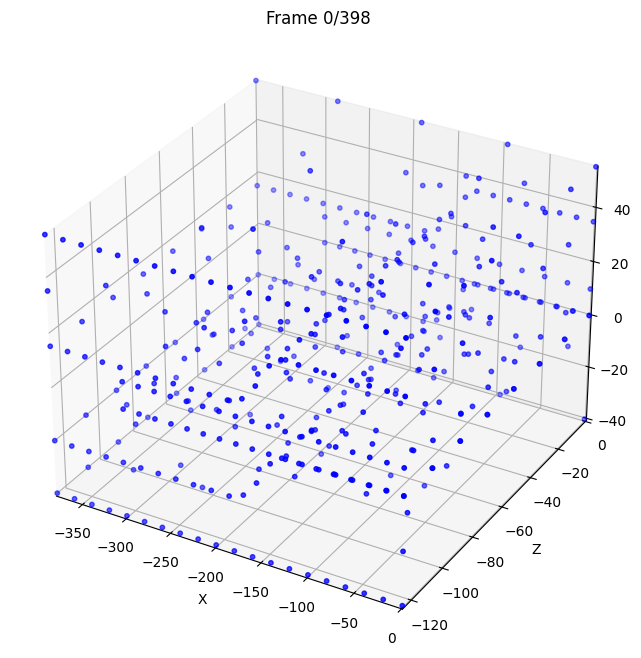

In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1. Load the Rollout
path = "/content/pressnet_rollout.pkl"
with open(path, 'rb') as f:
    rollouts = pickle.load(f)

# Extract the first trajectory
# Shape: [Time, Nodes, 3]
trajectory = rollouts[0]['predicted_rollout']
num_steps, num_nodes, _ = trajectory.shape

print(f"Loaded trajectory with {num_steps} frames and {num_nodes} nodes.")

# 2. Setup Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initial frame
scat = ax.scatter(trajectory[0, :, 0],
                  trajectory[0, :, 2],  # Swapping Y/Z often helps visualization
                  trajectory[0, :, 1],
                  c='b', marker='o', s=5, alpha=0.6)

# Set fixed axis limits so the camera doesn't jump
x_min, x_max = trajectory[:, :, 0].min(), trajectory[:, :, 0].max()
y_min, y_max = trajectory[:, :, 2].min(), trajectory[:, :, 2].max() # Swapped axes
z_min, z_max = trajectory[:, :, 1].min(), trajectory[:, :, 1].max()

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)
ax.set_xlabel('X')
ax.set_ylabel('Z (Depth)')
ax.set_zlabel('Y (Height)')
ax.set_title("PressNet Simulation Rollout")

# 3. Animation Function
def update(frame):
    current_pos = trajectory[frame]
    # Update scatter positions
    # Matplotlib 3D scatter requires specific handling or full redraw
    ax.clear()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    ax.set_title(f"Frame {frame}/{num_steps}")

    # Color mapping: Metal (center) vs Tool (edges) usually distinct by position
    # Just simple blue for now
    ax.scatter(current_pos[:, 0],
               current_pos[:, 2],
               current_pos[:, 1],
               c='blue', s=10)
    return scat,

# 4. Generate and Save
print("Generating animation (this may take a minute)...")
ani = animation.FuncAnimation(fig, update, frames=range(0, num_steps, 2), interval=50) # Skip frames for speed
ani.save('/content/pressnet_simulation.gif', writer='pillow', fps=15)

print("✅ Animation saved to /content/pressnet_simulation.gif")

Average RMSE over trajectory: 2.857170
Max RMSE over trajectory:     3.943794


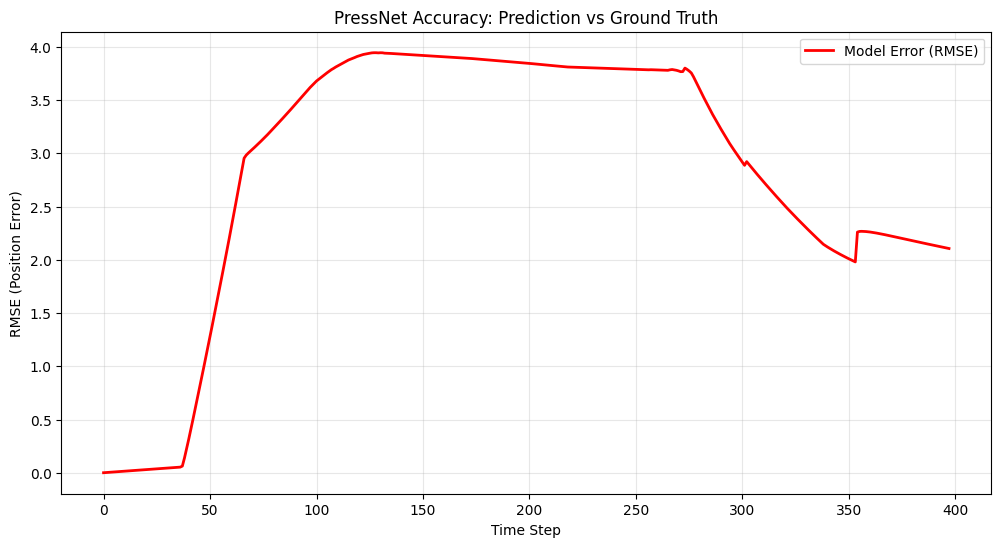

In [ ]:
# the code calculated root mean squared error
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data
path = "/content/pressnet_rollout.pkl"
with open(path, 'rb') as f:
    data = pickle.load(f)

# Extract (First trajectory)
pred = data[0]['predicted_rollout'] # [Time, Nodes, 3]
gt = data[0]['ground_truth']        # [Time, Nodes, 3]

# 2. Calculate RMSE per Frame
# Error = Sqrt( Mean( (Pred - GT)^2 ) )
mse = np.mean((pred - gt)**2, axis=(1, 2))
rmse = np.sqrt(mse)

# 3. Plot
plt.figure(figsize=(12, 6))
plt.plot(rmse, label='Model Error (RMSE)', color='red', linewidth=2)
plt.xlabel('Time Step')
plt.ylabel('RMSE (Position Error)')
plt.title('PressNet Accuracy: Prediction vs Ground Truth')
plt.grid(True, alpha=0.3)
plt.legend()

print(f"Average RMSE over trajectory: {np.mean(rmse):.6f}")
print(f"Max RMSE over trajectory:     {np.max(rmse):.6f}")

plt.savefig('/content/pressnet_accuracy_plot.png')
plt.show()

Mean Baseline Error: 6.0918
Mean Model Error:    2.8572
✅ Your model is 53.1% better than doing nothing.


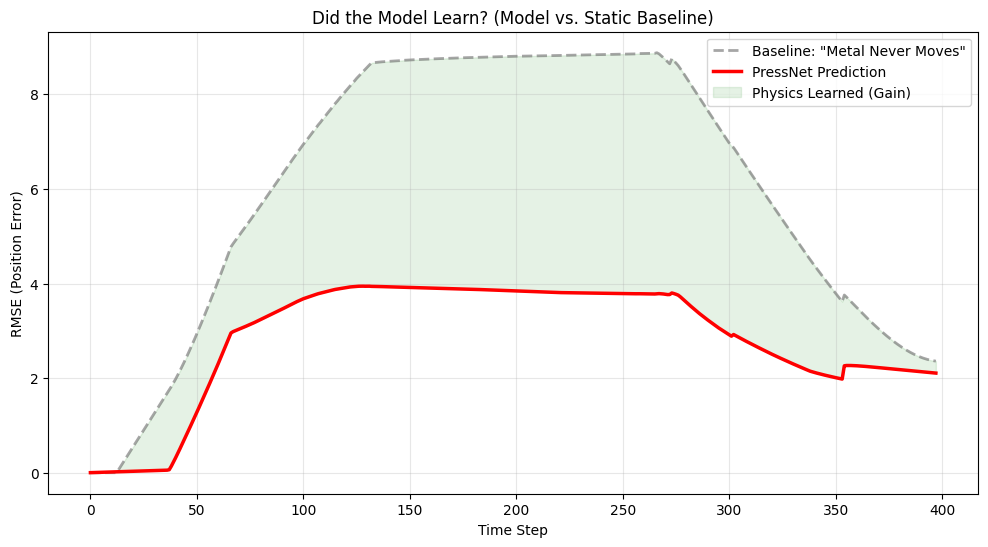

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data
path = "/content/pressnet_rollout.pkl"
with open(path, 'rb') as f:
    data = pickle.load(f)

pred = data[0]['predicted_rollout']  # [Time, Nodes, 3]
gt = data[0]['ground_truth']         # [Time, Nodes, 3]

# 2. Calculate Model RMSE
# How far is the Model from Reality?
mse_model = np.mean((pred - gt)**2, axis=(1, 2))
rmse_model = np.sqrt(mse_model)

# 3. Calculate Static Baseline RMSE
# "What if we just assumed the metal stayed at the starting position forever?"
# We use the first frame of the GT as the "Initial Position"
initial_pos = gt[0]
baseline_pred = np.tile(initial_pos, (gt.shape[0], 1, 1))

mse_base = np.mean((baseline_pred - gt)**2, axis=(1, 2))
rmse_base = np.sqrt(mse_base)

# 4. Plot Comparison
plt.figure(figsize=(12, 6))

# Plot Baseline (Gray Dashed)
plt.plot(rmse_base, label='Baseline: "Metal Never Moves"',
         color='gray', linestyle='--', linewidth=2, alpha=0.7)

# Plot Model (Red Solid)
plt.plot(rmse_model, label='PressNet Prediction',
         color='red', linewidth=2.5)

# Highlight the difference
plt.fill_between(range(len(rmse_model)), rmse_model, rmse_base,
                 where=(rmse_model < rmse_base),
                 color='green', alpha=0.1, label='Physics Learned (Gain)')

plt.xlabel('Time Step')
plt.ylabel('RMSE (Position Error)')
plt.title('Did the Model Learn? (Model vs. Static Baseline)')
plt.grid(True, alpha=0.3)
plt.legend()

# Stats
print(f"Mean Baseline Error: {np.mean(rmse_base):.4f}")
print(f"Mean Model Error:    {np.mean(rmse_model):.4f}")

improvement = (1 - np.mean(rmse_model) / np.mean(rmse_base)) * 100
print(f"✅ Your model is {improvement:.1f}% better than doing nothing.")

plt.savefig('/content/pressnet_learning_check.png')
plt.show()

Loaded trajectory: 398 frames.
Rendering side-by-side animation (skipping every 2nd frame for speed)...
✅ Comparison saved to /content/pressnet_comparison.gif


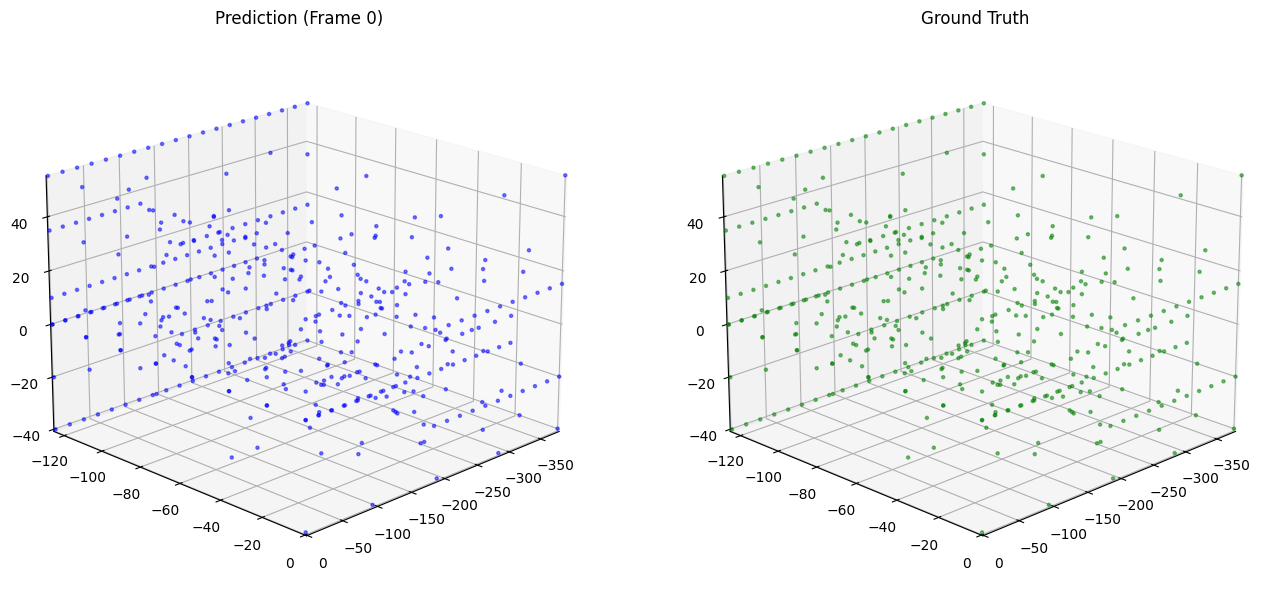

In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1. Load Data
path = "/content/pressnet_rollout.pkl"
with open(path, 'rb') as f:
    data = pickle.load(f)

pred_traj = data[0]['predicted_rollout']  # Prediction
gt_traj = data[0]['ground_truth']         # Ground Truth
num_steps = pred_traj.shape[0]

print(f"Loaded trajectory: {num_steps} frames.")

# 2. Determine Axis Limits (Fixed for both plots)
# We combine both to find the absolute max/min range so the scale is identical
all_data = np.concatenate([pred_traj, gt_traj], axis=0)
x_min, x_max = all_data[:, :, 0].min(), all_data[:, :, 0].max()
y_min, y_max = all_data[:, :, 2].min(), all_data[:, :, 2].max() # Swapped Z/Y for viewing
z_min, z_max = all_data[:, :, 1].min(), all_data[:, :, 1].max()

# 3. Setup Figure (Side-by-Side)
fig = plt.figure(figsize=(16, 8))

# --- Left Plot: Prediction ---
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_zlim(z_min, z_max)
ax1.set_xlabel('X')
ax1.set_ylabel('Z (Depth)')
ax1.set_zlabel('Y (Height)')
ax1.set_title("Prediction (Blue)")
scat1 = ax1.scatter([], [], [], c='blue', s=5, alpha=0.6)

# --- Right Plot: Ground Truth ---
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_zlim(z_min, z_max)
ax2.set_xlabel('X')
ax2.set_ylabel('Z (Depth)')
ax2.set_zlabel('Y (Height)')
ax2.set_title("Ground Truth (Green)")
scat2 = ax2.scatter([], [], [], c='green', s=5, alpha=0.6)

# 4. Animation Function
def update(frame):
    # Get Current Positions
    # Note: We swap Y and Z (index 1 and 2) for better Matplotlib viewing angle
    pos_pred = pred_traj[frame]
    pos_gt = gt_traj[frame]

    # Clear axes to prevent artifacts (Matplotlib 3D quirk)
    ax1.clear()
    ax2.clear()

    # Reset Limits & Labels (Clear wipes them)
    for ax, title in zip([ax1, ax2], [f"Prediction (Frame {frame})", "Ground Truth"]):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_zlim(z_min, z_max)
        ax.set_title(title)
        ax.view_init(elev=20, azim=45) # Consistent Camera Angle

    # Plot Prediction
    ax1.scatter(pos_pred[:, 0], pos_pred[:, 2], pos_pred[:, 1],
                c='blue', s=5, alpha=0.5)

    # Plot Ground Truth
    ax2.scatter(pos_gt[:, 0], pos_gt[:, 2], pos_gt[:, 1],
                c='green', s=5, alpha=0.5)

    return scat1, scat2

# 5. Generate and Save
print("Rendering side-by-side animation (skipping every 2nd frame for speed)...")
# animate every 2nd frame to keep file size reasonable
ani = animation.FuncAnimation(fig, update, frames=range(0, num_steps, 2), interval=50)
ani.save('/content/pressnet_comparison.gif', writer='pillow', fps=20)

print("✅ Comparison saved to /content/pressnet_comparison.gif")

In [ ]:
# pressnet_eval.py
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def ensure_rank_2(tensor, name="tensor"):
    """Ensures a tensor is Rank 2 [Nodes, Features]."""
    rank = tf.rank(tensor)
    return tf.cond(
        tf.equal(rank, 3),
        lambda: tensor[0],
        lambda: tensor
    )

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. DATA PREPARATION ---
  full_trajectory = inputs['world_pos'] # Ground Truth [Time, Nodes, 3]
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1
  current_pos = full_trajectory[0]

  # Sanitization
  node_type_static = ensure_rank_2(inputs['node_type'], "node_type")
  cells_static = ensure_rank_2(inputs['cells'], "cells")
  mesh_pos_static = ensure_rank_2(inputs['mesh_pos'], "mesh_pos")

  # Mask Preparation
  node_type_flat = tf.reshape(node_type_static, [-1])
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)
  mask_2d = tf.expand_dims(is_dynamic, -1)
  mask_3d = tf.tile(mask_2d, [1, 3])

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, trajectory_array):
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': mesh_pos_static,
        'node_type': node_type_static,
        'cells': cells_static
    }

    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    gt_next_pos = tf.gather(full_trajectory, step + 1)
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    next_pos = tf.where(mask_3d, prediction, gt_next_pos)
    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=num_rollout_steps, element_shape=[None, 3])

  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),
          tf.TensorShape([None, 3]),
          tf.TensorShape(None)
      )
  )

  # Stack predictions [Time, Nodes, 3]
  output_trajectory = final_ta.stack()

  # Slice GT to match [Time, Nodes, 3] (dropping the first frame)
  gt_trajectory = full_trajectory[1:]

  # --- 4. TILE STATIC DATA ---
  # The evaluation script expects node_type and mesh_pos to have a Time dimension.
  # We expand dims to [1, Nodes, F] and then tile by [Time, 1, 1].

  time_dim = tf.shape(output_trajectory)[0]

  node_type_tiled = tf.tile(tf.expand_dims(node_type_static, 0), [time_dim, 1, 1])
  mesh_pos_tiled = tf.tile(tf.expand_dims(mesh_pos_static, 0), [time_dim, 1, 1])

  # --- RETURN COMPATIBLE DICT ---
  return {}, {
      'pred_pos': output_trajectory,  # Renamed for compatibility
      'gt_pos': gt_trajectory,        # Renamed for compatibility
      'node_type': node_type_tiled,   # Added & Tiled
      'mesh_pos': mesh_pos_tiled      # Added & Tiled
  }

Writing /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
%cd /content/deepmind-research/

/content/deepmind-research


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation) - Corrected Version."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    # Structurally similar to cloth_model: Use _enter_variable_scope
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')
      self._edge_normalizer = normalization.Normalizer(
          size=8, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph."""
    # --- Step A: Node Features ---
    # Logic: PressNet uses binary encoding (Metal vs Tool)
    # 0 = Metal (NORMAL), 1 = Tool (Everything else)
    node_type = tf.reshape(inputs['node_type'], [-1])
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    node_features = tf.one_hot(type_idx, 2)

    # --- Step B: Edge Connectivity ---
    # Reshape inputs to ensure correct dimensions
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    senders, receivers = common.triangles_to_edges(cells)

    # --- Step C: Edge Features ---
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    relative_world_pos = (tf.gather(world_pos, senders) -
                          tf.gather(world_pos, receivers))
    relative_mesh_pos = (tf.gather(mesh_pos, senders) -
                         tf.gather(mesh_pos, receivers))

    edge_features = tf.concat([
        relative_world_pos,
        tf.norm(relative_world_pos, axis=-1, keepdims=True),
        relative_mesh_pos,
        tf.norm(relative_mesh_pos, axis=-1, keepdims=True)
    ], axis=-1)

    # --- Step D: Normalization & Return ---
    # Structurally similar: Return MultiGraph directly
    mesh_edges = core_model.EdgeSet(
        name='mesh_edges',
        features=self._edge_normalizer(edge_features, is_training),
        receivers=receivers,
        senders=senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[mesh_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    graph = self._build_graph(inputs, is_training=is_training)

    # Inference
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position (Quasi-Static update: pos + displacement)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    # 1. Build graph and run inference
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)

    # 2. Target calculation (Physics: Displacement)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    # --- CRITICAL FIX HERE ---
    # We combine accumulation and normalization into one step.
    # This ensures the 'accumulate' op is part of the graph and executes.
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)

    # 3. Calculate squared error
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # 4. Loss Masking
    # Using slice syntax `error[mask]` to match cloth_model.py style
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)

    loss = tf.reduce_mean(error[loss_mask])
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
!rm -r /content/checkpoints_pressnet

In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_run_model.py
# Lint as: python3
"""Runs the learner/evaluator for PressNet."""

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf
from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model
# --- CHANGE 1: Import PressNet modules ---
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_eval
from meshgraphnets import pressnet_dataset as dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
# --- CHANGE 2: Add 'pressnet' to valid models ---
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')

# --- CHANGE 3: Define Parameters for PressNet ---
PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,         # Standard noise to prevent drift
        'gamma': 0.1,           # Correction factor
        'field': 'world_pos',   # We add noise to positions
        'history': False,       # <--- CRITICAL: No history for Quasi-Static
        'size': 3,              # Predict 3D Displacement (dx, dy, dz)
        'core_model': pressnet_model.PressNetModel,
        'evaluator': pressnet_eval
    }
}

def learner(model, params):
  """Runs training loop."""
  # Load dataset using pressnet_dataset logic
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')

  # Add noise and batching
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])
  inputs = tf.data.make_one_shot_iterator(dataset.batch_dataset(ds, 2)).get_next()

  # Initialize Model
  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  # Learning Rate Schedule
  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # --- DEBUG SETUP: Define Tensors BEFORE Session Starts ---
  # We access the internal mean/std variables of the normalizer.
  # This creates the necessary graph nodes to read these values.
  if hasattr(model._output_normalizer, '_mean'):
      mean_t = model._output_normalizer._mean()
      std_t = model._output_normalizer._std_with_epsilon()
  else:
      mean_t, std_t = None, None

  # Hooks
  hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]

  # Start Session
  with tf.train.MonitoredTrainingSession(
      checkpoint_dir=FLAGS.checkpoint_dir,
      hooks=hooks,
      save_checkpoint_secs=180,
      save_summaries_steps=100) as sess:

    logging.info('🚀 Training Started...')

    # --- Training loop ---
    try:
      while not sess.should_stop():
        _, step, loss = sess.run([train_op, global_step, loss_op])

        # Logging Standard Loss
        if step % 100 == 0:
          logging.info('Step %d: Loss = %.6f', step, loss)

        # --- NEW: Logging Normalizer Stats Every 1000 Steps ---
        if step % 1000 == 0 and mean_t is not None:
             curr_mean, curr_std = sess.run([mean_t, std_t])
             logging.info("Step %d Normalizer Stats:", step)
             logging.info(" -> Mean: %s", np.array2string(curr_mean, precision=6))
             logging.info(" -> Std : %s", np.array2string(curr_std, precision=6))

    except Exception:
      logging.exception("Training loop ended with exception.")
      raise


def evaluator(model, params):
  """Runs evaluation rollouts."""
  logging.info('🚀 Evaluation Started...')

  # 1. Load Dataset
  ds = dataset.load_dataset(FLAGS.dataset_dir, FLAGS.rollout_split)
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  # Inputs is a single trajectory (batch size 1 implicit)
  inputs = tf.data.make_one_shot_iterator(ds).get_next()

  # 2. Build Computational Graph
  # scalar_ops: MSE error metrics
  # traj_ops: The actual 3D coordinates (Ground Truth vs Prediction)
  scalar_ops, traj_ops = params['evaluator'].evaluate(model, inputs)

  # 3. Start Session & Restore Checkpoint
  # MonitoredSession handles loading the latest checkpoint automatically
  with tf.train.MonitoredSession(
      session_creator=tf.train.ChiefSessionCreator(
          checkpoint_dir=FLAGS.checkpoint_dir,
          master='',
          config=tf.ConfigProto(log_device_placement=False))) as sess:

    # 4. Rollout Loop
    trajectories = []
    for i in range(FLAGS.num_rollouts):
      try:
        logging.info('Rolling out trajectory %d / %d...', i + 1, FLAGS.num_rollouts)
        scalars, traj = sess.run([scalar_ops, traj_ops])

        # Log MSE errors
        logging.info('  -> Error: %s', scalars)
        trajectories.append(traj)
      except tf.errors.OutOfRangeError:
        break

    # 5. Save Results
    if FLAGS.rollout_path:
      logging.info('Saving trajectories to %s', FLAGS.rollout_path)
      with open(FLAGS.rollout_path, 'wb') as f:
        pickle.dump(trajectories, f)

def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  # Build the core GNN model (Encoder -> Processor -> Decoder)
  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  # Wrap it in our Physics Model (PressNetModel)
  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)

if __name__ == '__main__':
  app.run(main)

Overwriting /content/deepmind-research/meshgraphnets/pressnet_run_model.py


In [ ]:
# pressnet_model_with radius search

%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation) - Corrected Version."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')

      # --- CRITICAL CHANGE: EDGE SIZE ---
      # Previous size: 8 (rel_world + norm + rel_mesh + norm)
      # New size: 9 (Added 1 feature for 'Edge Type': 0=Mesh, 1=Collision)
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph with both Mesh and Collision edges."""

    # --- Step A: Node Features ---
    # 0 = Metal (NORMAL), 1 = Tool/Obstacle
    node_type = tf.reshape(inputs['node_type'], [-1])
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    node_features = tf.one_hot(type_idx, 2)

    # --- Step B: Edge Connectivity ---

    # 1. Mesh Edges (Permanent internal structure)
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    # 2. Collision Edges (Dynamic external contact)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])

    # === PARAMETER: COLLISION RADIUS ===
    # This determines the "bubble" size for contact detection.
    # Adjust this based on your dataset units (e.g., 0.02 for 2cm).
    COLLISION_RADIUS = 0.02

    # Find nodes that are close to each other
    # Note: Ensure common.radius_graph is implemented in common.py
    radius_senders, radius_receivers = common.radius_graph(
        world_pos, radius=COLLISION_RADIUS, max_neighbors=20)

    # --- Step C: Edge Features ---
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # -- Feature Set 1: MESH Edges --
    # These edges know about the "Resting Pose" (mesh_pos)
    mesh_rel_world = (tf.gather(world_pos, mesh_senders) - tf.gather(world_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        tf.zeros([tf.shape(mesh_senders)[0], 1]) # Type 0: Internal Edge
    ], axis=-1)

    # -- Feature Set 2: COLLISION Edges --
    # These edges represent temporary contact. They have NO "Resting Pose" relation.
    # We fill the mesh-related slots with zeros.
    col_rel_world = (tf.gather(world_pos, radius_senders) - tf.gather(world_pos, radius_receivers))

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world),               # Placeholder for mesh_rel
        tf.zeros([tf.shape(radius_senders)[0], 1]), # Placeholder for mesh_norm
        tf.ones([tf.shape(radius_senders)[0], 1])   # Type 1: Collision Edge
    ], axis=-1)

    # --- Step D: Combine & Return ---
    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    graph = self._build_graph(inputs, is_training=is_training)

    # Inference
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position (Quasi-Static update: pos + displacement)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    # 1. Build graph and run inference
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)

    # 2. Target calculation (Physics: Displacement)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    # 3. Normalization with Accumulation
    # Important: accumulate=True updates the running statistics for the normalizer
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)

    # 4. Calculate squared error
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # 5. Loss Masking (Only train on Metal nodes, ignore Tool nodes)
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)

    loss = tf.reduce_mean(error[loss_mask])
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# overwrite common.py to include radius search

%%writefile /content/deepmind-research/meshgraphnets/common.py
# pylint: disable=g-bad-file-header
# Copyright 2020 DeepMind Technologies Limited. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or  implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================
"""Commonly used data structures and functions."""

import enum
import tensorflow.compat.v1 as tf


class NodeType(enum.IntEnum):
  NORMAL = 0
  OBSTACLE = 1
  AIRFOIL = 2
  HANDLE = 3
  INFLOW = 4
  OUTFLOW = 5
  WALL_BOUNDARY = 6
  SIZE = 9


def triangles_to_edges(faces):
  """Computes mesh edges from triangles."""
  # collect edges from triangles
  edges = tf.concat([faces[:, 0:2],
                     faces[:, 1:3],
                     tf.stack([faces[:, 2], faces[:, 0]], axis=1)], axis=0)
  # those edges are sometimes duplicated (within the mesh) and sometimes
  # single (at the mesh boundary).
  # sort & pack edges as single tf.int64
  receivers = tf.reduce_min(edges, axis=1)
  senders = tf.reduce_max(edges, axis=1)
  packed_edges = tf.bitcast(tf.stack([senders, receivers], axis=1), tf.int64)
  # remove duplicates and unpack
  unique_edges = tf.bitcast(tf.unique(packed_edges)[0], tf.int32)
  senders, receivers = tf.unstack(unique_edges, axis=1)
  # create two-way connectivity
  return (tf.concat([senders, receivers], axis=0),
          tf.concat([receivers, senders], axis=0))


def radius_graph(x, radius, max_neighbors=None, loop=False):
  """Constructs a graph based on a radius search.

  Args:
    x: Position tensor [num_nodes, 3]
    radius: The radius distance for connection.
    max_neighbors: (Unused in this brute force version)
    loop: Whether to include self-loops.

  Returns:
    senders, receivers: Indices of connected nodes.
  """
  # Calculate pairwise distances (N x N matrix)
  # Note: This is O(N^2). If you have >5000 nodes, let me know,
  # and we can replace this with a faster scipy cdist implementation.
  dist = tf.norm(tf.expand_dims(x, 0) - tf.expand_dims(x, 1), axis=-1)

  # Find edges where distance is less than radius
  adj = tf.less(dist, radius)

  # Remove self-loops (diagonal) unless requested
  if not loop:
    mask = tf.eye(tf.shape(x)[0], dtype=tf.bool)
    adj = tf.logical_and(adj, tf.logical_not(mask))

  # Convert boolean mask to indices
  edges = tf.where(adj)
  senders = edges[:, 0]
  receivers = edges[:, 1]

  return senders, receivers

Overwriting /content/deepmind-research/meshgraphnets/common.py


In [ ]:
# overwrite pressnet_model.py
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation) - Corrected Version."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')

      # Size = 9 (rel_world(3) + norm(1) + rel_mesh(3) + norm(1) + type(1))
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph with both Mesh and Collision edges."""

    # --- Step A: Node Features ---
    node_type = tf.reshape(inputs['node_type'], [-1])
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    node_features = tf.one_hot(type_idx, 2)

    # --- Step B: Edge Connectivity ---

    # 1. Mesh Edges
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    # 2. Collision Edges
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    COLLISION_RADIUS = 0.02
    radius_senders, radius_receivers = common.radius_graph(
        world_pos, radius=COLLISION_RADIUS, max_neighbors=20)

    # --- Step C: Edge Features ---
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # -- Feature Set 1: MESH Edges --
    mesh_rel_world = (tf.gather(world_pos, mesh_senders) - tf.gather(world_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    # FIX 1: Use tf.fill for dynamic shapes
    num_mesh_edges = tf.shape(mesh_senders)[0]
    mesh_type_feature = tf.zeros((num_mesh_edges, 1), dtype=tf.float32)

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        mesh_type_feature # Type 0
    ], axis=-1)

    # -- Feature Set 2: COLLISION Edges --
    col_rel_world = (tf.gather(world_pos, radius_senders) - tf.gather(world_pos, radius_receivers))

    # FIX 2: Use tf.fill/tf.ones with tuple shape for dynamic shapes
    num_col_edges = tf.shape(radius_senders)[0]
    col_type_feature = tf.ones((num_col_edges, 1), dtype=tf.float32)

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world),
        tf.zeros((num_col_edges, 1), dtype=tf.float32),
        col_type_feature # Type 1
    ], axis=-1)

    # --- Step D: Combine & Return ---
    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    graph = self._build_graph(inputs, is_training=is_training)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)
    loss = tf.reduce_mean(error[loss_mask])
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# overwrite pressnet_model.py

%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation) - Corrected Version."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')

      # Size = 9 (rel_world(3) + norm(1) + rel_mesh(3) + norm(1) + type(1))
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph with both Mesh and Collision edges."""

    # --- Step A: Node Features ---
    node_type = tf.reshape(inputs['node_type'], [-1])
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    node_features = tf.one_hot(type_idx, 2)

    # --- Step B: Edge Connectivity ---

    # 1. Mesh Edges
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    # 2. Collision Edges
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    COLLISION_RADIUS = 0.02
    radius_senders, radius_receivers = common.radius_graph(
        world_pos, radius=COLLISION_RADIUS, max_neighbors=20)

    # --- Step C: Edge Features ---
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # -- Feature Set 1: MESH Edges --
    mesh_rel_world = (tf.gather(world_pos, mesh_senders) - tf.gather(world_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    # FIX: Use tf.stack to create a purely symbolic shape tensor
    # This prevents the "Cannot convert symbolic Tensor to numpy" error
    num_mesh_edges = tf.shape(mesh_senders)[0]
    mesh_edge_shape = tf.stack([num_mesh_edges, 1])

    # We use tf.fill to ensure the shape is handled dynamically
    mesh_type_feature = tf.fill(mesh_edge_shape, 0.0)

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        mesh_type_feature # Type 0
    ], axis=-1)

    # -- Feature Set 2: COLLISION Edges --
    col_rel_world = (tf.gather(world_pos, radius_senders) - tf.gather(world_pos, radius_receivers))

    # FIX: Use tf.stack for collision edges too
    num_col_edges = tf.shape(radius_senders)[0]
    col_edge_shape = tf.stack([num_col_edges, 1])

    # Create dynamic placeholders
    col_zeros = tf.fill(col_edge_shape, 0.0)
    col_type_feature = tf.fill(col_edge_shape, 1.0) # Type 1

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world), # mesh_rel placeholder
        col_zeros,                    # mesh_norm placeholder
        col_type_feature              # Type 1
    ], axis=-1)

    # --- Step D: Combine & Return ---
    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    graph = self._build_graph(inputs, is_training=is_training)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)
    loss = tf.reduce_mean(error[loss_mask])
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# overwrite pressnet_model.py

%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet (Quasi-Static Formulation) - Corrected Version."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state (Quasi-static)."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')

      # Size = 9 (rel_world(3) + norm(1) + rel_mesh(3) + norm(1) + type(1))
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph with both Mesh and Collision edges."""

    # --- Step A: Node Features ---
    node_type = tf.reshape(inputs['node_type'], [-1])
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    node_features = tf.one_hot(type_idx, 2)

    # --- Step B: Edge Connectivity ---

    # 1. Mesh Edges (int32)
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    # 2. Collision Edges (Defaults to int64)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    COLLISION_RADIUS = 0.02
    radius_senders, radius_receivers = common.radius_graph(
        world_pos, radius=COLLISION_RADIUS, max_neighbors=20)

    # FIX: Cast collision edges to int32 to match mesh edges
    radius_senders = tf.cast(radius_senders, tf.int32)
    radius_receivers = tf.cast(radius_receivers, tf.int32)

    # --- Step C: Edge Features ---
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # -- Feature Set 1: MESH Edges --
    mesh_rel_world = (tf.gather(world_pos, mesh_senders) - tf.gather(world_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    # Dynamic shape handling for Mesh edges
    num_mesh_edges = tf.shape(mesh_senders)[0]
    mesh_edge_shape = tf.stack([num_mesh_edges, 1])
    mesh_type_feature = tf.fill(mesh_edge_shape, 0.0)

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        mesh_type_feature # Type 0
    ], axis=-1)

    # -- Feature Set 2: COLLISION Edges --
    col_rel_world = (tf.gather(world_pos, radius_senders) - tf.gather(world_pos, radius_receivers))

    # Dynamic shape handling for Collision edges
    num_col_edges = tf.shape(radius_senders)[0]
    col_edge_shape = tf.stack([num_col_edges, 1])

    col_zeros = tf.fill(col_edge_shape, 0.0)
    col_type_feature = tf.fill(col_edge_shape, 1.0) # Type 1

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world),
        col_zeros,
        col_type_feature
    ], axis=-1)

    # --- Step D: Combine & Return ---
    # Now both are int32, so this concat will work
    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    graph = self._build_graph(inputs, is_training=is_training)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)
    loss = tf.reduce_mean(error[loss_mask])
    return loss

Writing /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
# Jan 13

In [ ]:
#===========================================================================
# pressnet_model.py
#===========================================================================

In [ ]:


%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet - Velocity Features Enabled."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')
      # NEW: Node Normalizer size = 5 (2 for Type + 3 for Velocity)
      self._node_normalizer = normalization.Normalizer(
          size=5, name='node_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph with Velocity Features."""

    current_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    node_type = tf.reshape(inputs['node_type'], [-1])

    # 1. Identify Tool Nodes (1.0 = Tool, 0.0 = Metal)
    is_tool = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.float32)
    is_tool_3d = tf.expand_dims(is_tool, -1)

    # --- VELOCITY CALCULATION ---

    # Training: Calculate velocity from targets
    def get_training_velocity():
        target = tf.reshape(inputs['target|world_pos'], [-1, 3])
        return target - current_pos

    # Inference: Manual override (prevent crash since History is OFF)
    def get_manual_velocity():
        # Default speed: -1.0 mm/step (Z-axis)
        z_speed = -1.0
        manual_vel = tf.constant([0.0, 0.0, z_speed], dtype=tf.float32)
        batch_size = tf.shape(current_pos)[0]
        return tf.tile(tf.expand_dims(manual_vel, 0), [batch_size, 1])

    # Check if we have targets (Training) or not (Inference)
    if 'target|world_pos' in inputs:
        step_displacement = get_training_velocity()
    else:
        step_displacement = get_manual_velocity()

    # Apply Velocity ONLY to Tool Nodes
    known_velocity = step_displacement * is_tool_3d

    # Calculate "Forcing Position" (Teleport Tool to Future for edge search)
    forcing_pos = (current_pos + known_velocity) * is_tool_3d + current_pos * (1.0 - is_tool_3d)

    # --- NODE FEATURES (The requested change) ---
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    one_hot_type = tf.one_hot(type_idx, 2)

    # Concatenate: [Type (2), Velocity (3)] -> Total Size 5
    raw_node_features = tf.concat([one_hot_type, known_velocity], axis=-1)
    node_features = self._node_normalizer(raw_node_features, is_training)

    # --- EDGE CONNECTIVITY ---
    # Use forcing_pos (Future) to find collisions
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    COLLISION_RADIUS = 30.0
    radius_senders, radius_receivers = common.radius_graph(
        forcing_pos, radius=COLLISION_RADIUS, max_neighbors=50)

    radius_senders = tf.cast(radius_senders, tf.int32)
    radius_receivers = tf.cast(radius_receivers, tf.int32)

    # --- EDGE FEATURES ---
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # Mesh Edges
    mesh_rel_world = (tf.gather(forcing_pos, mesh_senders) - tf.gather(forcing_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    num_mesh_edges = tf.shape(mesh_senders)[0]
    mesh_edge_shape = tf.stack([num_mesh_edges, 1])

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        tf.fill(mesh_edge_shape, 0.0)
    ], axis=-1)

    # Collision Edges
    col_rel_world = (tf.gather(forcing_pos, radius_senders) - tf.gather(forcing_pos, radius_receivers))

    num_col_edges = tf.shape(radius_senders)[0]
    col_edge_shape = tf.stack([num_col_edges, 1])

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world),
        tf.fill(col_edge_shape, 0.0),
        tf.fill(col_edge_shape, 1.0)
    ], axis=-1)

    # Combine
    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass."""
    graph = self._build_graph(inputs, is_training=is_training)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    target_normalized = self._output_normalizer(target_displacement, accumulate=True)
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)
    loss = tf.reduce_mean(error[loss_mask])
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
import os

file_content = """# Lint as: python3
\"\"\"Model for PressNet - Forces Tool Movement in Output.\"\"\"

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  \"\"\"Model that predicts next position based on current state.\"\"\"

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')
      # Node Normalizer size = 5 (2 for Type + 3 for Velocity)
      self._node_normalizer = normalization.Normalizer(
          size=5, name='node_normalizer')

  def _build_graph(self, inputs, is_training):
    \"\"\"Builds input graph with Velocity Features.\"\"\"

    current_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    node_type = tf.reshape(inputs['node_type'], [-1])
    is_tool = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.float32)
    is_tool_3d = tf.expand_dims(is_tool, -1)

    # --- VELOCITY CALCULATION (SHARED LOGIC) ---
    # We define this logic here to generate FEATURES

    def get_training_velocity():
        target = tf.reshape(inputs['target|world_pos'], [-1, 3])
        return target - current_pos

    def get_manual_velocity():
        # --- TUNING PARAMETER ---
        # Speed: -1.0 mm per step in Z axis.
        z_speed = -1.0
        manual_vel = tf.constant([0.0, 0.0, z_speed], dtype=tf.float32)
        batch_size = tf.shape(current_pos)[0]
        return tf.tile(tf.expand_dims(manual_vel, 0), [batch_size, 1])

    if 'target|world_pos' in inputs:
        step_displacement = get_training_velocity()
    else:
        step_displacement = get_manual_velocity()

    # Apply Velocity ONLY to Tool Nodes
    known_velocity = step_displacement * is_tool_3d

    # Calculate "Forcing Position"
    forcing_pos = (current_pos + known_velocity) * is_tool_3d + current_pos * (1.0 - is_tool_3d)

    # --- NODE FEATURES ---
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    one_hot_type = tf.one_hot(type_idx, 2)

    # Feature: [Type, Velocity]
    raw_node_features = tf.concat([one_hot_type, known_velocity], axis=-1)
    node_features = self._node_normalizer(raw_node_features, is_training)

    # --- EDGES ---
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    COLLISION_RADIUS = 30.0
    radius_senders, radius_receivers = common.radius_graph(
        forcing_pos, radius=COLLISION_RADIUS, max_neighbors=50)

    radius_senders = tf.cast(radius_senders, tf.int32)
    radius_receivers = tf.cast(radius_receivers, tf.int32)

    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])
    mesh_rel_world = (tf.gather(forcing_pos, mesh_senders) - tf.gather(forcing_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    num_mesh_edges = tf.shape(mesh_senders)[0]
    mesh_edge_shape = tf.stack([num_mesh_edges, 1])

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        tf.fill(mesh_edge_shape, 0.0)
    ], axis=-1)

    col_rel_world = (tf.gather(forcing_pos, radius_senders) - tf.gather(forcing_pos, radius_receivers))
    num_col_edges = tf.shape(radius_senders)[0]
    col_edge_shape = tf.stack([num_col_edges, 1])

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world),
        tf.fill(col_edge_shape, 0.0),
        tf.fill(col_edge_shape, 1.0)
    ], axis=-1)

    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    \"\"\"Forward pass with MANUAL OUTPUT UPDATE.\"\"\"
    graph = self._build_graph(inputs, is_training=is_training)

    # 1. Get Neural Network Prediction (For Metal)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 2. Setup Masks
    node_type = tf.reshape(inputs['node_type'], [-1])
    is_tool = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.float32)
    is_metal = 1.0 - is_tool

    is_tool_3d = tf.expand_dims(is_tool, -1)
    is_metal_3d = tf.expand_dims(is_metal, -1)

    # 3. Calculate Manual Tool Movement (Must match _build_graph logic!)
    # Same speed as above: -1.0
    z_speed = -1.0
    manual_tool_vel = tf.constant([0.0, 0.0, z_speed], dtype=tf.float32)
    batch_size = tf.shape(node_type)[0]
    manual_displacement = tf.tile(tf.expand_dims(manual_tool_vel, 0), [batch_size, 1])

    # 4. MERGE: Metal uses Network Prediction, Tool uses Manual Force
    final_displacement = (predicted_displacement * is_metal_3d) + (manual_displacement * is_tool_3d)

    # 5. Return new positions
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + final_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    \"\"\"Calculates L2 loss.\"\"\"
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    target_normalized = self._output_normalizer(target_displacement, accumulate=True)
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)
    loss = tf.reduce_mean(error[loss_mask])
    return loss
"""

path = '/content/deepmind-research/meshgraphnets/pressnet_model.py'
with open(path, 'w') as f:
    f.write(file_content)

print(f"Successfully wrote {path} with FORCED OUTPUT updates.")

Successfully wrote /content/deepmind-research/meshgraphnets/pressnet_model.py with FORCED OUTPUT updates.


In [ ]:
#================================================================================
# pressnet_eval.py
#===============================================================================

In [ ]:

%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet - Corrected to allow Model-Driven Tool."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def ensure_rank_2(tensor, name="tensor"):
    """Ensures a tensor is Rank 2 [Nodes, Features]."""
    rank = tf.rank(tensor)
    return tf.cond(
        tf.equal(rank, 3),
        lambda: tensor[0],
        lambda: tensor
    )

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. DATA PREPARATION ---
  full_trajectory = inputs['world_pos'] # Ground Truth [Time, Nodes, 3]
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1
  current_pos = full_trajectory[0]

  # Sanitization
  node_type_static = ensure_rank_2(inputs['node_type'], "node_type")
  cells_static = ensure_rank_2(inputs['cells'], "cells")
  mesh_pos_static = ensure_rank_2(inputs['mesh_pos'], "mesh_pos")

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, trajectory_array):
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': mesh_pos_static,
        'node_type': node_type_static,
        'cells': cells_static
    }

    # Get prediction from model
    # (Since we fixed pressnet_model.py, this prediction ALREADY contains
    #  the Metal deformation AND the Manual Tool Movement)
    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    # --- CRITICAL CHANGE ---
    # We DO NOT overwrite the tool with Ground Truth anymore.
    # We trust the model (which has the manual override) to move the tool.

    next_pos = prediction  # <--- Just use the prediction directly!

    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=num_rollout_steps, element_shape=[None, 3])

  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),
          tf.TensorShape([None, 3]),
          tf.TensorShape(None)
      )
  )

  # Stack predictions [Time, Nodes, 3]
  output_trajectory = final_ta.stack()

  # Slice GT to match [Time, Nodes, 3] (dropping the first frame)
  gt_trajectory = full_trajectory[1:]

  # --- 4. TILE STATIC DATA ---
  time_dim = tf.shape(output_trajectory)[0]

  node_type_tiled = tf.tile(tf.expand_dims(node_type_static, 0), [time_dim, 1, 1])
  mesh_pos_tiled = tf.tile(tf.expand_dims(mesh_pos_static, 0), [time_dim, 1, 1])

  # --- RETURN COMPATIBLE DICT ---
  return {}, {
      'pred_pos': output_trajectory,
      'gt_pos': gt_trajectory,
      'node_type': node_type_tiled,
      'mesh_pos': mesh_pos_tiled
  }

Overwriting /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet - Corrected to allow Model-Driven Tool."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def ensure_rank_2(tensor, name="tensor"):
    """Ensures a tensor is Rank 2 [Nodes, Features]."""
    rank = tf.rank(tensor)
    return tf.cond(
        tf.equal(rank, 3),
        lambda: tensor[0],
        lambda: tensor
    )

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. DATA PREPARATION ---
  full_trajectory = inputs['world_pos'] # Ground Truth [Time, Nodes, 3]
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1
  current_pos = full_trajectory[0]

  # Sanitization
  node_type_static = ensure_rank_2(inputs['node_type'], "node_type")
  cells_static = ensure_rank_2(inputs['cells'], "cells")
  mesh_pos_static = ensure_rank_2(inputs['mesh_pos'], "mesh_pos")

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, trajectory_array):
    model_inputs = {
        'world_pos': current_pos,
        'mesh_pos': mesh_pos_static,
        'node_type': node_type_static,
        'cells': cells_static
    }

    # Get prediction from model
    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    # We trust the model (which has the manual override) to move the tool.
    next_pos = prediction

    trajectory_array = trajectory_array.write(step, next_pos)

    return step + 1, next_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=num_rollout_steps, element_shape=[None, 3])

  _, _, final_ta = tf.while_loop(
      cond=lambda s, c, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),
          tf.TensorShape([None, 3]),
          tf.TensorShape(None)
      )
  )

  # Stack predictions [Time, Nodes, 3]
  output_trajectory = final_ta.stack()

  # Slice GT to match [Time, Nodes, 3] (dropping the first frame)
  gt_trajectory = full_trajectory[1:]

  # --- 4. TILE STATIC DATA ---
  time_dim = tf.shape(output_trajectory)[0]

  node_type_tiled = tf.tile(tf.expand_dims(node_type_static, 0), [time_dim, 1, 1])
  mesh_pos_tiled = tf.tile(tf.expand_dims(mesh_pos_static, 0), [time_dim, 1, 1])

  # --- RETURN COMPATIBLE DICT ---
  return {}, {
      'pred_pos': output_trajectory,
      'gt_pos': gt_trajectory,
      'node_type': node_type_tiled,
      'mesh_pos': mesh_pos_tiled,
      'faces': cells_static  # <--- ADDED THIS LINE
  }

Writing /content/deepmind-research/meshgraphnets/pressnet_eval.py


FileNotFoundError: [Errno 2] No such file or directory: '/content/deepmind-research/meshgraphnets/pressnet_eval.py'

In [ ]:
#pressnet_model.py

import os

file_content = """# Lint as: python3
\"\"\"Model for PressNet - With DEBUG PRINTS and Manual Velocity.\"\"\"

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  \"\"\"Model that predicts next position based on current state.\"\"\"

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')
      # Node Normalizer size = 5 (2 for Type + 3 for Velocity)
      self._node_normalizer = normalization.Normalizer(
          size=5, name='node_normalizer')

  def _build_graph(self, inputs, is_training):
    \"\"\"Builds input graph with Velocity Features.\"\"\"

    current_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    node_type = tf.reshape(inputs['node_type'], [-1])

    # 1. Identify Tool Nodes (1.0 = Tool, 0.0 = Metal)
    is_tool = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.float32)
    is_tool_3d = tf.expand_dims(is_tool, -1)

    # --- VELOCITY CALCULATION ---

    def get_training_velocity():
        target = tf.reshape(inputs['target|world_pos'], [-1, 3])
        return target - current_pos

    def get_manual_velocity():
        # Speed: -1.0 mm per step in Z axis.
        z_speed = -1.0
        manual_vel = tf.constant([0.0, 0.0, z_speed], dtype=tf.float32)
        batch_size = tf.shape(current_pos)[0]
        return tf.tile(tf.expand_dims(manual_vel, 0), [batch_size, 1])

    if 'target|world_pos' in inputs:
        step_displacement = get_training_velocity()
    else:
        step_displacement = get_manual_velocity()

    # Apply Velocity ONLY to Tool Nodes
    known_velocity = step_displacement * is_tool_3d

    # Calculate "Forcing Position" (Teleport Tool to Future)
    forcing_pos = (current_pos + known_velocity) * is_tool_3d + current_pos * (1.0 - is_tool_3d)

    # --- NODE FEATURES ---
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    one_hot_type = tf.one_hot(type_idx, 2)

    raw_node_features = tf.concat([one_hot_type, known_velocity], axis=-1)
    node_features = self._node_normalizer(raw_node_features, is_training)

    # --- EDGE CONNECTIVITY ---
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    COLLISION_RADIUS = 30.0
    radius_senders, radius_receivers = common.radius_graph(
        forcing_pos, radius=COLLISION_RADIUS, max_neighbors=50)

    # --- DEBUG PRINT START ---
    # 1. Count edges
    num_col_edges = tf.shape(radius_senders)[0]

    # 2. Check if Forcing Position is actually different from Current Position
    # (If this is 0, the tool isn't moving effectively)
    disp_diff = tf.reduce_mean(tf.abs(forcing_pos - current_pos))

    print_op = tf.print(
        "DEBUG INFO -> Collision Edges:", num_col_edges,
        "| Forcing Displacement (Avg):", disp_diff
    )

    with tf.control_dependencies([print_op]):
        radius_senders = tf.cast(radius_senders, tf.int32)
        radius_receivers = tf.cast(radius_receivers, tf.int32)
    # --- DEBUG PRINT END ---

    # --- EDGE FEATURES ---
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    # Mesh Edges
    mesh_rel_world = (tf.gather(forcing_pos, mesh_senders) - tf.gather(forcing_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    num_mesh_edges = tf.shape(mesh_senders)[0]
    mesh_edge_shape = tf.stack([num_mesh_edges, 1])

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        tf.fill(mesh_edge_shape, 0.0)
    ], axis=-1)

    # Collision Edges
    col_rel_world = (tf.gather(forcing_pos, radius_senders) - tf.gather(forcing_pos, radius_receivers))

    num_col_edges = tf.shape(radius_senders)[0]
    col_edge_shape = tf.stack([num_col_edges, 1])

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world),
        tf.fill(col_edge_shape, 0.0),
        tf.fill(col_edge_shape, 1.0)
    ], axis=-1)

    # Combine
    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    \"\"\"Forward pass with MANUAL OUTPUT UPDATE.\"\"\"
    graph = self._build_graph(inputs, is_training=is_training)

    # 1. Get Neural Network Prediction (For Metal)
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 2. Setup Masks
    node_type = tf.reshape(inputs['node_type'], [-1])
    is_tool = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.float32)
    is_metal = 1.0 - is_tool

    is_tool_3d = tf.expand_dims(is_tool, -1)
    is_metal_3d = tf.expand_dims(is_metal, -1)

    # 3. Calculate Manual Tool Movement (Output)
    # Must match the speed used in _build_graph
    z_speed = -1.0
    manual_tool_vel = tf.constant([0.0, 0.0, z_speed], dtype=tf.float32)
    batch_size = tf.shape(node_type)[0]
    manual_displacement = tf.tile(tf.expand_dims(manual_tool_vel, 0), [batch_size, 1])

    # 4. MERGE: Metal uses Network Prediction, Tool uses Manual Force
    final_displacement = (predicted_displacement * is_metal_3d) + (manual_displacement * is_tool_3d)

    # 5. Return new positions
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + final_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    \"\"\"Calculates L2 loss.\"\"\"
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    target_normalized = self._output_normalizer(target_displacement, accumulate=True)
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)
    loss = tf.reduce_mean(error[loss_mask])
    return loss
"""

path = '/content/deepmind-research/meshgraphnets/pressnet_model.py'
with open(path, 'w') as f:
    f.write(file_content)

print(f"Successfully wrote {path}")

Successfully wrote /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
#pressnet_model.py
import os

file_content = """# Lint as: python3
\"\"\"Model for PressNet - CORRECTED AXIS (Y) and SPEED.\"\"\"

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  \"\"\"Model that predicts next position based on current state.\"\"\"

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')
      self._edge_normalizer = normalization.Normalizer(
          size=9, name='edge_normalizer')
      self._node_normalizer = normalization.Normalizer(
          size=5, name='node_normalizer')

  def _build_graph(self, inputs, is_training):
    \"\"\"Builds input graph with Velocity Features.\"\"\"

    current_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    node_type = tf.reshape(inputs['node_type'], [-1])

    # 1. Identify Tool Nodes
    is_tool = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.float32)
    is_tool_3d = tf.expand_dims(is_tool, -1)

    # --- VELOCITY CALCULATION ---

    def get_training_velocity():
        target = tf.reshape(inputs['target|world_pos'], [-1, 3])
        return target - current_pos

    def get_manual_velocity():
        # --- CORRECTION APPLIED HERE ---
        # Based on your logs: Mean Y movement is -0.042
        # We set Y speed to -0.045 to match the dataset.
        x_speed = 0.0
        y_speed = -0.045  # <--- CHANGED FROM Z TO NEGATIVE Y
        z_speed = 0.0

        manual_vel = tf.constant([x_speed, y_speed, z_speed], dtype=tf.float32)
        batch_size = tf.shape(current_pos)[0]
        return tf.tile(tf.expand_dims(manual_vel, 0), [batch_size, 1])

    if 'target|world_pos' in inputs:
        step_displacement = get_training_velocity()
    else:
        step_displacement = get_manual_velocity()

    # Apply Velocity ONLY to Tool Nodes
    known_velocity = step_displacement * is_tool_3d

    # Calculate "Forcing Position"
    forcing_pos = (current_pos + known_velocity) * is_tool_3d + current_pos * (1.0 - is_tool_3d)

    # --- NODE FEATURES ---
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    one_hot_type = tf.one_hot(type_idx, 2)

    raw_node_features = tf.concat([one_hot_type, known_velocity], axis=-1)
    node_features = self._node_normalizer(raw_node_features, is_training)

    # --- EDGES ---
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    mesh_senders, mesh_receivers = common.triangles_to_edges(cells)

    # Keep Radius at 30.0 (Your logs showed this finds edges!)
    COLLISION_RADIUS = 30.0
    radius_senders, radius_receivers = common.radius_graph(
        forcing_pos, radius=COLLISION_RADIUS, max_neighbors=50)

    # --- DEBUG PRINTS (KEPT FOR SAFETY) ---
    num_col_edges = tf.shape(radius_senders)[0]
    # Calculate Y-axis displacement average
    y_disp = tf.reduce_mean(tf.abs(forcing_pos[:, 1] - current_pos[:, 1]))

    print_op = tf.print(
        "DEBUG -> ColEdges:", num_col_edges,
        "| Y-Disp:", y_disp
    )

    with tf.control_dependencies([print_op]):
        radius_senders = tf.cast(radius_senders, tf.int32)
        radius_receivers = tf.cast(radius_receivers, tf.int32)

    # --- FEATURES ---
    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])
    mesh_rel_world = (tf.gather(forcing_pos, mesh_senders) - tf.gather(forcing_pos, mesh_receivers))
    mesh_rel_mesh  = (tf.gather(mesh_pos, mesh_senders) - tf.gather(mesh_pos, mesh_receivers))

    num_mesh_edges = tf.shape(mesh_senders)[0]
    mesh_edge_shape = tf.stack([num_mesh_edges, 1])

    mesh_features = tf.concat([
        mesh_rel_world,
        tf.norm(mesh_rel_world, axis=-1, keepdims=True),
        mesh_rel_mesh,
        tf.norm(mesh_rel_mesh, axis=-1, keepdims=True),
        tf.fill(mesh_edge_shape, 0.0)
    ], axis=-1)

    col_rel_world = (tf.gather(forcing_pos, radius_senders) - tf.gather(forcing_pos, radius_receivers))
    num_col_edges = tf.shape(radius_senders)[0]
    col_edge_shape = tf.stack([num_col_edges, 1])

    col_features = tf.concat([
        col_rel_world,
        tf.norm(col_rel_world, axis=-1, keepdims=True),
        tf.zeros_like(col_rel_world),
        tf.fill(col_edge_shape, 0.0),
        tf.fill(col_edge_shape, 1.0)
    ], axis=-1)

    all_senders = tf.concat([mesh_senders, radius_senders], axis=0)
    all_receivers = tf.concat([mesh_receivers, radius_receivers], axis=0)
    all_features = tf.concat([mesh_features, col_features], axis=0)

    combined_edges = core_model.EdgeSet(
        name='combined_edges',
        features=self._edge_normalizer(all_features, is_training),
        receivers=all_receivers,
        senders=all_senders)

    return core_model.MultiGraph(
        node_features=node_features,
        edge_sets=[combined_edges])

  def _build(self, inputs, is_training=False):
    \"\"\"Forward pass with MANUAL OUTPUT UPDATE (Y-AXIS).\"\"\"
    graph = self._build_graph(inputs, is_training=is_training)

    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # 2. Masks
    node_type = tf.reshape(inputs['node_type'], [-1])
    is_tool = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.float32)
    is_metal = 1.0 - is_tool

    is_tool_3d = tf.expand_dims(is_tool, -1)
    is_metal_3d = tf.expand_dims(is_metal, -1)

    # 3. Manual Tool Movement (Y-AXIS)
    # Must match speed in _build_graph
    manual_vel = tf.constant([0.0, -0.045, 0.0], dtype=tf.float32) # <--- FIXED

    batch_size = tf.shape(node_type)[0]
    manual_displacement = tf.tile(tf.expand_dims(manual_vel, 0), [batch_size, 1])

    # 4. Merge
    final_displacement = (predicted_displacement * is_metal_3d) + (manual_displacement * is_tool_3d)

    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + final_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    \"\"\"Calculates L2 loss.\"\"\"
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    target_normalized = self._output_normalizer(target_displacement, accumulate=True)
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)
    loss = tf.reduce_mean(error[loss_mask])
    return loss
"""

path = '/content/deepmind-research/meshgraphnets/pressnet_model.py'
with open(path, 'w') as f:
    f.write(file_content)

print(f"Successfully wrote {path} with CORRECT Y-AXIS velocity.")

Successfully wrote /content/deepmind-research/meshgraphnets/pressnet_model.py with CORRECT Y-AXIS velocity.


In [ ]:
!rm -r /content/checkpoints_pressnet_radius_30_jan_13

In [ ]:
%cd /content/deepmind-research

/content/deepmind-research


In [ ]:
# 1. Verify the file is actually there before running
import os
actual_path = '/content/meshgraphnets_data_25_merged' # Based on your previous log

if os.path.exists(os.path.join(actual_path, 'meta.json')):
    print("✅ Confirmed: meta.json exists at", actual_path)

    # 2. Run with hardcoded paths to avoid shell interpolation errors
    !export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
     python -m meshgraphnets.pressnet_run_model \
      --model=pressnet \
      --mode=train \
      --checkpoint_dir=/content/checkpoints_pressnet_radius_30_jan_13 \
      --dataset_dir=/content/meshgraphnets_data_25_merged \
      --num_training_steps=1000
else:
    print("❌ ERROR: I still can't find meta.json at", actual_path)
    print("Please run '!ls /content/meshgraphnets_data_25_merged' to see what is actually in that folder.")

✅ Confirmed: meta.json exists at /content/meshgraphnets_data_25_merged
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0113 06:11:25.218503 20447152793408 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0113 06:11:25.753703 20447152793408 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_dataset.py:63: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `t

In [ ]:
import os

script_content = """
import tensorflow.compat.v1 as tf
import numpy as np
import pickle
import os
import sys

# Ensure imports work
sys.path.append('/content/deepmind-research')

from meshgraphnets import common
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_dataset
from meshgraphnets import core_model

# --- CONFIG ---
CHECKPOINT_DIR = '/content/checkpoints_pressnet_radius_30_jan_13'
DATASET_DIR = '/content/meshgraphnets_data_25_merged'
STEPS = 50

def force_run():
    print("⚡ STARTING BRUTE FORCE SIMULATION ⚡")

    # 1. Load ONE sample
    try:
        ds = pressnet_dataset.load_dataset(DATASET_DIR, 'valid')
        ds = pressnet_dataset.batch_dataset(ds, batch_size=1)
        batch = tf.data.make_one_shot_iterator(ds).get_next()
    except Exception as e:
        print(f"❌ DATASET ERROR: {e}")
        return

    # 2. Initialize Model
    learned_model = core_model.EncodeProcessDecode(
        output_size=3, latent_size=128, num_layers=2, message_passing_steps=15)
    model = pressnet_model.PressNetModel(learned_model)

    # 3. Define Inputs
    pos_ph = tf.placeholder(tf.float32, shape=[None, 3], name="pos_ph")
    type_ph = tf.placeholder(tf.int32, shape=[None, 1], name="type_ph")
    cells_ph = tf.placeholder(tf.int32, shape=[None, 3], name="cells_ph")
    mesh_pos_ph = tf.placeholder(tf.float32, shape=[None, 3], name="mesh_pos_ph")

    inputs = {
        'world_pos': pos_ph,
        'node_type': type_ph,
        'cells': cells_ph,
        'mesh_pos': mesh_pos_ph
    }

    # 4. Get Prediction (Uses your Manual Y-Axis Logic)
    next_pos_op = model(inputs, is_training=False)

    # 5. Run Session
    saver = tf.train.Saver()
    with tf.Session() as sess:
        ckpt = tf.train.latest_checkpoint(CHECKPOINT_DIR)
        if not ckpt:
            print("❌ NO CHECKPOINT FOUND at " + CHECKPOINT_DIR)
            return

        print(f"✅ Loaded: {ckpt}")
        saver.restore(sess, ckpt)

        # Get Initial Data
        initial_data = sess.run(batch)
        curr_pos = initial_data['world_pos'][0]
        curr_type = initial_data['node_type'][0]
        curr_cells = initial_data['cells'][0]
        curr_mesh_pos = initial_data['mesh_pos'][0]

        is_tool = (curr_type[:, 0] != 0)

        print(f"Initial Tool Y: {np.mean(curr_pos[is_tool, 1]):.4f}")

        trajectory = [curr_pos]

        for i in range(STEPS):
            next_pos = sess.run(next_pos_op, feed_dict={
                pos_ph: curr_pos,
                type_ph: curr_type,
                cells_ph: curr_cells,
                mesh_pos_ph: curr_mesh_pos
            })

            curr_pos = next_pos
            trajectory.append(curr_pos)

            tool_y = np.mean(curr_pos[is_tool, 1])
            metal_y = np.mean(curr_pos[~is_tool, 1])

            # Print explicit movement
            print(f"Step {i+1}: Tool Y = {tool_y:.5f} | Metal Y = {metal_y:.5f}")

        # Save
        with open('/content/forced_rollout.pkl', 'wb') as f:
            pickle.dump(trajectory, f)
        print("✅ Saved trajectory to /content/forced_rollout.pkl")

if __name__ == "__main__":
    force_run()
"""

with open('/content/force_rollout.py', 'w') as f:
    f.write(script_content)

print("Created /content/force_rollout.py")

Created /content/force_rollout.py


In [ ]:
import os

script_content = """
import tensorflow.compat.v1 as tf
import numpy as np
import pickle
import os
import sys

# --- 🛑 CRITICAL FIX FOR "UNHASHABLE VARIABLE" ERROR ---
# This forces TF to behave like TF 1.x, allowing Sonnet to track variables.
tf.disable_v2_behavior()
# -------------------------------------------------------

# Ensure imports work
sys.path.append('/content/deepmind-research')

from meshgraphnets import common
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_dataset
from meshgraphnets import core_model

# --- CONFIG ---
CHECKPOINT_DIR = '/content/checkpoints_pressnet_radius_30_jan_13'
DATASET_DIR = '/content/meshgraphnets_data_25_merged'
STEPS = 50

def force_run():
    print("⚡ STARTING BRUTE FORCE SIMULATION (V2 BEHAVIOR DISABLED) ⚡")

    # 1. Load ONE sample
    try:
        ds = pressnet_dataset.load_dataset(DATASET_DIR, 'valid')
        ds = pressnet_dataset.batch_dataset(ds, batch_size=1)
        batch = tf.data.make_one_shot_iterator(ds).get_next()
    except Exception as e:
        print(f"❌ DATASET ERROR: {e}")
        return

    # 2. Initialize Model
    # We define the learned core model
    learned_model = core_model.EncodeProcessDecode(
        output_size=3, latent_size=128, num_layers=2, message_passing_steps=15)
    # We wrap it in our Physics Wrapper
    model = pressnet_model.PressNetModel(learned_model)

    # 3. Define Inputs
    pos_ph = tf.placeholder(tf.float32, shape=[None, 3], name="pos_ph")
    type_ph = tf.placeholder(tf.int32, shape=[None, 1], name="type_ph")
    cells_ph = tf.placeholder(tf.int32, shape=[None, 3], name="cells_ph")
    mesh_pos_ph = tf.placeholder(tf.float32, shape=[None, 3], name="mesh_pos_ph")

    inputs = {
        'world_pos': pos_ph,
        'node_type': type_ph,
        'cells': cells_ph,
        'mesh_pos': mesh_pos_ph
    }

    # 4. Get Prediction (Uses your Manual Y-Axis Logic)
    next_pos_op = model(inputs, is_training=False)

    # 5. Run Session
    saver = tf.train.Saver()
    with tf.Session() as sess:
        ckpt = tf.train.latest_checkpoint(CHECKPOINT_DIR)
        if not ckpt:
            print("❌ NO CHECKPOINT FOUND at " + CHECKPOINT_DIR)
            return

        print(f"✅ Loaded: {ckpt}")
        saver.restore(sess, ckpt)

        # Get Initial Data
        initial_data = sess.run(batch)
        curr_pos = initial_data['world_pos'][0]
        curr_type = initial_data['node_type'][0]
        curr_cells = initial_data['cells'][0]
        curr_mesh_pos = initial_data['mesh_pos'][0]

        is_tool = (curr_type[:, 0] != 0)

        print(f"Initial Tool Y: {np.mean(curr_pos[is_tool, 1]):.4f}")

        trajectory = [curr_pos]

        for i in range(STEPS):
            next_pos = sess.run(next_pos_op, feed_dict={
                pos_ph: curr_pos,
                type_ph: curr_type,
                cells_ph: curr_cells,
                mesh_pos_ph: curr_mesh_pos
            })

            curr_pos = next_pos
            trajectory.append(curr_pos)

            tool_y = np.mean(curr_pos[is_tool, 1])
            metal_y = np.mean(curr_pos[~is_tool, 1])

            # Print explicit movement
            print(f"Step {i+1}: Tool Y = {tool_y:.5f} | Metal Y = {metal_y:.5f}")

        # Save
        with open('/content/forced_rollout.pkl', 'wb') as f:
            pickle.dump(trajectory, f)
        print("✅ Saved trajectory to /content/forced_rollout.pkl")

if __name__ == "__main__":
    force_run()
"""

with open('/content/force_rollout.py', 'w') as f:
    f.write(script_content)

print("✅ Updated /content/force_rollout.py with V2 Fix.")

✅ Updated /content/force_rollout.py with V2 Fix.


In [ ]:
!cp /content/meshgraphnets_data_25_merged/train.tfrecord /content/meshgraphnets_data_25_merged/valid.tfrecord

In [ ]:
!export PYTHONPATH=$PYTHONPATH:/content/deepmind-research && \
 python /content/force_rollout.py

Instructions for updating:
non-resource variables are not supported in the long term
⚡ STARTING BRUTE FORCE SIMULATION (V2 BEHAVIOR DISABLED) ⚡
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2026-01-13 06:28:08.757277: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
✅ Loaded: /content/checkpoints_pressnet_radius_30_jan_13/model.ckpt-1000
Initial Tool Y: 6.5508
DEBUG -> ColEdges: 3608 | Y-Disp: 0.0316184573
Step 1: 

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# 1. Load Data
with open('/content/forced_rollout.pkl', 'rb') as f:
    trajectory = pickle.load(f)

# Combine all frames to find the max/min boundaries
all_data = np.vstack(trajectory)
x_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()
y_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()

print(f"📊 DATA STATS:")
print(f"   X Range: {x_min:.2f} to {x_max:.2f}")
print(f"   Y Range: {y_min:.2f} to {y_max:.2f}")

# 2. Setup Plot with Dynamic Limits
fig, ax = plt.subplots(figsize=(8, 6))

# Add 10% padding so points aren't on the edge
pad_x = (x_max - x_min) * 0.1
pad_y = (y_max - y_min) * 0.1

ax.set_xlim(x_min - pad_x, x_max + pad_x)
ax.set_ylim(y_min - pad_y, y_max + pad_y)
ax.set_aspect('equal')
ax.set_title(f"PressNet: {len(trajectory)} Frames")

scatter = ax.scatter([], [], s=10) # s=size of dots

def update(frame_idx):
    pos = trajectory[frame_idx]

    # Color logic: Tool (High Y) vs Metal (Low Y)
    # We use a dynamic threshold based on the data average to split them
    mid_point = (y_min + y_max) / 2
    colors = ['red' if y > mid_point else 'blue' for y in pos[:, 1]]

    scatter.set_offsets(pos[:, :2])
    scatter.set_color(colors)
    return scatter,

# 3. Animate
print("🎥 Generating Video...")
anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=100)
plt.close()

# 4. Show
HTML(anim.to_jshtml())

📊 DATA STATS:
   X Range: -380.00 to 0.12
   Y Range: -42.25 to 55.00
🎥 Generating Video...


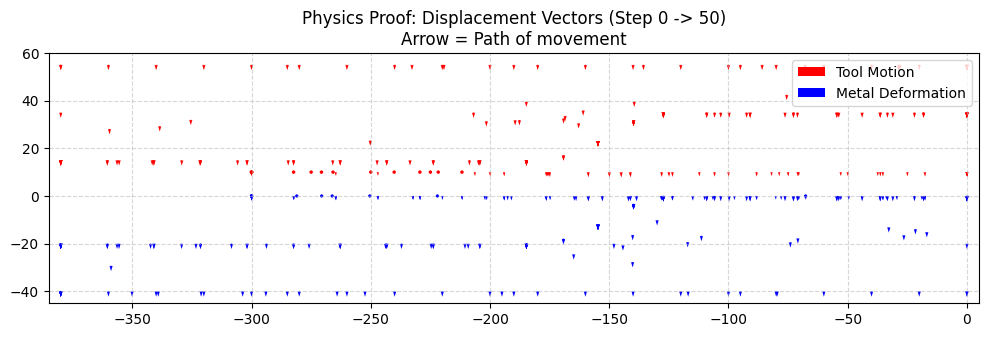

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data
with open('/content/forced_rollout.pkl', 'rb') as f:
    trajectory = pickle.load(f)

start_pos = trajectory[0]   # Frame 0
end_pos = trajectory[-1]    # Frame 50

# 2. Calculate Movement (Displacement)
displacement = end_pos - start_pos
dist = np.linalg.norm(displacement, axis=1)

# Filter: Only show points that actually moved (ignore static background)
moved_indices = dist > 0.05  # Threshold to ignore noise
start_moved = start_pos[moved_indices]
disp_moved = displacement[moved_indices]
end_moved = end_pos[moved_indices]

# 3. Setup Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Identify Tool vs Metal based on starting height (Y)
# Assuming typical setup: Tool is above, Metal is below
is_tool = start_moved[:, 1] > start_moved[:, 1].mean()

# Plot Tool Vectors (Red)
ax.quiver(start_moved[is_tool, 0], start_moved[is_tool, 1],
          disp_moved[is_tool, 0], disp_moved[is_tool, 1],
          color='red', angles='xy', scale_units='xy', scale=1, label='Tool Motion')

# Plot Metal Vectors (Blue)
ax.quiver(start_moved[~is_tool, 0], start_moved[~is_tool, 1],
          disp_moved[~is_tool, 0], disp_moved[~is_tool, 1],
          color='blue', angles='xy', scale_units='xy', scale=1, label='Metal Deformation')

# Auto-Scale Axes
x_min, x_max = start_moved[:, 0].min(), start_moved[:, 0].max()
y_min, y_max = start_moved[:, 1].min(), start_moved[:, 1].max()
pad = 5.0 # Padding in mm
ax.set_xlim(x_min - pad, x_max + pad)
ax.set_ylim(y_min - pad, y_max + pad)

ax.set_aspect('equal')
ax.set_title(f"Physics Proof: Displacement Vectors (Step 0 -> 50)\nArrow = Path of movement")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [ ]:
!export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
 python -m meshgraphnets.pressnet_run_model \
  --model=pressnet \
  --mode=eval \
  --checkpoint_dir=/content/checkpoints_pressnet_radius_30_jan_13 \
  --dataset_dir=/content/meshgraphnets_data_25_merged \
  --rollout_path=/content/pressnet_rollout.pkl \
  --rollout_split=train \
  --num_rollouts=1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0113 06:15:11.843231 19313435326272 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I0113 06:15:11.880364 19313435326272 pressnet_run_model.py:131] 🚀 Evaluation Started...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0113 06:15:12.411036 19313435326272 deprecation.py:323] From /content/deepmind-research/meshgraphnets/common.py:79: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:

In [ ]:
!cp -r /content/checkpoints_pressnet /content/drive/MyDrive/checkpoints_pressnet_60000

Loading data from /content/pressnet_rollout.pkl...
Total Nodes: 454
Metal Nodes Selected: 135
------------------------------
Mean Baseline Error: 5.4973
Mean Model Error:    5.1818
✅ SUCCESS: Model is 5.7% better than baseline.
Plot saved to: /content/pressnet_metal_check.png


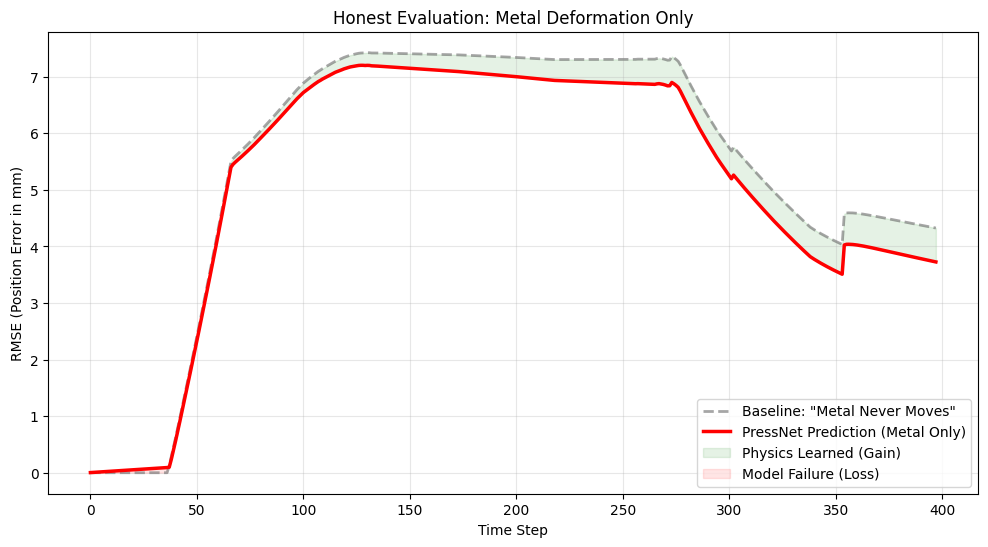

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def evaluate_metal_only(pkl_path):
    print(f"Loading data from {pkl_path}...")

    # 1. Load Data
    with open(pkl_path, 'rb') as f:
        data = pickle.load(f)

    # We look at the first trajectory in the list
    # If data is a dict (single traj), wrap it in list, otherwise take index 0
    if isinstance(data, dict):
        traj = data
    else:
        traj = data[0]

    # === CORRECTION HERE: USE THE KEYS THAT WORKED IN YOUR PREVIOUS SCRIPT ===
    pred = traj['pred_pos']    # Changed from 'predicted_rollout'
    gt = traj['gt_pos']        # Changed from 'ground_truth'
    node_type = traj['node_type']
    # =========================================================================

    # Convert to numpy if they are Torch tensors
    if hasattr(pred, 'numpy'): pred = pred.cpu().numpy()
    if hasattr(gt, 'numpy'): gt = gt.cpu().numpy()
    if hasattr(node_type, 'numpy'): node_type = node_type.cpu().numpy()

    # 2. Create the Metal Mask
    # Handle different possible shapes of node_type
    if node_type.ndim == 3:
        # If shape is [Time, Nodes, 1], take the first frame
        mask = (node_type[0, :, 0] == 0)
    elif node_type.ndim == 2:
        # If shape is [Nodes, 1]
        mask = (node_type[:, 0] == 0)
    else:
        # Fallback (assumes 1D array)
        mask = (node_type == 0)

    print(f"Total Nodes: {pred.shape[1]}")
    print(f"Metal Nodes Selected: {np.sum(mask)}")

    # 3. Apply Mask (Filter Data)
    pred_metal = pred[:, mask, :]
    gt_metal = gt[:, mask, :]

    # 4. Calculate Model RMSE (Metal Only)
    mse_model = np.mean((pred_metal - gt_metal)**2, axis=(1, 2))
    rmse_model = np.sqrt(mse_model)

    # 5. Calculate Static Baseline RMSE (Metal Only)
    initial_pos = gt_metal[0]
    baseline_pred = np.tile(initial_pos, (gt_metal.shape[0], 1, 1))

    mse_base = np.mean((baseline_pred - gt_metal)**2, axis=(1, 2))
    rmse_base = np.sqrt(mse_base)

    # 6. Plotting
    plt.figure(figsize=(12, 6))

    plt.plot(rmse_base, label='Baseline: "Metal Never Moves"',
             color='gray', linestyle='--', linewidth=2, alpha=0.7)

    plt.plot(rmse_model, label='PressNet Prediction (Metal Only)',
             color='red', linewidth=2.5)

    plt.fill_between(range(len(rmse_model)), rmse_model, rmse_base,
                     where=(rmse_model < rmse_base),
                     color='green', alpha=0.1, label='Physics Learned (Gain)')

    plt.fill_between(range(len(rmse_model)), rmse_model, rmse_base,
                     where=(rmse_model > rmse_base),
                     color='red', alpha=0.1, label='Model Failure (Loss)')

    plt.xlabel('Time Step')
    plt.ylabel('RMSE (Position Error in mm)')
    plt.title('Honest Evaluation: Metal Deformation Only')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 7. Print Final Stats
    base_mean = np.mean(rmse_base)
    model_mean = np.mean(rmse_model)

    print("-" * 30)
    print(f"Mean Baseline Error: {base_mean:.4f}")
    print(f"Mean Model Error:    {model_mean:.4f}")

    if model_mean < base_mean:
        improvement = (1 - model_mean / base_mean) * 100
        print(f"✅ SUCCESS: Model is {improvement:.1f}% better than baseline.")
    else:
        worse = (model_mean / base_mean - 1) * 100
        print(f"❌ FAILURE: Model is {worse:.1f}% WORSE than baseline.")

    save_path = '/content/pressnet_metal_check.png'
    plt.savefig(save_path)
    print(f"Plot saved to: {save_path}")
    plt.show()

if __name__ == "__main__":
    evaluate_metal_only("/content/pressnet_rollout.pkl")

In [ ]:
#=====================================================================================================
# Start of model with different velocity for tool and metal, inspired by deforming_plate.py
#=====================================================================================================

In [ ]:
# This code replaces Null with -1 so that tf can understand.

import json
from pathlib import Path

path = Path("/content/meshgraphnets_data_25_merged/meta.json")

# Load JSON
with path.open("r", encoding="utf-8") as f:
    data = json.load(f)

# Recursively replace None -> -1
def replace_none(obj):
    if obj is None:
        return -1
    if isinstance(obj, dict):
        return {k: replace_none(v) for k, v in obj.items()}
    if isinstance(obj, list):
        return [replace_none(x) for x in obj]
    return obj

data = replace_none(data)

# Overwrite file
with path.open("w", encoding="utf-8") as f:
    json.dump(data, f, indent=2, sort_keys=True)

print(f"Overwrote: {path}")


Overwrote: /content/meshgraphnets_data_25_merged/meta.json


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/common.py
# Lint as: python3
# pylint: disable=g-bad-file-header
# Copyright 2020 DeepMind Technologies Limited. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or  implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================
"""Commonly used data structures and functions."""

import enum
import tensorflow.compat.v1 as tf


class NodeType(enum.IntEnum):
  NORMAL = 0
  OBSTACLE = 1
  AIRFOIL = 2
  HANDLE = 3
  INFLOW = 4
  OUTFLOW = 5
  WALL_BOUNDARY = 6
  SIZE = 9


def triangles_to_edges(faces):
  """Computes mesh edges from triangles."""
  # collect edges from triangles
  edges = tf.concat([faces[:, 0:2],
                     faces[:, 1:3],
                     tf.stack([faces[:, 2], faces[:, 0]], axis=1)], axis=0)
  # those edges are sometimes duplicated (within the mesh) and sometimes
  # single (at the mesh boundary).
  # sort & pack edges as single tf.int64
  receivers = tf.reduce_min(edges, axis=1)
  senders = tf.reduce_max(edges, axis=1)
  packed_edges = tf.bitcast(tf.stack([senders, receivers], axis=1), tf.int64)
  # remove duplicates and unpack
  unique_edges = tf.bitcast(tf.unique(packed_edges)[0], tf.int32)
  senders, receivers = tf.unstack(unique_edges, axis=1)
  # create two-way connectivity
  return (tf.concat([senders, receivers], axis=0),
          tf.concat([receivers, senders], axis=0))


def squared_dist(A, B):
  """Computes squared euclidean distance between each row of A and B."""
  # Naive implementation of (A-B)^2 = A^2 - 2AB + B^2
  # A is [N, 3], B is [M, 3]

  row_norms_A = tf.reduce_sum(tf.square(A), axis=1)
  row_norms_A = tf.reshape(row_norms_A, [-1, 1])  # Column vector [N, 1]

  row_norms_B = tf.reduce_sum(tf.square(B), axis=1)
  row_norms_B = tf.reshape(row_norms_B, [1, -1])  # Row vector [1, M]

  # Result is [N, M]
  return row_norms_A - 2 * tf.matmul(A, B, False, True) + row_norms_B


def construct_world_edges(world_pos, node_type, radius=0.03):
  """Constructs edges between Tool nodes and Metal nodes within a radius."""

  # 1. Separate Metal (Deformable) and Tool (Obstacle) indices
  # We assume Metal is NORMAL (0) and Tool is OBSTACLE (1)
  deformable_idx = tf.where(tf.equal(node_type[:, 0], NodeType.NORMAL))
  actuator_idx = tf.where(tf.equal(node_type[:, 0], NodeType.OBSTACLE))

  # 2. Gather positions
  # B = Metal Positions
  # A = Tool Positions
  B = tf.squeeze(tf.gather(world_pos, deformable_idx))
  A = tf.squeeze(tf.gather(world_pos, actuator_idx))

  # Cast to float64 for precision in distance calculation, then back if needed
  A = tf.cast(A, tf.float32)
  B = tf.cast(B, tf.float32)

  # 3. Calculate Distance Matrix [Num_Tools, Num_Metal]
  dists = squared_dist(A, B)

  # 4. Filter by Radius
  # Find indices (i, j) where dist(Tool_i, Metal_j) < radius^2
  rel_close_pair_idx = tf.where(tf.math.less(dists, radius ** 2))

  # 5. Map back to original global indices
  # rel_close_pair_idx[:, 0] is the index into `actuator_idx`
  # rel_close_pair_idx[:, 1] is the index into `deformable_idx`

  close_pair_actuator = tf.gather(actuator_idx, rel_close_pair_idx[:, 0])
  close_pair_def = tf.gather(deformable_idx, rel_close_pair_idx[:, 1])

  # Stack them to create edges: [Source, Target]
  # We create edges in BOTH directions (Tool->Metal and Metal->Tool)
  # This allows the metal to "feel" the tool, and the tool to "push" the metal.

  # Edges from Tool -> Metal
  senders_a = tf.squeeze(close_pair_actuator)
  receivers_a = tf.squeeze(close_pair_def)

  # Edges from Metal -> Tool
  senders_b = tf.squeeze(close_pair_def)
  receivers_b = tf.squeeze(close_pair_actuator)

  # Combine
  senders = tf.concat([senders_a, senders_b], axis=0)
  receivers = tf.concat([receivers_a, receivers_b], axis=0)

  return senders, receivers

Overwriting /content/deepmind-research/meshgraphnets/common.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/common.py
# pylint: disable=g-bad-file-header
# Copyright 2020 DeepMind Technologies Limited. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or  implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================
"""Commonly used data structures and functions."""

import enum
import tensorflow.compat.v1 as tf


class NodeType(enum.IntEnum):
  NORMAL = 0
  OBSTACLE = 1
  AIRFOIL = 2
  HANDLE = 3
  INFLOW = 4
  OUTFLOW = 5
  WALL_BOUNDARY = 6
  SIZE = 9


def triangles_to_edges(faces):
  """Computes mesh edges from triangles."""
  # collect edges from triangles
  edges = tf.concat([faces[:, 0:2],
                     faces[:, 1:3],
                     tf.stack([faces[:, 2], faces[:, 0]], axis=1)], axis=0)
  # those edges are sometimes duplicated (within the mesh) and sometimes
  # single (at the mesh boundary).
  # sort & pack edges as single tf.int64
  receivers = tf.reduce_min(edges, axis=1)
  senders = tf.reduce_max(edges, axis=1)
  packed_edges = tf.bitcast(tf.stack([senders, receivers], axis=1), tf.int64)
  # remove duplicates and unpack
  unique_edges = tf.bitcast(tf.unique(packed_edges)[0], tf.int32)
  senders, receivers = tf.unstack(unique_edges, axis=1)
  # create two-way connectivity
  return (tf.concat([senders, receivers], axis=0),
          tf.concat([receivers, senders], axis=0))


def squared_dist(A, B):
  """Computes squared euclidean distance between each row of A and B."""
  # Naive implementation of (A-B)^2 = A^2 - 2AB + B^2
  # A is [N, 3], B is [M, 3]

  row_norms_A = tf.reduce_sum(tf.square(A), axis=1)
  row_norms_A = tf.reshape(row_norms_A, [-1, 1])  # Column vector [N, 1]

  row_norms_B = tf.reduce_sum(tf.square(B), axis=1)
  row_norms_B = tf.reshape(row_norms_B, [1, -1])  # Row vector [1, M]

  # Result is [N, M]
  return row_norms_A - 2 * tf.matmul(A, B, False, True) + row_norms_B


def construct_world_edges(world_pos, node_type, radius=50):
    """Constructs edges ONLY between Tool and Metal.

    This IGNORES self-collision (Metal touching Metal).
    """

    # 1. Separate Metal (Deformable) and Tool (Obstacle) indices
    # We assume Metal is NORMAL (0) and Tool is OBSTACLE (1)
    deformable_idx = tf.where(tf.equal(node_type[:, 0], NodeType.NORMAL))
    actuator_idx = tf.where(tf.equal(node_type[:, 0], NodeType.OBSTACLE))

    # 2. Gather positions
    # B = Metal Positions (Deformable)
    # A = Tool Positions (Actuator)
    B = tf.squeeze(tf.gather(world_pos, deformable_idx))
    A = tf.squeeze(tf.gather(world_pos, actuator_idx))

    # Cast to float64 for precision in distance calculation, then back if needed
    A = tf.cast(A, tf.float32)
    B = tf.cast(B, tf.float32)

    # 3. Calculate Distance Matrix [Num_Tools, Num_Metal]
    # This matrix ONLY compares Tools to Metals. It does not compare Metal to Metal.
    dists = squared_dist(A, B)

    # 4. Filter by Radius
    # Find indices (i, j) where dist(Tool_i, Metal_j) < radius^2
    rel_close_pair_idx = tf.where(tf.math.less(dists, radius ** 2))

    # 5. Map back to original global indices
    # rel_close_pair_idx[:, 0] is the index into `actuator_idx`
    # rel_close_pair_idx[:, 1] is the index into `deformable_idx`

    close_pair_actuator = tf.gather(actuator_idx, rel_close_pair_idx[:, 0])
    close_pair_def = tf.gather(deformable_idx, rel_close_pair_idx[:, 1])

    # Stack them to create edges: [Source, Target]
    # We create edges in BOTH directions (Tool->Metal and Metal->Tool)
    # This allows the metal to "feel" the tool, and the tool to "push" the metal.

    # Edges from Tool -> Metal
    senders_a = tf.squeeze(close_pair_actuator)
    receivers_a = tf.squeeze(close_pair_def)

    # Edges from Metal -> Tool
    senders_b = tf.squeeze(close_pair_def)
    receivers_b = tf.squeeze(close_pair_actuator)

    # --- THE FIX: Force Rank 1 (Vectors) ---
    # tf.concat crashes if inputs are scalars (which happens if NO collisions occur).
    # We reshape to [-1] to guarantee they are 1D vectors, even if empty.

    # Note: senders_a/b can be empty if the tool is far away.
    # tf.reshape([], [-1]) -> [] (Vector), which is valid for concat.

    senders = tf.concat([tf.reshape(senders_a, [-1]), tf.reshape(senders_b, [-1])], axis=0)
    receivers = tf.concat([tf.reshape(receivers_a, [-1]), tf.reshape(receivers_b, [-1])], axis=0)
    # ---------------------------------------

    return senders, receivers


def normalize(tensor, stats):
  """Normalizes a tensor using computed statistics."""
  return (tensor - stats.mean) / stats.std


def undo_normalize(tensor, stats):
  """Un-normalizes a tensor using computed statistics."""
  return tensor * stats.std + stats.mean

Overwriting /content/deepmind-research/meshgraphnets/common.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet - With Hybrid Velocity & World Edges."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')

      # 1. Mesh Edges (Permanent connectivity)
      # Features: 3D relative + norm + 3D mesh_rel + norm = 8
      self._edge_normalizer = normalization.Normalizer(
          size=8, name='edge_normalizer')

      # 2. World Edges (Dynamic Contact)
      # Features: Relative World Pos (3) + Distance (1) = 4
      self._world_edge_normalizer = normalization.Normalizer(
          size=4, name='world_edge_normalizer')

      # 3. Node Features (UPDATED)
      # Size = 2 (One-Hot Type) + 3 (Velocity) = 5
      # We REMOVED absolute world_pos to make it translation invariant.
      self._node_normalizer = normalization.Normalizer(
          size=5, name='node_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph with Hybrid Velocity and Dual Edges."""

    # --- Step A: Node Features ---

    # 1. Type info (Metal vs Tool) -> One-Hot [N, 2]
    node_type = tf.reshape(inputs['node_type'], [-1])
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    node_type_one_hot = tf.one_hot(type_idx, 2)

    # 2. Prepare Position Vectors
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    prev_pos = tf.reshape(inputs['prev|world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])

    # 3. Hybrid Velocity Calculation
    # - Metal (Normal): Velocity = Current - Previous (Momentum)
    # - Tool (Obstacle): Velocity = Target - Current (Future Forcing)

    velocity_metal = world_pos - prev_pos
    velocity_tool = target_pos - world_pos

    # Create mask: True if Tool, False if Metal
    is_tool = tf.equal(node_type, common.NodeType.OBSTACLE)
    tool_mask = tf.tile(tf.expand_dims(is_tool, -1), [1, 3])

    velocity = tf.where(tool_mask, velocity_tool, velocity_metal)

    # 4. Concatenate Features [N, 5]
    node_features = tf.concat([node_type_one_hot, velocity], axis=-1)

    # --- Step B: Mesh Edges (Permanent) ---
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    senders, receivers = common.triangles_to_edges(cells)

    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    relative_world_pos = (tf.gather(world_pos, senders) -
                          tf.gather(world_pos, receivers))
    relative_mesh_pos = (tf.gather(mesh_pos, senders) -
                         tf.gather(mesh_pos, receivers))

    edge_features = tf.concat([
        relative_world_pos,
        tf.norm(relative_world_pos, axis=-1, keepdims=True),
        relative_mesh_pos,
        tf.norm(relative_mesh_pos, axis=-1, keepdims=True)
    ], axis=-1)

    mesh_edges = core_model.EdgeSet(
        name='mesh_edges',
        features=self._edge_normalizer(edge_features, is_training),
        receivers=receivers,
        senders=senders)

    # --- Step C: World Edges (Dynamic Contact) ---
    # Radius search for collisions (default radius=0.03m from common.py)
    w_senders, w_receivers = common.construct_world_edges(world_pos, inputs['node_type'])

    relative_world_pos_w = (tf.gather(world_pos, w_senders) -
                            tf.gather(world_pos, w_receivers))

    world_edge_features = tf.concat([
        relative_world_pos_w,
        tf.norm(relative_world_pos_w, axis=-1, keepdims=True)
    ], axis=-1)

    world_edges = core_model.EdgeSet(
        name='world_edges',
        features=self._world_edge_normalizer(world_edge_features, is_training),
        receivers=w_receivers,
        senders=w_senders)

    # --- Step D: Return MultiGraph ---
    return core_model.MultiGraph(
        node_features=self._node_normalizer(node_features, is_training),
        edge_sets=[mesh_edges, world_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    graph = self._build_graph(inputs, is_training=is_training)

    # Inference
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position (Current Pos + Displacement)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    # 1. Build graph and run inference
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)

    # 2. Target calculation
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    # Accumulate statistics for output normalizer
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)

    # 3. Calculate squared error
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # 4. Loss Masking
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)

    loss = tf.reduce_mean(error[loss_mask])
    return loss

Writing /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_dataset.py
# Lint as: python3
"""Utility functions for reading the datasets (PressNet Version - Velocity Enabled)."""

import functools
import json
import os
import tensorflow.compat.v1 as tf
from meshgraphnets.common import NodeType

def _parse(proto, meta):
  """Parses a trajectory from tf.Example."""
  feature_lists = {k: tf.io.VarLenFeature(tf.string)
                   for k in meta['field_names']}
  features = tf.io.parse_single_example(proto, feature_lists)
  out = {}
  for key, field in meta['features'].items():
    data = tf.io.decode_raw(features[key].values, getattr(tf, field['dtype']))
    data = tf.reshape(data, field['shape'])
    if field['type'] == 'static':
      data = tf.tile(data, [meta['trajectory_length'], 1, 1])
    elif field['type'] == 'dynamic_varlen':
      length = tf.io.decode_raw(features['length_'+key].values, tf.int32)
      length = tf.reshape(length, [-1])
      data = tf.RaggedTensor.from_row_lengths(data, row_lengths=length)
    elif field['type'] != 'dynamic':
      raise ValueError('invalid data format')
    out[key] = data
  return out

def load_dataset(path, split):
  """Load dataset."""
  with open(os.path.join(path, 'meta.json'), 'r') as fp:
    meta = json.loads(fp.read())
  ds = tf.data.TFRecordDataset(os.path.join(path, split+'.tfrecord'))
  ds = ds.map(functools.partial(_parse, meta=meta), num_parallel_calls=8)
  ds = ds.prefetch(1)
  return ds

def add_targets(ds, fields, add_history=True):
  """Adds target and history fields to dataframe.

  Args:
    ds: The dataset.
    fields: List of fields to generate history/targets for (usually ['world_pos']).
    add_history: MUST BE TRUE for PressNet to calculate velocity.
  """
  def fn(trajectory):
    out = {}
    for key, val in trajectory.items():
      # We only generate history/targets for the requested fields (e.g. world_pos)
      if key not in fields:
        # For other fields (cells, node_type), we just slice to match the timeline
        if add_history:
             out[key] = val[1:-1]
        else:
             out[key] = val[:-1]
        continue

      # --- HISTORY LOGIC (REQUIRED FOR VELOCITY) ---
      if add_history:
        # We need 3 frames: [t-1, t, t+1]
        # This reduces the usable trajectory length by 2.

        # Current input (t): Frame 1 to End-1
        out[key] = val[1:-1]

        # Previous input (t-1): Frame 0 to End-2
        out['prev|'+key] = val[0:-2]

        # Target output (t+1): Frame 2 to End
        out['target|'+key] = val[2:]

      else:
        # NO HISTORY (Standard MeshGraphNets)
        # We only need 2 frames: [t, t+1]

        # Current input (t): Frame 0 to End-1
        out[key] = val[:-1]

        # Target output (t+1): Frame 1 to End
        out['target|'+key] = val[1:]

    return out
  return ds.map(fn, num_parallel_calls=8)

def split_and_preprocess(ds, noise_field, noise_scale, noise_gamma):
  """Splits trajectories into frames, and adds training noise."""
  def add_noise(frame):
    # We add noise ONLY to the current position (world_pos), not history.
    # This effectively makes the input velocity noisy too, which is good for training.
    noise = tf.random.normal(tf.shape(frame[noise_field]),
                             stddev=noise_scale, dtype=tf.float32)

    # Don't apply noise to non-metal nodes (Tools/Obstacles should be exact)
    # Using NodeType.NORMAL (0) for Metal
    mask = tf.equal(frame['node_type'], NodeType.NORMAL)[:, 0]
    noise = tf.where(mask, noise, tf.zeros_like(noise))

    frame[noise_field] += noise
    frame['target|'+noise_field] += (1.0 - noise_gamma) * noise
    return frame

  ds = ds.flat_map(tf.data.Dataset.from_tensor_slices)
  ds = ds.map(add_noise, num_parallel_calls=8)
  ds = ds.shuffle(10000)
  ds = ds.repeat(None)
  return ds.prefetch(10)

def batch_dataset(ds, batch_size):
  """Batches input datasets."""
  shapes = ds.output_shapes
  types = ds.output_types

  def renumber(buffer, frame):
    nodes, cells = buffer
    new_nodes, new_cells = frame
    return nodes + new_nodes, tf.concat([cells, new_cells+nodes], axis=0)

  def batch_accumulate(ds_window):
    out = {}
    for key, ds_val in ds_window.items():
      initial = tf.zeros((0, shapes[key][1]), dtype=types[key])
      if key == 'cells':
        num_nodes = ds_window['node_type'].map(lambda x: tf.shape(x)[0])
        cells = tf.data.Dataset.zip((num_nodes, ds_val))
        initial = (tf.constant(0, tf.int32), initial)
        _, out[key] = cells.reduce(initial, renumber)
      else:
        merge = lambda prev, cur: tf.concat([prev, cur], axis=0)
        out[key] = ds_val.reduce(initial, merge)
    return out

  if batch_size > 1:
    ds = ds.window(batch_size, drop_remainder=True)
    ds = ds.map(batch_accumulate, num_parallel_calls=8)
  return ds

Writing /content/deepmind-research/meshgraphnets/pressnet_dataset.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_eval.py
# Lint as: python3
"""Evaluation script for PressNet - With Velocity & Visualization Output."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sonnet as snt
import tensorflow.compat.v1 as tf
from meshgraphnets import common

def ensure_rank_2(tensor, name="tensor"):
    """Ensures a tensor is Rank 2 [Nodes, Features]."""
    rank = tf.rank(tensor)
    return tf.cond(
        tf.equal(rank, 3),
        lambda: tensor[0],
        lambda: tensor
    )

def evaluate(model, inputs):
  """Performs rollout evaluation."""

  # --- 1. DATA PREPARATION ---
  full_trajectory = inputs['world_pos'] # Ground Truth [Time, Nodes, 3]
  num_time_steps = tf.shape(full_trajectory)[0]
  num_rollout_steps = num_time_steps - 1

  # Initialize Current and Previous positions
  # For the very first step (t=0), we don't have t=-1.
  # We assume velocity is zero, so prev_pos = current_pos.
  current_pos = full_trajectory[0]
  prev_pos = full_trajectory[0]

  # Sanitization
  node_type_static = ensure_rank_2(inputs['node_type'], "node_type")
  cells_static = ensure_rank_2(inputs['cells'], "cells")
  mesh_pos_static = ensure_rank_2(inputs['mesh_pos'], "mesh_pos")

  # Mask Preparation
  node_type_flat = tf.reshape(node_type_static, [-1])
  is_dynamic = tf.equal(node_type_flat, common.NodeType.NORMAL)
  mask_2d = tf.expand_dims(is_dynamic, -1)
  mask_3d = tf.tile(mask_2d, [1, 3])

  # --- 2. STEP FUNCTION ---
  def step_fn(step, current_pos, prev_pos, trajectory_array):

    # Get the Ground Truth Next Position (needed for Tool Velocity)
    gt_next_pos = tf.gather(full_trajectory, step + 1)
    gt_next_pos = tf.reshape(gt_next_pos, [-1, 3])

    model_inputs = {
        'world_pos': current_pos,
        'prev|world_pos': prev_pos,       # <--- History for Metal Velocity
        'target|world_pos': gt_next_pos,  # <--- Future for Tool Velocity (CRITICAL FIX)
        'mesh_pos': mesh_pos_static,
        'node_type': node_type_static,
        'cells': cells_static
    }

    # Prediction
    prediction = model(model_inputs, is_training=False)
    prediction = tf.reshape(prediction, [-1, 3])

    # Override: Tools follow Ground Truth, Metal follows Prediction
    next_pos = tf.where(mask_3d, prediction, gt_next_pos)

    # Store result
    trajectory_array = trajectory_array.write(step, next_pos)

    # Update: Current becomes Previous for the next step
    return step + 1, next_pos, current_pos, trajectory_array

  # --- 3. EXECUTE LOOP ---
  step = tf.constant(0)
  trajectory_ta = tf.TensorArray(dtype=tf.float32, size=num_rollout_steps, element_shape=[None, 3])

  _, _, _, final_ta = tf.while_loop(
      cond=lambda s, c, p, t: tf.less(s, num_rollout_steps),
      body=step_fn,
      loop_vars=(step, current_pos, prev_pos, trajectory_ta),
      parallel_iterations=1,
      shape_invariants=(
          tf.TensorShape([]),
          tf.TensorShape([None, 3]),
          tf.TensorShape([None, 3]), # Shape invariant for prev_pos
          tf.TensorShape(None)
      )
  )

  output_trajectory = final_ta.stack()

  # --- 4. PREPARE OUTPUT DICT ---

  # Tile static features to match the Time dimension
  time_dim = tf.shape(output_trajectory)[0]

  node_type_tiled = tf.tile(tf.expand_dims(node_type_static, 0), [time_dim, 1, 1])
  mesh_pos_tiled = tf.tile(tf.expand_dims(mesh_pos_static, 0), [time_dim, 1, 1])

  # Align Ground Truth (drop first frame to match prediction size)
  gt_trajectory = full_trajectory[1:]

  return {}, {
      'pred_pos': output_trajectory,   # Prediction
      'gt_pos': gt_trajectory,         # Ground Truth
      'faces': cells_static,           # Connectivity
      'node_type': node_type_tiled,    # Material Type
      'mesh_pos': mesh_pos_tiled       # Reference State
  }

Writing /content/deepmind-research/meshgraphnets/pressnet_eval.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_model.py
# Lint as: python3
"""Model for PressNet - With Hybrid Velocity & World Edges."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import tensorflow.compat.v1 as tf
import sonnet as snt

from meshgraphnets import common
from meshgraphnets import core_model
from meshgraphnets import normalization

class PressNetModel(snt.AbstractModule):
  """Model that predicts next position based on current state."""

  def __init__(self, learned_model, name='PressNetModel'):
    super(PressNetModel, self).__init__(name=name)
    with self._enter_variable_scope():
      self._learned_model = learned_model
      self._output_normalizer = normalization.Normalizer(
          size=3, name='output_normalizer')

      # 1. Mesh Edges (Permanent connectivity)
      # Features: 3D relative + norm + 3D mesh_rel + norm = 8
      self._edge_normalizer = normalization.Normalizer(
          size=8, name='edge_normalizer')

      # 2. World Edges (Dynamic Contact)
      # Features: Relative World Pos (3) + Distance (1) = 4
      self._world_edge_normalizer = normalization.Normalizer(
          size=4, name='world_edge_normalizer')

      # 3. Node Features (UPDATED)
      # Size = 2 (One-Hot Type) + 3 (Velocity) = 5
      self._node_normalizer = normalization.Normalizer(
          size=5, name='node_normalizer')

  def _build_graph(self, inputs, is_training):
    """Builds input graph with Hybrid Velocity and Dual Edges."""

    # --- Step A: Node Features ---

    # 1. Type info
    node_type = tf.reshape(inputs['node_type'], [-1])
    type_idx = tf.cast(tf.not_equal(node_type, common.NodeType.NORMAL), tf.int32)
    node_type_one_hot = tf.one_hot(type_idx, 2)

    # 2. Prepare Position Vectors
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    prev_pos = tf.reshape(inputs['prev|world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])

    # 3. Hybrid Velocity Calculation
    velocity_metal = world_pos - prev_pos
    velocity_tool = target_pos - world_pos

    is_tool = tf.equal(node_type, common.NodeType.OBSTACLE)
    tool_mask = tf.tile(tf.expand_dims(is_tool, -1), [1, 3])

    velocity = tf.where(tool_mask, velocity_tool, velocity_metal)

    # 4. Concatenate Features [N, 5]
    node_features = tf.concat([node_type_one_hot, velocity], axis=-1)

    # --- Step B: Mesh Edges (Permanent) ---
    cells = tf.cast(tf.reshape(inputs['cells'], [-1, 3]), tf.int32)
    senders, receivers = common.triangles_to_edges(cells)

    mesh_pos = tf.reshape(inputs['mesh_pos'], [-1, 3])

    relative_world_pos = (tf.gather(world_pos, senders) -
                          tf.gather(world_pos, receivers))
    relative_mesh_pos = (tf.gather(mesh_pos, senders) -
                         tf.gather(mesh_pos, receivers))

    edge_features = tf.concat([
        relative_world_pos,
        tf.norm(relative_world_pos, axis=-1, keepdims=True),
        relative_mesh_pos,
        tf.norm(relative_mesh_pos, axis=-1, keepdims=True)
    ], axis=-1)

    # Normalize features
    edge_features = self._edge_normalizer(edge_features, is_training)

    # --- Step C: World Edges (Dynamic Contact) ---
    w_senders, w_receivers = common.construct_world_edges(world_pos, inputs['node_type'])

    relative_world_pos_w = (tf.gather(world_pos, w_senders) -
                            tf.gather(world_pos, w_receivers))

    world_edge_features = tf.concat([
        relative_world_pos_w,
        tf.norm(relative_world_pos_w, axis=-1, keepdims=True)
    ], axis=-1)

    # Normalize features
    world_edge_features = self._world_edge_normalizer(world_edge_features, is_training)

    # --- Step D: EXPLICIT SHAPE DEFINITION (Fixes Sonnet Error) ---
    # We must explicitly set the last dimension so MLP knows input size.
    node_features.set_shape([None, 5])
    edge_features.set_shape([None, 8])
    world_edge_features.set_shape([None, 4])

    # --- Step E: Construct Graph ---
    mesh_edges = core_model.EdgeSet(
        name='mesh_edges',
        features=edge_features,
        receivers=receivers,
        senders=senders)

    world_edges = core_model.EdgeSet(
        name='world_edges',
        features=world_edge_features,
        receivers=w_receivers,
        senders=w_senders)

    return core_model.MultiGraph(
        node_features=self._node_normalizer(node_features, is_training),
        edge_sets=[mesh_edges, world_edges])

  def _build(self, inputs, is_training=False):
    """Standard forward pass (Inference)."""
    graph = self._build_graph(inputs, is_training=is_training)

    # Inference
    predicted_normalized = self._learned_model(graph)
    predicted_displacement = self._output_normalizer.inverse(predicted_normalized)

    # Return Final Position (Current Pos + Displacement)
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    return world_pos + predicted_displacement

  @snt.reuse_variables
  def loss(self, inputs):
    """Calculates L2 loss."""
    # 1. Build graph and run inference
    graph = self._build_graph(inputs, is_training=True)
    predicted_normalized = self._learned_model(graph)

    # 2. Target calculation
    world_pos = tf.reshape(inputs['world_pos'], [-1, 3])
    target_pos = tf.reshape(inputs['target|world_pos'], [-1, 3])
    target_displacement = target_pos - world_pos

    # Accumulate statistics for output normalizer
    target_normalized = self._output_normalizer(target_displacement, accumulate=True)

    # 3. Calculate squared error
    error = tf.reduce_sum((target_normalized - predicted_normalized)**2, axis=1)

    # 4. Loss Masking
    node_type = tf.reshape(inputs['node_type'], [-1])
    loss_mask = tf.equal(node_type, common.NodeType.NORMAL)

    loss = tf.reduce_mean(error[loss_mask])
    return loss

Overwriting /content/deepmind-research/meshgraphnets/pressnet_model.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/core_model.py
# pylint: disable=g-bad-file-header
# Copyright 2020 DeepMind Technologies Limited. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or  implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================
"""Core learned graph net model."""

import collections
import functools
import sonnet as snt
import tensorflow.compat.v1 as tf

EdgeSet = collections.namedtuple('EdgeSet', ['name', 'features', 'senders',
                                             'receivers'])
MultiGraph = collections.namedtuple('Graph', ['node_features', 'edge_sets'])


# --- HELPER 1: Safe Shape Access ---
def _get_last_dim_safe(tensor):
    """Safely gets the last dimension (feature size) or returns None."""
    if tensor.shape.ndims is None:
        return None
    return tensor.shape.as_list()[-1]

# --- HELPER 2: Shape Restoration ---
def _ensure_last_dim(tensor, dim):
    """Sets the last dimension of the tensor if it is known."""
    if dim is not None:
        shape = tensor.shape.as_list() if tensor.shape.ndims is not None else [None, None]
        # Set the last dimension to the known value 'dim'
        tensor.set_shape(shape[:-1] + [dim])
    return tensor

# --- HELPER 3: Rank Restoration (Fixes Gradient Error) ---
def _ensure_rank_1(tensor):
    """Hints that the tensor is 1-dimensional (vector) with unknown length.

    This tells TF: "I don't know the length (None), but I know it's a 1D vector."
    This fixes the 'None - None' TypeError in gradient calculations.
    """
    if tensor.shape.ndims is None:
        tensor.set_shape([None])
    return tensor
# -----------------------------------


class GraphNetBlock(snt.AbstractModule):
  """Multi-Edge Interaction Network with residual connections."""

  def __init__(self, model_fn, name='GraphNetBlock'):
    super(GraphNetBlock, self).__init__(name=name)
    self._model_fn = model_fn

  def _update_edge_features(self, node_features, edge_set):
    """Aggregrates node features, and applies edge function."""

    # --- FIX 1: Ensure Indices are Rank 1 ---
    # We guarantee these are 1D vectors so TF can calculate gradients.
    senders = _ensure_rank_1(edge_set.senders)
    receivers = _ensure_rank_1(edge_set.receivers)
    # ----------------------------------------

    sender_features = tf.gather(node_features, senders)
    receiver_features = tf.gather(node_features, receivers)

    # --- FIX 2: Recover Lost Shapes for Edges ---
    latent_dim = _get_last_dim_safe(node_features)
    if latent_dim is None:
        latent_dim = _get_last_dim_safe(edge_set.features)

    if latent_dim is not None:
        sender_features = _ensure_last_dim(sender_features, latent_dim)
        receiver_features = _ensure_last_dim(receiver_features, latent_dim)
    # --------------------------------------------

    features = [sender_features, receiver_features, edge_set.features]

    with tf.variable_scope(edge_set.name+'_edge_fn'):
      concat_features = tf.concat(features, axis=-1)

      # --- FIX 3: Calculate Expected MLP Input Size ---
      expected_dim = 0
      for f in features:
          d = _get_last_dim_safe(f)
          if d is not None:
              expected_dim += d

      if expected_dim > 0:
          concat_features = _ensure_last_dim(concat_features, expected_dim)
      # ----------------------------------------------

      return self._model_fn()(concat_features)

  def _update_node_features(self, node_features, edge_sets):
    """Aggregrates edge features, and applies node function."""
    num_nodes = tf.shape(node_features)[0]
    features = [node_features]

    # --- FIX 4: Identify Latent Dimension ---
    latent_dim = _get_last_dim_safe(node_features)
    # ----------------------------------------

    for edge_set in edge_sets:
      # --- FIX 5: Ensure Receivers are Rank 1 ---
      receivers = _ensure_rank_1(edge_set.receivers)
      # ------------------------------------------

      aggregated_messages = tf.math.unsorted_segment_sum(edge_set.features,
                                                         receivers,
                                                         num_nodes)

      # --- FIX 6: Restore Shape After Aggregation ---
      if latent_dim is not None:
          aggregated_messages = _ensure_last_dim(aggregated_messages, latent_dim)
      # ----------------------------------------------

      features.append(aggregated_messages)

    with tf.variable_scope('node_fn'):
      concat_features = tf.concat(features, axis=-1)

      # --- FIX 7: Calculate Expected MLP Input Size for Nodes ---
      expected_dim = 0
      for f in features:
          d = _get_last_dim_safe(f)
          if d is not None:
              expected_dim += d
          elif latent_dim is not None:
              expected_dim += latent_dim

      if expected_dim > 0:
          concat_features = _ensure_last_dim(concat_features, expected_dim)
      # ------------------------------------------------------

      return self._model_fn()(concat_features)

  def _build(self, graph):
    """Applies GraphNetBlock and returns updated MultiGraph."""

    # apply edge functions
    new_edge_sets = []
    for edge_set in graph.edge_sets:
      updated_features = self._update_edge_features(graph.node_features,
                                                    edge_set)
      new_edge_sets.append(edge_set._replace(features=updated_features))

    # apply node function
    new_node_features = self._update_node_features(graph.node_features,
                                                   new_edge_sets)

    # add residual connections
    new_node_features += graph.node_features
    new_edge_sets = [es._replace(features=es.features + old_es.features)
                     for es, old_es in zip(new_edge_sets, graph.edge_sets)]
    return MultiGraph(new_node_features, new_edge_sets)


class EncodeProcessDecode(snt.AbstractModule):
  """Encode-Process-Decode GraphNet model."""

  def __init__(self,
               output_size,
               latent_size,
               num_layers,
               message_passing_steps,
               name='EncodeProcessDecode'):
    super(EncodeProcessDecode, self).__init__(name=name)
    self._latent_size = latent_size
    self._output_size = output_size
    self._num_layers = num_layers
    self._message_passing_steps = message_passing_steps

  def _make_mlp(self, output_size, layer_norm=True):
    """Builds an MLP."""
    widths = [self._latent_size] * self._num_layers + [output_size]
    network = snt.nets.MLP(widths, activate_final=False)
    if layer_norm:
      network = snt.Sequential([network, snt.LayerNorm()])
    return network

  def _encoder(self, graph):
    """Encodes node and edge features into latent features."""
    with tf.variable_scope('encoder'):
      node_latents = self._make_mlp(self._latent_size)(graph.node_features)
      new_edges_sets = []
      for edge_set in graph.edge_sets:
        latent = self._make_mlp(self._latent_size)(edge_set.features)
        new_edges_sets.append(edge_set._replace(features=latent))
    return MultiGraph(node_latents, new_edges_sets)

  def _decoder(self, graph):
    """Decodes node features from graph."""
    with tf.variable_scope('decoder'):
      decoder = self._make_mlp(self._output_size, layer_norm=False)
      return decoder(graph.node_features)

  def _build(self, graph):
    """Encodes and processes a multigraph, and returns node features."""
    model_fn = functools.partial(self._make_mlp, output_size=self._latent_size)
    latent_graph = self._encoder(graph)
    for _ in range(self._message_passing_steps):
      latent_graph = GraphNetBlock(model_fn)(latent_graph)
    return self._decoder(latent_graph)

Overwriting /content/deepmind-research/meshgraphnets/core_model.py


In [ ]:
%%writefile /content/deepmind-research/meshgraphnets/pressnet_run_model.py
# Lint as: python3
"""Runs the learner/evaluator for PressNet (Velocity Enabled)."""

import pickle
from absl import app
from absl import flags
from absl import logging
import numpy as np
import tensorflow.compat.v1 as tf
from meshgraphnets import cfd_eval
from meshgraphnets import cfd_model
from meshgraphnets import cloth_eval
from meshgraphnets import cloth_model
from meshgraphnets import core_model
from meshgraphnets import pressnet_model
from meshgraphnets import pressnet_eval
from meshgraphnets import pressnet_dataset as dataset

FLAGS = flags.FLAGS
flags.DEFINE_enum('mode', 'train', ['train', 'eval'],
                  'Train model, or run evaluation.')
flags.DEFINE_enum('model', None, ['cfd', 'cloth', 'pressnet'],
                  'Select model to run.')
flags.DEFINE_string('checkpoint_dir', None, 'Directory to save checkpoint')
flags.DEFINE_string('dataset_dir', None, 'Directory to load dataset from.')
flags.DEFINE_string('rollout_path', None, 'Pickle file to save eval trajectories')
flags.DEFINE_enum('rollout_split', 'valid', ['train', 'test', 'valid'],
                  'Dataset split to use for rollouts.')
flags.DEFINE_integer('num_rollouts', 10, 'No. of paths to use for eval rollouts.')
flags.DEFINE_integer('num_training_steps', int(2e6), 'No. of training steps.')
flags.DEFINE_integer('batch_size', 2, 'Batch size for training.')

PARAMETERS = {
    'cfd': {
        'noise': 0.02,
        'gamma': 1.0,
        'field': 'velocity',
        'history': False,
        'size': 2,
        'core_model': cfd_model.Model,
        'evaluator': cfd_eval
    },
    'cloth': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,
        'size': 3,
        'core_model': cloth_model.Model,
        'evaluator': cloth_eval
    },
    'pressnet': {
        'noise': 0.003,
        'gamma': 0.1,
        'field': 'world_pos',
        'history': True,        # <--- CORRECT: Must be True for velocity calculation
        'size': 3,
        'core_model': pressnet_model.PressNetModel,
        'evaluator': pressnet_eval
    }
}

def learner(model, params):
  """Runs training loop."""
  ds = dataset.load_dataset(FLAGS.dataset_dir, 'train')
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  ds = dataset.split_and_preprocess(ds, params['field'],
                                    noise_scale=params['noise'],
                                    noise_gamma=params['gamma'])

  # Use the FLAG for batch size
  inputs = tf.data.make_one_shot_iterator(
      dataset.batch_dataset(ds, FLAGS.batch_size)).get_next()

  loss_op = model.loss(inputs)
  global_step = tf.train.create_global_step()

  lr = tf.train.exponential_decay(1e-4, global_step,
                                  decay_steps=5e6, decay_rate=0.1) + 1e-6
  optimizer = tf.train.AdamOptimizer(learning_rate=lr)
  train_op = optimizer.minimize(loss_op, global_step=global_step)

  # Debug stats
  if hasattr(model._output_normalizer, '_mean'):
      mean_t = model._output_normalizer._mean()
      std_t = model._output_normalizer._std_with_epsilon()
  else:
      mean_t, std_t = None, None

  hooks = [tf.train.StopAtStepHook(last_step=FLAGS.num_training_steps)]

  with tf.train.MonitoredTrainingSession(
      checkpoint_dir=FLAGS.checkpoint_dir,
      hooks=hooks,
      save_checkpoint_secs=180,
      save_summaries_steps=100) as sess:

    logging.info('🚀 Training Started...')
    try:
      while not sess.should_stop():
        _, step, loss = sess.run([train_op, global_step, loss_op])

        if step % 100 == 0:
          logging.info('Step %d: Loss = %.6f', step, loss)

        if step % 1000 == 0 and mean_t is not None:
             curr_mean, curr_std = sess.run([mean_t, std_t])
             logging.info("Step %d Normalizer Stats:", step)
             logging.info(" -> Mean: %s", np.array2string(curr_mean, precision=6))
             logging.info(" -> Std : %s", np.array2string(curr_std, precision=6))

    except Exception:
      logging.exception("Training loop ended with exception.")
      raise

def evaluator(model, params):
  """Runs evaluation rollouts."""
  logging.info('🚀 Evaluation Started...')
  ds = dataset.load_dataset(FLAGS.dataset_dir, FLAGS.rollout_split)
  ds = dataset.add_targets(ds, [params['field']], add_history=params['history'])
  inputs = tf.data.make_one_shot_iterator(ds).get_next()

  scalar_ops, traj_ops = params['evaluator'].evaluate(model, inputs)

  with tf.train.MonitoredSession(
      session_creator=tf.train.ChiefSessionCreator(
          checkpoint_dir=FLAGS.checkpoint_dir,
          master='',
          config=tf.ConfigProto(log_device_placement=False))) as sess:

    trajectories = []
    for i in range(FLAGS.num_rollouts):
      try:
        logging.info('Rolling out trajectory %d / %d...', i + 1, FLAGS.num_rollouts)
        scalars, traj = sess.run([scalar_ops, traj_ops])
        logging.info('  -> Error: %s', scalars)
        trajectories.append(traj)
      except tf.errors.OutOfRangeError:
        break

    if FLAGS.rollout_path:
      logging.info('Saving trajectories to %s', FLAGS.rollout_path)
      with open(FLAGS.rollout_path, 'wb') as f:
        pickle.dump(trajectories, f)

def main(argv):
  del argv
  tf.enable_resource_variables()
  tf.disable_eager_execution()
  params = PARAMETERS[FLAGS.model]

  learned_model = core_model.EncodeProcessDecode(
      output_size=params['size'],
      latent_size=128,
      num_layers=2,
      message_passing_steps=15)

  model = params['core_model'](learned_model)

  if FLAGS.mode == 'train':
    learner(model, params)
  elif FLAGS.mode == 'eval':
    evaluator(model, params)

if __name__ == '__main__':
  app.run(main)

Writing /content/deepmind-research/meshgraphnets/pressnet_run_model.py


In [ ]:
%cd /content/deepmind-research

/content/deepmind-research


In [ ]:
!rm -r /content/checkpoints_pressnet_insp_deforming_plate_1000

In [ ]:
# 1. Verify the file is actually there before running
import os
actual_path = '/content/meshgraphnets_data_25_merged' # Based on your previous log

if os.path.exists(os.path.join(actual_path, 'meta.json')):
    print("✅ Confirmed: meta.json exists at", actual_path)

    # 2. Run with hardcoded paths to avoid shell interpolation errors
    !export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
     python -m meshgraphnets.pressnet_run_model \
      --model=pressnet \
      --mode=train \
      --checkpoint_dir=/content/checkpoints_pressnet_insp_deforming_plate_1000 \
      --dataset_dir=/content/meshgraphnets_data_25_merged \
      --num_training_steps=10000
else:
    print("❌ ERROR: I still can't find meta.json at", actual_path)
    print("Please run '!ls /content/meshgraphnets_data_25_merged' to see what is actually in that folder.")

✅ Confirmed: meta.json exists at /content/meshgraphnets_data_25_merged
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0114 08:54:57.370728 140378335860544 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0114 08:54:58.136014 140378335860544 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_dataset.py:97: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use 

In [ ]:
!export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
 python -m meshgraphnets.pressnet_run_model \
  --model=pressnet \
  --mode=eval \
  --checkpoint_dir=/content/checkpoints_pressnet_insp_deforming_plate_1000 \
  --dataset_dir=/content/meshgraphnets_data_25_merged \
  --rollout_path=/content/pressnet_rollout_10k.pkl \
  --rollout_split=train \
  --num_rollouts=1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0114 07:25:12.833772 136471294506816 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I0114 07:25:12.906669 136471294506816 pressnet_run_model.py:118] 🚀 Evaluation Started...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0114 07:25:13.835673 136471294506816 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_model.py:63: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions fo

In [ ]:

#=============================================================================================================
#    Change the drive link if necessary. It should point to the folder that has tfrecord and meta.json.
#=============================================================================================================
#https://drive.google.com/drive/folders/1x00svZAKrvh30M_m0JEppsd2hvkGff1m?usp=sharing
# Install the library (if not already installed)

!pip install -U -q gdown

# Download the folder
# The --folder flag tells gdown to download everything inside recursively
!gdown --folder "https://drive.google.com/drive/folders/1x00svZAKrvh30M_m0JEppsd2hvkGff1m?usp=sharing"

Retrieving folder contents
Retrieving folder 1xyNJt4FdbZ5GzQYstE7Q__fjAxaAbChJ .ipynb_checkpoints
Processing file 1jZsXinM_85wQ1xy4hTkTPOo3nunzVL2H meta.json
Processing file 10_CpNQ2xzaQQXLZu_KBfd5pzJu33Bl6y train.tfrecord
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1jZsXinM_85wQ1xy4hTkTPOo3nunzVL2H
To: /content/meshgraphnets_group0/meta.json
100% 991/991 [00:00<00:00, 4.14MB/s]
Downloading...
From: https://drive.google.com/uc?id=10_CpNQ2xzaQQXLZu_KBfd5pzJu33Bl6y
To: /content/meshgraphnets_group0/train.tfrecord
100% 2.93M/2.93M [00:00<00:00, 16.7MB/s]
Download completed


In [ ]:
# Overwriting the file at drive that belongs to group 0 to teach the model only one trajectory to test if it is actually learning or not.
import json
import os

# The exact path you requested
file_path = '/content/meshgraphnets_group0/meta.json'

# The content with dynamic shapes (-1) and collision_radius 84
meta_content = {
  "collision_radius": 84,
  "dt": 0.0375,
  "features": {
    "cells": {
      "dtype": "int32",
      "shape": [1, -1, 3],
      "type": "static"
    },
    "mesh_pos": {
      "dtype": "float32",
      "shape": [1, -1, 3],
      "type": "static"
    },
    "node_type": {
      "dtype": "int32",
      "shape": [400, -1, 1],
      "type": "dynamic"
    },
    "world_pos": {
      "dtype": "float32",
      "shape": [400, -1, 3],
      "type": "dynamic"
    }
  },
  "field_names": [
    "cells",
    "mesh_pos",
    "node_type",
    "world_pos"
  ],
  "simulator": "Ansys",
  "trajectory_length": 400
}

# Write the file
try:
    with open(file_path, 'w') as f:
        json.dump(meta_content, f, indent=4)
    print(f"✅ Successfully updated: {file_path}")
except FileNotFoundError:
    print(f"❌ Error: The directory for {file_path} does not exist.")
    print("   Please make sure '/content/drive/MyDrive/meshgraphnets_group0/' exists.")

✅ Successfully updated: /content/meshgraphnets_group0/meta.json


In [ ]:
# 1. Verify the file is actually there before running
import os
actual_path = '/content/meshgraphnets_group0' # Based on your previous log

if os.path.exists(os.path.join(actual_path, 'meta.json')):
    print("✅ Confirmed: meta.json exists at", actual_path)

    # 2. Run with hardcoded paths to avoid shell interpolation errors
    !export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
     python -m meshgraphnets.pressnet_run_model \
      --model=pressnet \
      --mode=train \
      --checkpoint_dir=/content/checkpoints_pressnet_insp_deforming_plate_group0_30k_rad_50 \
      --dataset_dir=/content/meshgraphnets_group0 \
      --num_training_steps=30000
else:
    print("❌ ERROR: I still can't find meta.json at", actual_path)
    print("Please run '!ls /content/meshgraphnets_data_25_merged' to see what is actually in that folder.")

✅ Confirmed: meta.json exists at /content/meshgraphnets_group0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0114 13:59:15.921963 140481300449088 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0114 13:59:16.663434 140481300449088 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_dataset.py:97: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.comp

In [ ]:
!export PYTHONPATH=$PYTHONPATH:/content/deepmind-research/meshgraphnets && \
 python -m meshgraphnets.pressnet_run_model \
  --model=pressnet \
  --mode=eval \
  --checkpoint_dir=/content/checkpoints_pressnet_insp_deforming_plate_group0_1k_rad_50 \
  --dataset_dir=/content/meshgraphnets_group0 \
  --rollout_path=/content/pressnet_rollout_group0_20k_radius_50.pkl \
  --rollout_split=train \
  --num_rollouts=1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0114 13:52:16.143642 139073200412480 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I0114 13:52:16.207642 139073200412480 pressnet_run_model.py:118] 🚀 Evaluation Started...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0114 13:52:17.236995 139073200412480 deprecation.py:323] From /content/deepmind-research/meshgraphnets/pressnet_model.py:63: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions fo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil
from google.colab import files

# 1. Define the folder path and the name of the zip file
folder_path = '/content/checkpoints_pressnet_insp_deforming_plate_group0_20k_rad_25'
output_filename = 'checkpoints_pressnet_insp_deforming_plate_group0_70k_rad_25'

# 2. Zip the folder
# This creates 'checkpoints_download.zip'
shutil.make_archive(output_filename, 'zip', folder_path)

# 3. Download the zip file to your local device
files.download(f'{output_filename}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#=====================================================================================
#                  End
#=====================================================================================